In [2]:
import cobra
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
from pandas import DataFrame
import statistics
import plotly
import plotly.express as px
import plotly.graph_objs as go
import visualisation
import sklearn
from sklearn.cluster import KMeans
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from kneed import KneeLocator
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
data = pd.read_csv(r'/Users/katemeeson/Library/Mobile Documents/com~apple~CloudDocs/MRC-DTP PhD UoM/Datasets/Alternative datasets/CCLE proteomics/Normalised OC cell lines only.csv', index_col = [0])
data = data.transpose()
N, D = data.shape
print('Samples: %s, Proteins: %s'%(N, D))
data = data.dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)
data

Samples: 17, Proteins: 12755


Uniprot,S12A2_HUMAN,KDM1A_HUMAN,SRP14_HUMAN,S15A4_HUMAN,SOGA1_HUMAN,NU133_HUMAN,IRS2_HUMAN,RL4_HUMAN,FUBP2_HUMAN,FUBP3_HUMAN,...,SP1_HUMAN,I3L0E3_HUMAN,SP4_HUMAN,SP3_HUMAN,NEXN_HUMAN,RM18_HUMAN,CJ032_HUMAN,SF3B5_HUMAN,CKS2_HUMAN,RM42_HUMAN
CAOV3_OVARY_TenPx02,0.697643,0.009925,-0.574020,0.315539,0.178261,-0.286144,-0.697006,-0.116591,-0.406977,-0.125347,...,0.253674,-0.519671,-0.278100,0.077004,-0.090339,0.108490,0.351236,0.001087,0.050790,0.107655
COV362_OVARY_TenPx03,-0.576200,0.007450,-0.196959,-0.200854,-0.381734,-0.104525,-0.196893,-0.183259,-0.205265,0.011734,...,0.040602,-0.498967,-0.194423,0.430918,0.530260,0.236321,0.035910,0.119064,-0.010976,0.199670
TYKNU_OVARY_TenPx08,-0.467575,-0.183340,0.126376,-0.378587,-0.518141,0.046955,-0.887587,0.587666,-0.243615,-0.502063,...,-0.505376,0.242808,-0.051802,-0.023245,-0.757688,-0.142767,-0.459508,-0.120622,-0.068204,-0.434604
OVCAR4_OVARY_TenPx11,0.676388,-0.120693,-0.718341,-0.899913,1.268040,-0.474546,-0.617588,-0.191642,0.325719,-0.332027,...,0.168781,0.041032,-0.311952,-0.097562,4.150997,-0.298355,-0.387866,0.148244,0.008259,-0.155841
SNU119_OVARY_TenPx13,-0.648294,0.837186,-0.066834,-0.636519,-0.595932,0.151583,0.521628,0.128698,-0.089561,-0.337770,...,0.392633,-0.216097,0.626003,0.289890,1.858394,0.042502,0.093416,0.057240,-0.908248,-0.018211
FUOV1_OVARY_TenPx16,-1.137375,0.511780,-0.493287,0.017083,-0.554983,0.199323,1.146848,-0.637933,0.490498,0.309166,...,0.740052,-0.215844,0.885464,0.457326,-0.266349,-0.002485,0.917893,0.478057,1.633641,0.391953
IGROV1_OVARY_TenPx19,-0.171731,0.121767,0.111216,0.181212,-1.259058,0.633765,0.690400,-0.000672,0.571120,0.234215,...,0.695508,-0.003839,0.863175,0.212162,-1.750220,0.331552,-0.001985,0.378716,-0.385770,0.132566
HEYA8_OVARY_TenPx27,-0.966057,-0.772837,-0.404935,-0.195149,-0.319358,-0.490078,0.801680,0.820523,0.276327,0.717663,...,0.292705,0.517017,0.379647,-0.012627,1.634205,0.124881,0.663362,0.025245,-0.123178,0.529587
JHOS2_OVARY_TenPx33,0.830842,-0.374959,-0.016129,0.497475,0.067437,-0.209660,0.659774,-0.047014,-0.126932,0.271636,...,-0.649939,-0.361616,-0.359888,-0.359780,0.836853,-0.283348,0.249061,-0.272687,-0.445970,-0.926651
NIHOVCAR3_OVARY_TenPx33,1.262304,0.513282,-0.309114,0.332648,0.704417,-0.002526,-0.120933,-0.734127,-0.101219,0.530119,...,0.218723,0.562961,0.221980,-0.364820,-1.283944,0.634431,0.324781,0.708759,-0.684276,0.894820


# Elbow plot Pomics

In [4]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(data)
pca = PCA(n_components = 3)
pca.fit(segmentation_std)
scores_pca = pca.transform(segmentation_std)
pca.transform(segmentation_std)

array([[-14.34345942,  -0.3516906 ,  23.68306431],
       [ -3.96946039,  -2.98642312,  10.68917203],
       [-39.73000747,   2.72508345, -32.33196591],
       [ -8.49837744,  -2.53699448,  21.65386983],
       [ 20.19747596, -14.16912993, -28.83568859],
       [  4.82951894,  65.59145349,   1.52500541],
       [ 38.80036034,  -7.50848856,  -8.84827579],
       [-44.55701796,   3.30416011, -11.17952152],
       [-45.18483206, -18.01989392,  25.89514634],
       [ 45.20392646,   7.79421753,  36.24642939],
       [-10.58342335, -50.90543985, -21.23828028],
       [ 82.73934896, -12.05714066, -25.91348743],
       [ -9.78454497, -21.49085418,  18.86203251],
       [ -4.52474011, -39.38732794,   5.52572611],
       [-42.69610387,  40.52084499, -33.85663567],
       [ 73.93749001,  27.48121532,   5.8298115 ],
       [-41.83615363,  21.99640834,  12.29359777]])

Optimal number of clusters 5


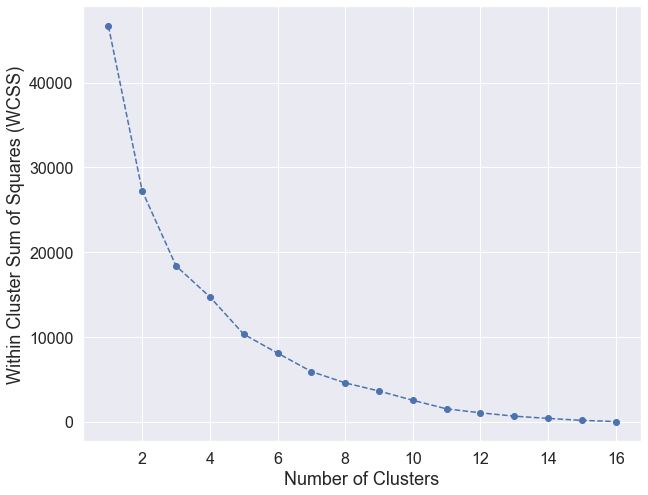

In [5]:
wcss = []
max_clusters = 17
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

n_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
print("Optimal number of clusters", n_clusters)

fig = plt.figure(figsize=(10,8))
plt.plot(range(1, 17), wcss, marker='o', linestyle='--')
# plt.vlines(n_clusters, ymin=0, ymax=max(wcss), linestyles='dashed')
plt.xlabel('Number of Clusters', fontsize=18)
plt.ylabel('Within Cluster Sum of Squares (WCSS)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# Silhouette plotting

In [6]:
column_names = ["cluster number", "silhouette score"]

df = pd.DataFrame(columns = column_names)
df

,cluster number,silhouette score


In [9]:
X_data = pca.transform(segmentation_std)
X_data

array([[-14.34345942,  -0.3516906 ,  23.68306431],
       [ -3.96946039,  -2.98642312,  10.68917203],
       [-39.73000747,   2.72508345, -32.33196591],
       [ -8.49837744,  -2.53699448,  21.65386983],
       [ 20.19747596, -14.16912993, -28.83568859],
       [  4.82951894,  65.59145349,   1.52500541],
       [ 38.80036034,  -7.50848856,  -8.84827579],
       [-44.55701796,   3.30416011, -11.17952152],
       [-45.18483206, -18.01989392,  25.89514634],
       [ 45.20392646,   7.79421753,  36.24642939],
       [-10.58342335, -50.90543985, -21.23828028],
       [ 82.73934896, -12.05714066, -25.91348743],
       [ -9.78454497, -21.49085418,  18.86203251],
       [ -4.52474011, -39.38732794,   5.52572611],
       [-42.69610387,  40.52084499, -33.85663567],
       [ 73.93749001,  27.48121532,   5.8298115 ],
       [-41.83615363,  21.99640834,  12.29359777]])

For n_clusters = 2 The average silhouette_score is : 0.35035289035408806


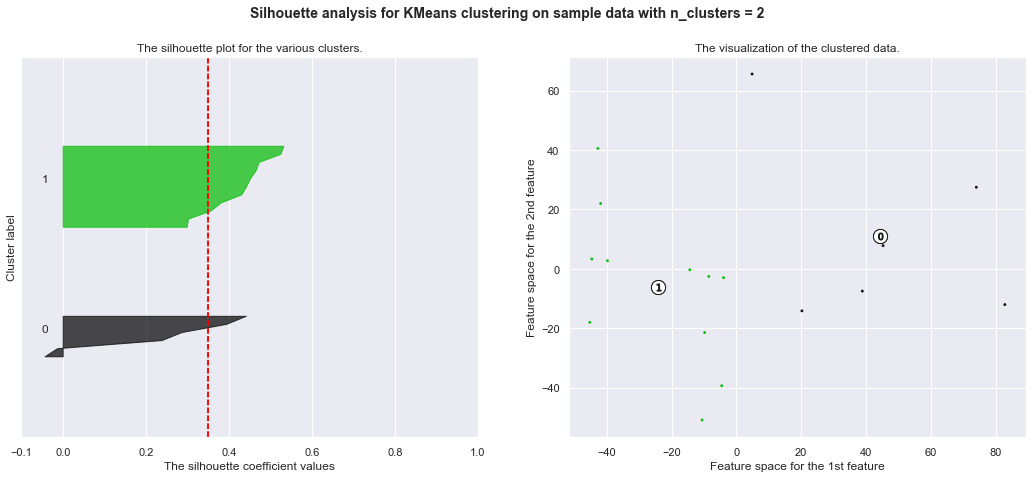

For n_clusters = 3 The average silhouette_score is : 0.3274865203203024


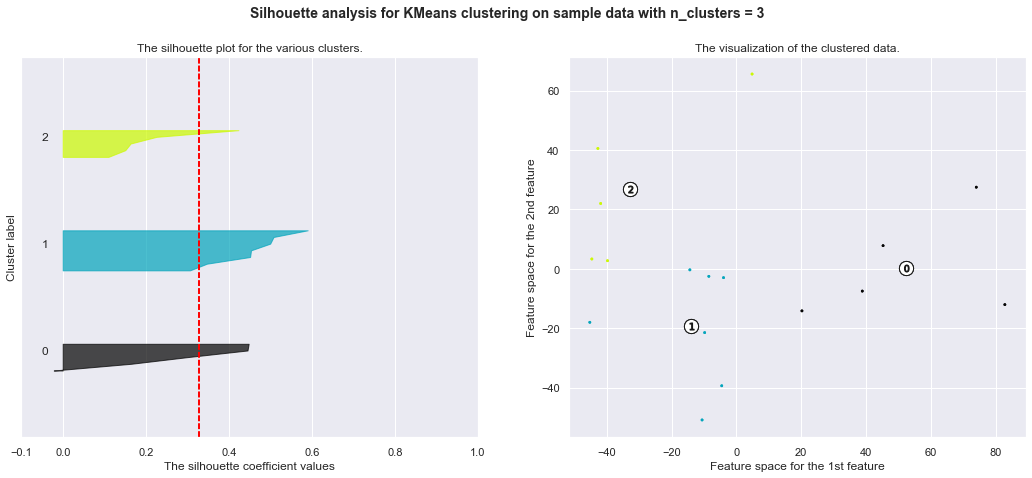

For n_clusters = 4 The average silhouette_score is : 0.2850688073912454


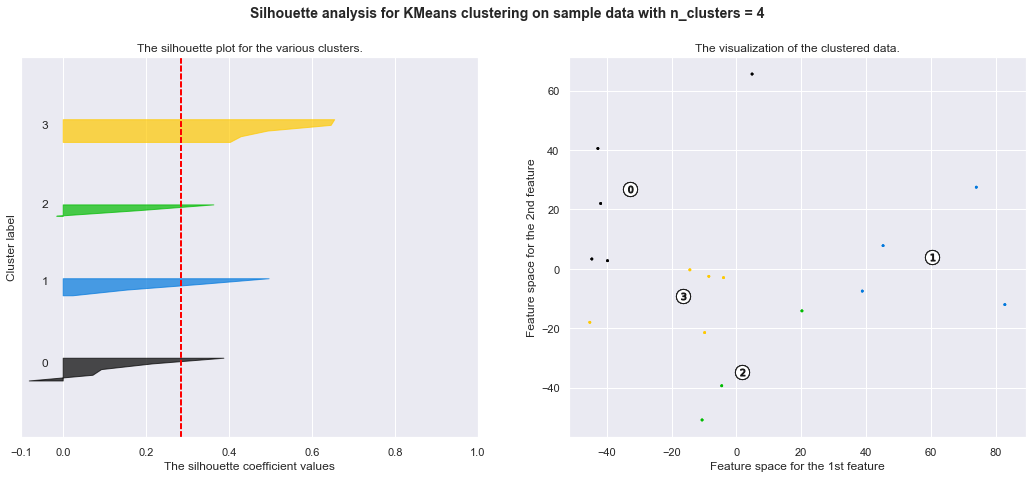

For n_clusters = 5 The average silhouette_score is : 0.29024866674471445


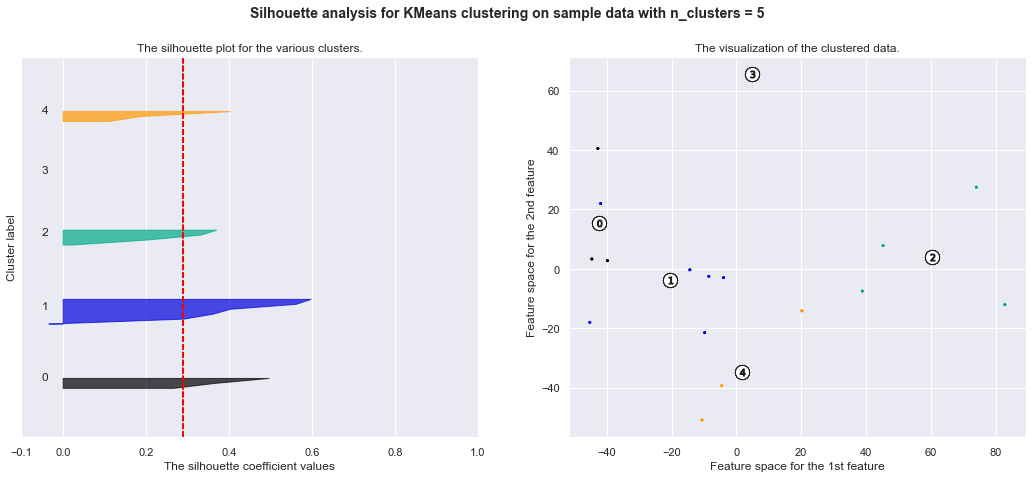

For n_clusters = 6 The average silhouette_score is : 0.29021768671136416


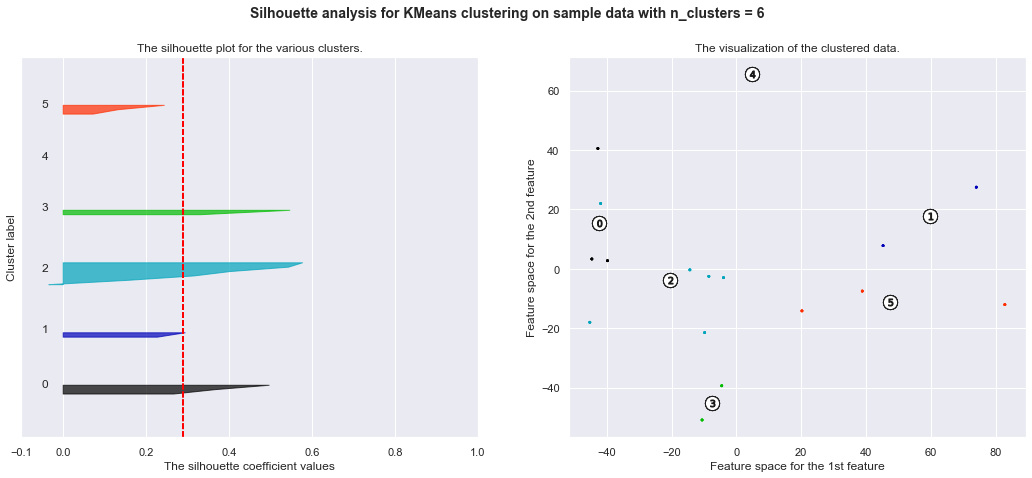

For n_clusters = 7 The average silhouette_score is : 0.29842313782983987


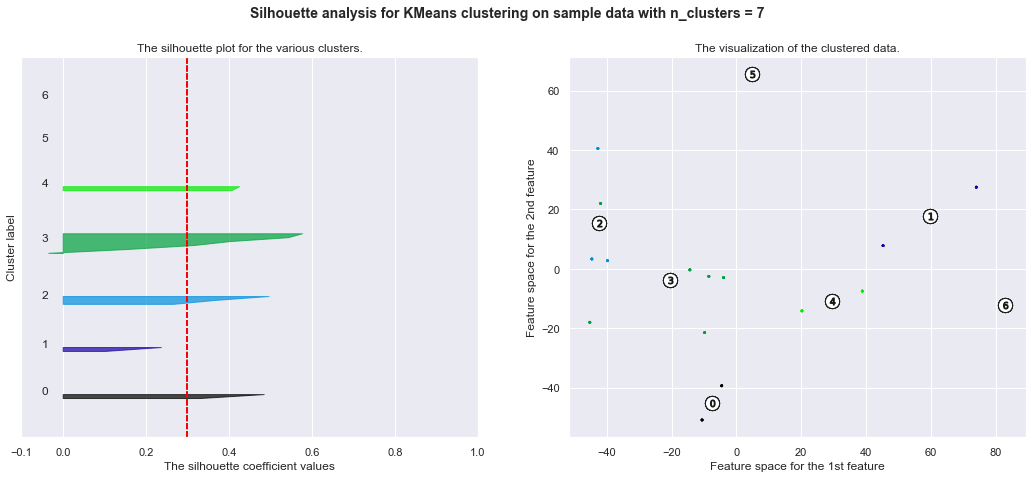

For n_clusters = 8 The average silhouette_score is : 0.29643360059060153


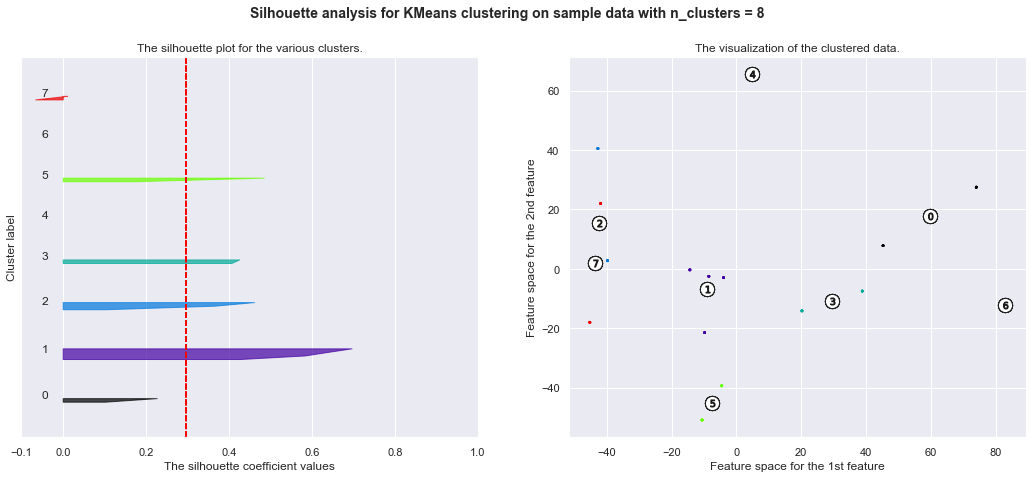

For n_clusters = 9 The average silhouette_score is : 0.27714230937137646


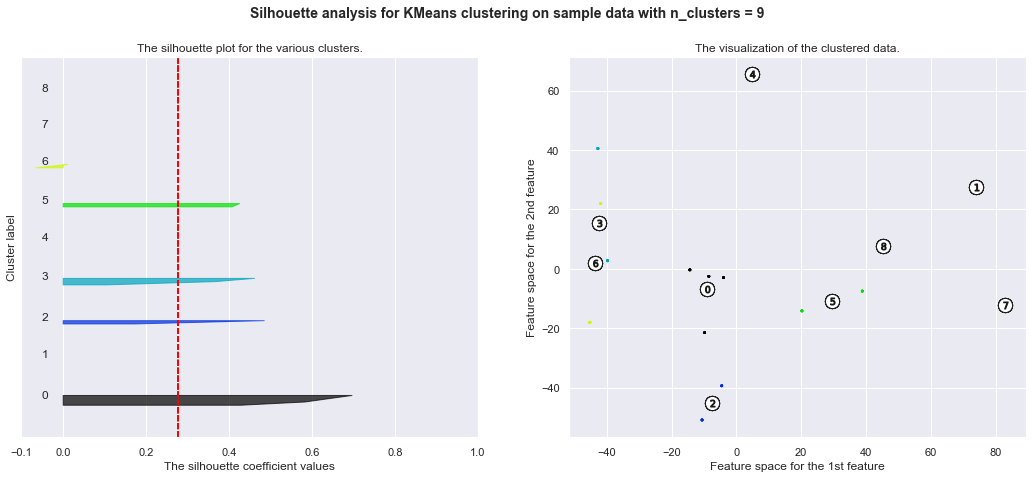

For n_clusters = 10 The average silhouette_score is : 0.25636816945936003


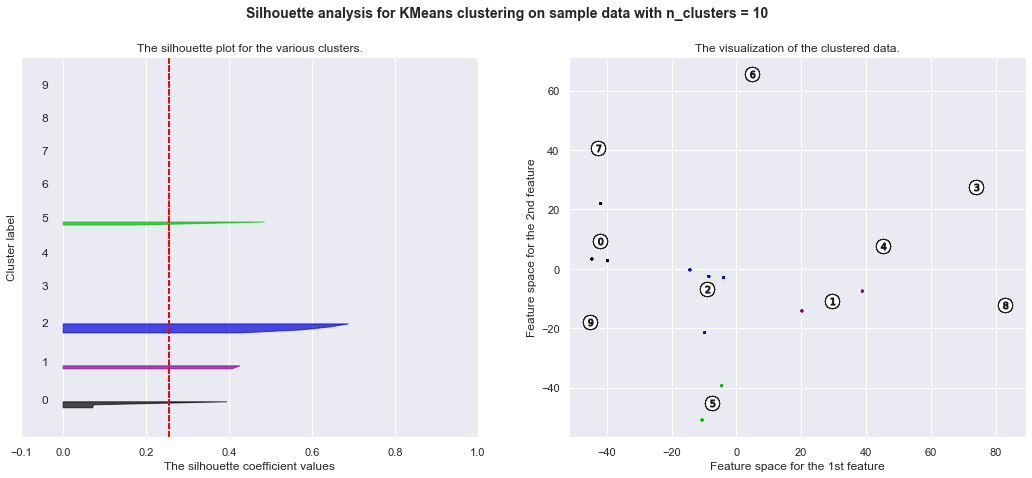

For n_clusters = 11 The average silhouette_score is : 0.2658764668616982


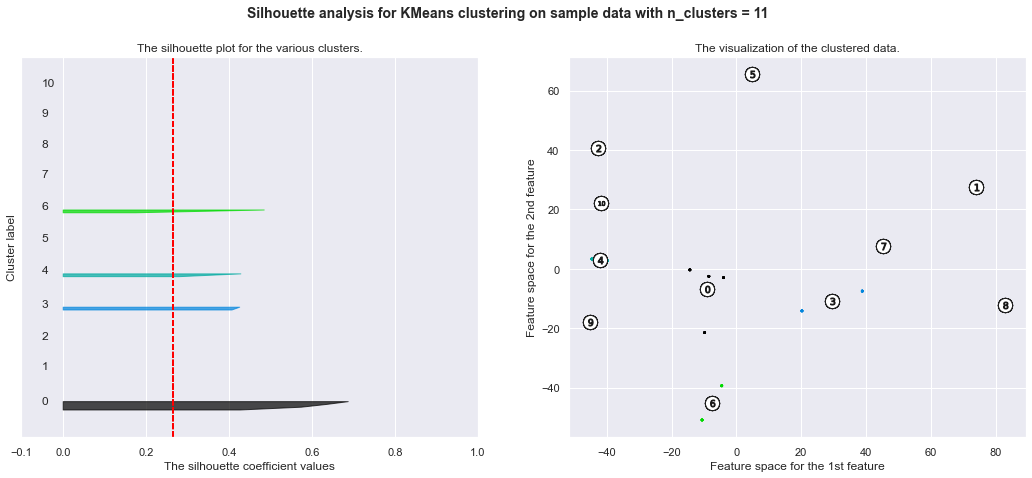

For n_clusters = 12 The average silhouette_score is : 0.20665402718566497


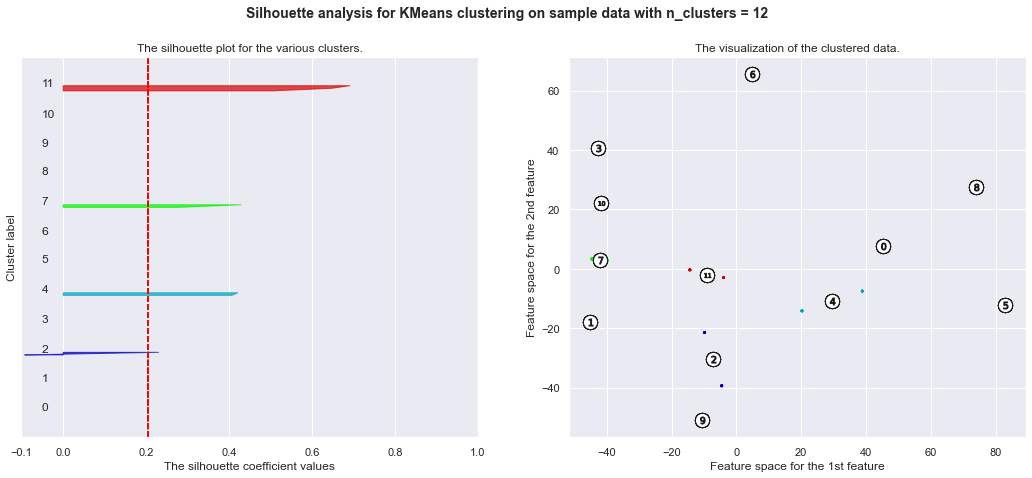

For n_clusters = 13 The average silhouette_score is : 0.15798901368968177


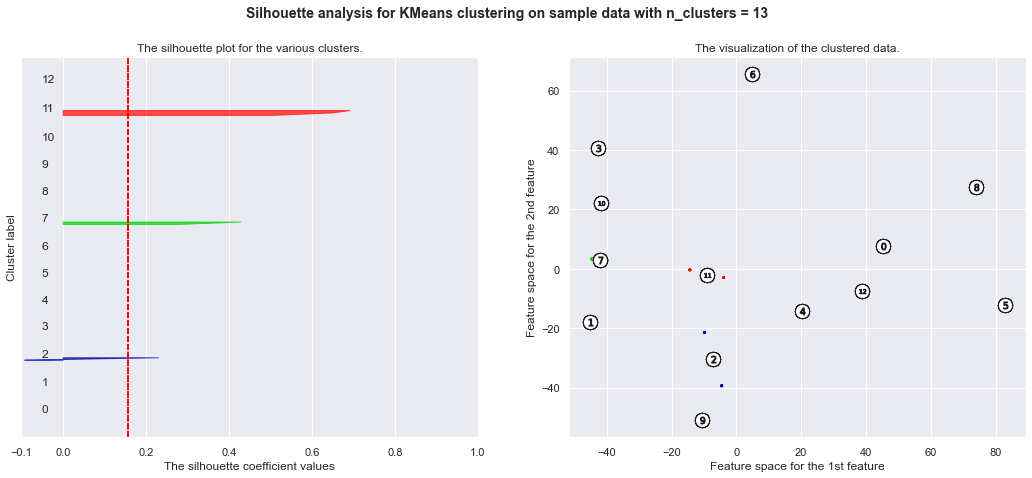

In [20]:
n_cluster_list = []
s_score_list = []

range_of_clusters = [2,3,4,5,6,7,8,9,10,11,12,13]

for n_clusters in range_of_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_data) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_data)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
    silhouette_avg = silhouette_score(X_data, cluster_labels)
    print("For n_clusters =",n_clusters,"The average silhouette_score is :",silhouette_avg,)

    n_cluster_list.append(n_clusters)
    s_score_list.append(silhouette_avg)

        # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7,)

            # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X_data[:, 0], X_data[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
        plt.suptitle("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"% n_clusters,fontsize=14,fontweight="bold",)

    plt.show()

In [23]:
print(n_cluster_list)
print(s_score_list)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[0.35035289035408806, 0.3274865203203024, 0.2850688073912454, 0.29024866674471445, 0.29021768671136416, 0.29842313782983987, 0.29643360059060153, 0.27714230937137646, 0.25636816945936003, 0.2658764668616982, 0.20665402718566497, 0.15798901368968177]


In [24]:
df['cluster number'] = n_cluster_list
df['silhouette score'] = s_score_list
df = df.set_index('cluster number')
df

,silhouette score
cluster number,
2,0.350353
3,0.327487
4,0.285069
5,0.290249
6,0.290218
7,0.298423
8,0.296434
9,0.277142
10,0.256368


Text(0.5, 1.0, 'Accuracy of K-means clusters Pomics')

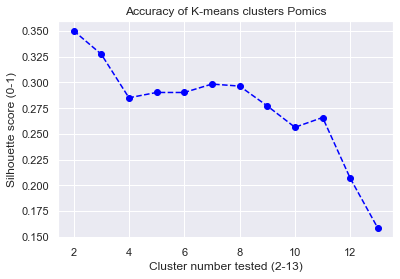

In [25]:
plt.plot(n_cluster_list, s_score_list, linestyle='--', marker='o', color='blue')
plt.xlabel('Cluster number tested (2-13)')
plt.ylabel('Silhouette score (0-1)')
plt.title('Accuracy of K-means clusters Pomics')

# Gap statistic

In [26]:
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
# Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
# For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
# Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
# Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
# Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)
    score_g, df = optimalK(cluster_df, nrefs=5, maxClusters=30)
    plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
    plt.xlabel('K');
    plt.ylabel('Gap Statistic');
    plt.title('Gap Statistic vs. K');

In [27]:
column_names = ["cluster number"]

df = pd.DataFrame(columns = column_names)
df['cluster number'] = range(0,12)
df

,cluster number
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [68]:
def resid_regression_df(number_of_iterations):
    for n in number_of_iterations:
        run = optimalK(data, nrefs=5, maxClusters=12)
        run_df = run[1]

        clusterCount = []
        for count in run_df['clusterCount']:
            clusterCount.append(count)

        gap = []
        for g in run_df['gap']:
            gap.append(g)

        #cut off first four values. 
        run_df_2 = run_df[2:12]
        clusterCount_2 = clusterCount[2:12]
        gap_2 = gap[2:12]

        #least squares method linear regression model fit data.
        gap_stat_model = ols('gap_2 ~ clusterCount_2', data=run_df_2).fit()
        resids = gap_stat_model.resid
        column_name = 'iteration_' + str(n)
        df[column_name] = resids
        
    return(df)

In [69]:
resid_regression_df(range(20))

,cluster number,iteration_0,iteration_1,iteration_2,iteration_3,iteration_4,iteration_5,iteration_6,iteration_7,iteration_8,...,iteration_10,iteration_11,iteration_12,iteration_13,iteration_14,iteration_15,iteration_16,iteration_17,iteration_18,iteration_19
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0.005392,0.005179,0.002529,-0.010612,-0.008263,0.010416,-0.003122,-0.002142,0.015156,...,-0.003653,-0.023597,0.008626,0.015686,-0.009101,-0.016565,0.004262,-0.005013,0.006087,0.022063
3,3,0.008021,0.007863,0.004892,0.005349,0.021198,0.021377,-0.004028,0.006860,-0.000066,...,0.015398,0.007925,0.000511,-0.004733,0.015319,0.030614,0.011440,0.017144,0.016019,0.007099
4,4,0.006468,-0.006210,-0.003481,-0.006901,0.003236,0.005184,-0.003194,0.017088,-0.002728,...,0.002995,0.031712,-0.010655,-0.004486,-0.015940,0.015074,0.001394,-0.003157,0.002674,0.006900
5,5,-0.027590,-0.021895,0.016437,0.004114,-0.027454,-0.031659,0.014006,0.003881,-0.018115,...,-0.009670,-0.008785,0.018009,0.002987,0.013641,-0.043634,-0.004045,0.000531,-0.007213,-0.043773
6,6,-0.001813,0.019808,-0.016383,0.010454,0.000902,-0.009739,0.013978,-0.020743,0.009199,...,0.001012,0.005253,-0.003127,0.005736,-0.005383,0.004549,-0.011280,0.010024,-0.020432,-0.018073
7,7,0.008364,-0.019250,-0.016636,0.001770,0.011582,-0.015930,-0.005063,-0.023260,-0.008847,...,-0.007981,-0.001479,-0.031151,-0.022438,0.003375,0.016349,-0.014579,-0.033106,-0.021401,0.016962
8,8,-0.013707,0.014014,0.005316,0.019699,0.000258,-0.019817,-0.022622,-0.007442,-0.019536,...,-0.012795,-0.005080,-0.000945,-0.007974,-0.003926,0.005135,-0.016380,0.006174,0.006412,-0.023987
9,9,0.009439,0.000750,-0.010964,-0.018237,-0.003292,0.020606,0.006833,0.014824,0.014972,...,-0.002701,-0.019461,0.009146,-0.020053,0.012268,-0.031566,0.019298,-0.016746,-0.007700,0.020652


In [71]:
df_2 = df.iloc[2:11, :]
df_2

,cluster number,iteration_0,iteration_1,iteration_2,iteration_3,iteration_4,iteration_5,iteration_6,iteration_7,iteration_8,...,iteration_10,iteration_11,iteration_12,iteration_13,iteration_14,iteration_15,iteration_16,iteration_17,iteration_18,iteration_19
2,2,0.005392,0.005179,0.002529,-0.010612,-0.008263,0.010416,-0.003122,-0.002142,0.015156,...,-0.003653,-0.023597,0.008626,0.015686,-0.009101,-0.016565,0.004262,-0.005013,0.006087,0.022063
3,3,0.008021,0.007863,0.004892,0.005349,0.021198,0.021377,-0.004028,0.006860,-0.000066,...,0.015398,0.007925,0.000511,-0.004733,0.015319,0.030614,0.011440,0.017144,0.016019,0.007099
4,4,0.006468,-0.006210,-0.003481,-0.006901,0.003236,0.005184,-0.003194,0.017088,-0.002728,...,0.002995,0.031712,-0.010655,-0.004486,-0.015940,0.015074,0.001394,-0.003157,0.002674,0.006900
5,5,-0.027590,-0.021895,0.016437,0.004114,-0.027454,-0.031659,0.014006,0.003881,-0.018115,...,-0.009670,-0.008785,0.018009,0.002987,0.013641,-0.043634,-0.004045,0.000531,-0.007213,-0.043773
6,6,-0.001813,0.019808,-0.016383,0.010454,0.000902,-0.009739,0.013978,-0.020743,0.009199,...,0.001012,0.005253,-0.003127,0.005736,-0.005383,0.004549,-0.011280,0.010024,-0.020432,-0.018073
7,7,0.008364,-0.019250,-0.016636,0.001770,0.011582,-0.015930,-0.005063,-0.023260,-0.008847,...,-0.007981,-0.001479,-0.031151,-0.022438,0.003375,0.016349,-0.014579,-0.033106,-0.021401,0.016962
8,8,-0.013707,0.014014,0.005316,0.019699,0.000258,-0.019817,-0.022622,-0.007442,-0.019536,...,-0.012795,-0.005080,-0.000945,-0.007974,-0.003926,0.005135,-0.016380,0.006174,0.006412,-0.023987
9,9,0.009439,0.000750,-0.010964,-0.018237,-0.003292,0.020606,0.006833,0.014824,0.014972,...,-0.002701,-0.019461,0.009146,-0.020053,0.012268,-0.031566,0.019298,-0.016746,-0.007700,0.020652
10,10,0.005427,-0.000259,0.018290,-0.005636,0.001834,0.019562,0.003213,0.010935,0.009965,...,0.017395,0.013512,0.009586,0.035276,-0.010253,0.020044,0.009890,0.024148,0.025554,0.012158


In [73]:
sums = []
for n in range(9):
    sum_of_iteration = sum(df_2.iloc[n,0:13])
    sums.append(sum_of_iteration)
    
sums

[1.9757607808653712,
 3.091038366444726,
 4.058993979218875,
 4.891309100198889,
 6.005566860762429,
 6.940236212968589,
 7.946378394516568,
 9.010402940667639,
 10.080313364356922]

In [74]:
df_2['sums'] = sums
df_2

<ipython-input-74-455ec691647b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['sums'] = sums


,cluster number,iteration_0,iteration_1,iteration_2,iteration_3,iteration_4,iteration_5,iteration_6,iteration_7,iteration_8,...,iteration_11,iteration_12,iteration_13,iteration_14,iteration_15,iteration_16,iteration_17,iteration_18,iteration_19,sums
2,2,0.005392,0.005179,0.002529,-0.010612,-0.008263,0.010416,-0.003122,-0.002142,0.015156,...,-0.023597,0.008626,0.015686,-0.009101,-0.016565,0.004262,-0.005013,0.006087,0.022063,1.975761
3,3,0.008021,0.007863,0.004892,0.005349,0.021198,0.021377,-0.004028,0.006860,-0.000066,...,0.007925,0.000511,-0.004733,0.015319,0.030614,0.011440,0.017144,0.016019,0.007099,3.091038
4,4,0.006468,-0.006210,-0.003481,-0.006901,0.003236,0.005184,-0.003194,0.017088,-0.002728,...,0.031712,-0.010655,-0.004486,-0.015940,0.015074,0.001394,-0.003157,0.002674,0.006900,4.058994
5,5,-0.027590,-0.021895,0.016437,0.004114,-0.027454,-0.031659,0.014006,0.003881,-0.018115,...,-0.008785,0.018009,0.002987,0.013641,-0.043634,-0.004045,0.000531,-0.007213,-0.043773,4.891309
6,6,-0.001813,0.019808,-0.016383,0.010454,0.000902,-0.009739,0.013978,-0.020743,0.009199,...,0.005253,-0.003127,0.005736,-0.005383,0.004549,-0.011280,0.010024,-0.020432,-0.018073,6.005567
7,7,0.008364,-0.019250,-0.016636,0.001770,0.011582,-0.015930,-0.005063,-0.023260,-0.008847,...,-0.001479,-0.031151,-0.022438,0.003375,0.016349,-0.014579,-0.033106,-0.021401,0.016962,6.940236
8,8,-0.013707,0.014014,0.005316,0.019699,0.000258,-0.019817,-0.022622,-0.007442,-0.019536,...,-0.005080,-0.000945,-0.007974,-0.003926,0.005135,-0.016380,0.006174,0.006412,-0.023987,7.946378
9,9,0.009439,0.000750,-0.010964,-0.018237,-0.003292,0.020606,0.006833,0.014824,0.014972,...,-0.019461,0.009146,-0.020053,0.012268,-0.031566,0.019298,-0.016746,-0.007700,0.020652,9.010403
10,10,0.005427,-0.000259,0.018290,-0.005636,0.001834,0.019562,0.003213,0.010935,0.009965,...,0.013512,0.009586,0.035276,-0.010253,0.020044,0.009890,0.024148,0.025554,0.012158,10.080313


Text(0, 0.5, 'Residual for Gap statistic across iterations')

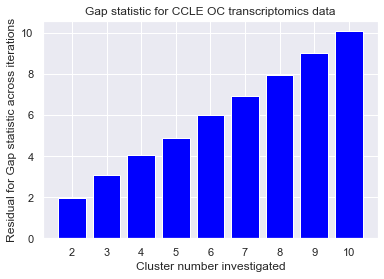

In [75]:
sum_of_gap_resids = df_2['sums']
clusters_investigated = []
for n in range(2,11):
    clusters_investigated.append(n)
clusters_investigated = tuple(clusters_investigated)
x_pos = np.arange(len(clusters_investigated))
gap_plot = plt.bar(x_pos, sum_of_gap_resids, color = 'blue')
plt.xticks(x_pos, clusters_investigated)
plt.title('Gap statistic for CCLE OC transcriptomics data')
plt.xlabel('Cluster number investigated')
plt.ylabel('Residual for Gap statistic across iterations')

# why does this gap resid plot look weird? try over greater range maybe? 

# run separately from residual loop to see what gap stat plot looks like. 

In [186]:
run_1 = optimalK(data, nrefs=10, maxClusters=18)
run_1

<ipython-input-26-89b0f9b09989>:33: RuntimeWarning: divide by zero encountered in log
  gap = np.log(np.mean(refDisps)) - np.log(origDisp)
<ipython-input-26-89b0f9b09989>:33: RuntimeWarning: invalid value encountered in double_scalars
  gap = np.log(np.mean(refDisps)) - np.log(origDisp)


(17,
     clusterCount       gap
 0            1.0 -1.919817
 1            2.0 -1.780546
 2            3.0 -1.707644
 3            4.0 -1.702183
 4            5.0 -1.648802
 5            6.0 -1.655034
 6            7.0 -1.634064
 7            8.0 -1.565578
 8            9.0 -1.539914
 9           10.0 -1.531643
 10          11.0 -1.525362
 11          12.0 -1.447127
 12          13.0 -1.429684
 13          14.0 -1.350929
 14          15.0 -1.241358
 15          16.0 -1.119930
 16          17.0       NaN)

In [187]:
run_1_df = run_1[1]

clusterCount_1 = []
for count in run_1_df['clusterCount']:
    clusterCount_1.append(count)
    
gap_1 = []
for gap in run_1_df['gap']:
    gap_1.append(gap)
    
print(len(clusterCount_1))
print(len(gap_1))

17
17


In [196]:
#cut off first and last couple of clusters as initial regression modeling showed they skewed regresion line. 
clusterCount_2 = clusterCount_1[2:13]
gap_2 = gap_1[2:13]
print(clusterCount_2)
print(gap_2)

[3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]
[-1.707644354194347, -1.702182620266468, -1.6488021956022738, -1.6550342602649906, -1.634063913007985, -1.5655782388260615, -1.5399137889418046, -1.5316427863196491, -1.5253619634247162, -1.4471265172154926, -1.4296840814819083]


In [201]:
run_1_df2 = run_1_df.iloc[3:14, :]
run_1_df2

,clusterCount,gap
3,4.0,-1.702183
4,5.0,-1.648802
5,6.0,-1.655034
6,7.0,-1.634064
7,8.0,-1.565578
8,9.0,-1.539914
9,10.0,-1.531643
10,11.0,-1.525362
11,12.0,-1.447127
12,13.0,-1.429684


Text(0.5, 1.0, 'Gap Statistic vs. K for OC transcriptomics')

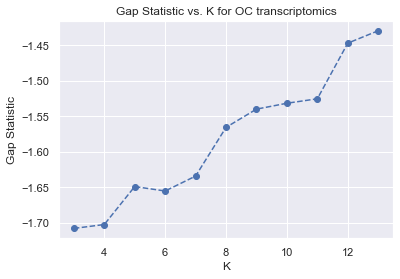

In [197]:
plt.plot(clusterCount_2, gap_2, linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic vs. K for OC transcriptomics')

In [202]:
gap_stat_model_1 = ols('gap_2 ~ clusterCount_2', data=run_1_df2).fit()
print(gap_stat_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  gap_2   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     239.7
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           8.57e-08
Time:                        14:36:28   Log-Likelihood:                 28.964
No. Observations:                  11   AIC:                            -53.93
Df Residuals:                       9   BIC:                            -53.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.8076      0.016   -114.

/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


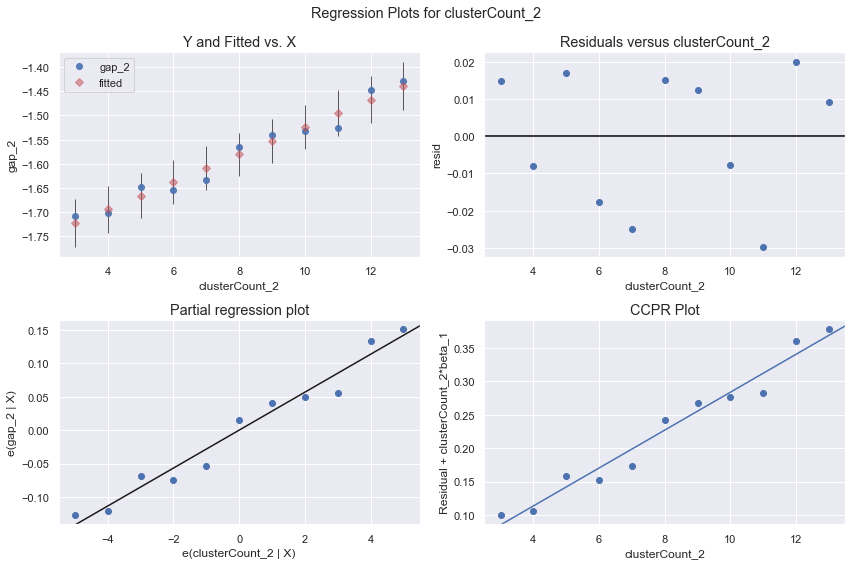

In [203]:
gap_stat_fig_1 = plt.figure(figsize=(12,8))
gap_stat_fig_1 = sm.graphics.plot_regress_exog(gap_stat_model_1, 'clusterCount_2', fig=gap_stat_fig_1)

In [144]:
run_1[1]

,clusterCount,gap
0,1.0,-1.920159
1,2.0,-1.781614
2,3.0,-1.707224
3,4.0,-1.698908
4,5.0,-1.673105
5,6.0,-1.627696
6,7.0,-1.588720
7,8.0,-1.566261
8,9.0,-1.527145
9,10.0,-1.523625


In [214]:
def resid_regression_df_2(number_of_iterations):
    column_names = ["cluster number"]
    df = pd.DataFrame(columns = column_names)
    df['cluster number'] = range(3,18)
    
    for n in number_of_iterations:
        run = optimalK(data, nrefs=5, maxClusters=18)
        run_df = run[1]

        clusterCount = []
        for count in run_df['clusterCount']:
            clusterCount.append(count)

        gap = []
        for g in run_df['gap']:
            gap.append(g)
 
        run_df_2 = run_df[3:17]
        clusterCount_2 = clusterCount[3:17]
        gap_2 = gap[3:17]

        #least squares method linear regression model fit data.
        gap_stat_model = ols('gap_2 ~ clusterCount_2', data=run_df_2).fit()
        resids = gap_stat_model.resid
        column_name = 'iteration_' + str(n)
        df[column_name] = resids
        
    return(df)

In [215]:
resid_regression_df(range(10))

,cluster number,iteration_0,iteration_1,iteration_2,iteration_3,iteration_4,iteration_5,iteration_6,iteration_7,iteration_8,...,iteration_10,iteration_11,iteration_12,iteration_13,iteration_14,iteration_15,iteration_16,iteration_17,iteration_18,iteration_19
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.013610,-0.005027
2,2,0.006476,0.017274,0.012724,0.008162,0.015429,-0.005833,-0.021548,-0.000166,-0.015094,...,0.005050,0.002087,0.009476,0.015412,-0.003424,0.007188,-0.005111,0.010683,0.023119,0.034927
3,3,0.003131,-0.005453,-0.005745,0.017185,-0.009407,0.013897,0.022501,0.004567,-0.003066,...,0.005014,0.009155,0.005198,-0.011001,0.006143,-0.017407,0.001863,-0.015436,0.019689,-0.003937
4,4,-0.022465,-0.006975,0.009714,-0.016561,0.006677,-0.001926,0.028425,0.003082,0.014579,...,-0.001891,0.000439,0.003074,-0.005177,-0.000385,0.010128,0.019362,0.008383,-0.002093,0.007455
5,5,0.011058,0.000787,-0.026730,0.012922,-0.012453,-0.017893,-0.013326,-0.002170,0.008215,...,-0.015043,0.001724,-0.010793,0.028217,-0.001479,-0.020800,-0.018521,-0.006919,0.000551,-0.024665
6,6,0.003338,0.003935,0.010939,-0.019371,-0.024324,0.014797,-0.026053,0.002619,0.005182,...,0.004384,-0.009487,-0.012995,-0.029447,-0.006066,0.014092,0.016276,0.020747,-0.020769,0.002380
7,7,0.004662,-0.033827,-0.006490,-0.019445,0.017377,0.005621,0.027508,-0.013268,0.002962,...,0.002330,-0.025013,-0.008878,-0.000806,0.008824,0.007623,-0.027289,-0.017164,0.000469,0.010233
8,8,-0.010080,0.019073,-0.008426,-0.014457,0.000080,-0.015817,-0.022407,-0.010676,-0.000087,...,0.007407,-0.003639,-0.007085,-0.027067,-0.008869,0.020954,0.001250,-0.024134,-0.033946,-0.026410
9,9,-0.001405,-0.014515,0.006349,0.013898,0.009625,0.005990,-0.022542,0.012395,-0.015776,...,-0.028275,0.028230,0.016110,0.018032,0.009631,-0.013559,0.018546,0.023650,0.011650,-0.029772


In [213]:
df_2 = df.iloc[2:11, :]
df_2

,cluster number,iteration_0,iteration_1,iteration_2,iteration_3,iteration_4,iteration_5,iteration_6,iteration_7,iteration_8,...,iteration_10,iteration_11,iteration_12,iteration_13,iteration_14,iteration_15,iteration_16,iteration_17,iteration_18,iteration_19
2,2,-0.005852,0.015751,-0.004552,0.017201,0.002310,-0.011365,0.021384,0.021218,-0.008072,...,0.005050,0.002087,0.009476,0.015412,-0.003424,0.007188,-0.005111,0.010683,0.023119,0.034927
3,3,0.021722,0.012872,0.015664,-0.002665,0.004141,0.017237,0.002961,-0.012878,0.008985,...,0.005014,0.009155,0.005198,-0.011001,0.006143,-0.017407,0.001863,-0.015436,0.019689,-0.003937
4,4,-0.014386,0.005540,0.000120,0.011653,0.013844,-0.017604,-0.024699,-0.005897,0.008109,...,-0.001891,0.000439,0.003074,-0.005177,-0.000385,0.010128,0.019362,0.008383,-0.002093,0.007455
5,5,-0.000603,-0.035366,-0.013106,-0.022886,-0.002879,0.017240,0.012996,0.016724,-0.000807,...,-0.015043,0.001724,-0.010793,0.028217,-0.001479,-0.020800,-0.018521,-0.006919,0.000551,-0.024665
6,6,-0.013592,-0.010814,0.020805,-0.015242,-0.018120,0.005426,-0.021018,-0.011188,-0.007624,...,0.004384,-0.009487,-0.012995,-0.029447,-0.006066,0.014092,0.016276,0.020747,-0.020769,0.002380
7,7,-0.000314,0.004576,-0.020569,-0.017090,-0.014432,-0.019592,-0.010467,-0.006113,0.003957,...,0.002330,-0.025013,-0.008878,-0.000806,0.008824,0.007623,-0.027289,-0.017164,0.000469,0.010233
8,8,0.016182,-0.016263,-0.013089,0.007641,0.016195,0.011042,-0.002611,-0.026410,-0.007101,...,0.007407,-0.003639,-0.007085,-0.027067,-0.008869,0.020954,0.001250,-0.024134,-0.033946,-0.026410
9,9,0.007030,-0.010474,-0.003756,0.022512,-0.032749,0.004674,0.012109,-0.011927,-0.010109,...,-0.028275,0.028230,0.016110,0.018032,0.009631,-0.013559,0.018546,0.023650,0.011650,-0.029772
10,10,-0.010189,0.034177,0.018483,-0.001124,0.031690,-0.007058,0.009345,0.036471,0.012662,...,0.021025,-0.003496,0.005893,0.011838,-0.004374,-0.008218,-0.006375,0.000189,-0.013355,0.000765


In [179]:
df_2.iloc[0,1:21]

iteration_0    -0.000172
iteration_1     0.004450
iteration_2    -0.013120
iteration_3    -0.001736
iteration_4     0.016728
iteration_5    -0.000945
iteration_6    -0.003132
iteration_7     0.006318
iteration_8     0.004725
iteration_9    -0.005953
iteration_10    0.014127
iteration_11    0.008145
iteration_12    0.026682
iteration_13    0.005871
iteration_14    0.006931
iteration_15    0.019302
iteration_16   -0.012562
iteration_17    0.038983
iteration_18    0.023119
iteration_19    0.034927
Name: 2, dtype: float64

In [181]:
sums = []
for n in range(9):
    sum_of_iteration = sum(df_2.iloc[n,1:21])
    sums.append(sum_of_iteration)
    
sums

[0.1726864541283586,
 0.21530643307554764,
 0.05308066947301615,
 -0.08723270889134804,
 -0.08914994322990766,
 -0.14900835977574545,
 -0.06786638253264421,
 -0.2231109966103042,
 -0.08638957884745468]

In [182]:
df_2['sums'] = sums
df_2

<ipython-input-182-455ec691647b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['sums'] = sums


,cluster number,iteration_0,iteration_1,iteration_2,iteration_3,iteration_4,iteration_5,iteration_6,iteration_7,iteration_8,...,iteration_11,iteration_12,iteration_13,iteration_14,iteration_15,iteration_16,iteration_17,iteration_18,iteration_19,sums
2,2,-0.000172,0.004450,-0.013120,-0.001736,0.016728,-0.000945,-0.003132,0.006318,0.004725,...,0.008145,0.026682,0.005871,0.006931,0.019302,-0.012562,0.038983,0.023119,0.034927,0.172686
3,3,-0.014166,0.017914,0.019907,-0.002908,-0.012556,-0.000592,0.011341,0.011468,0.008884,...,0.026755,0.004309,0.021272,0.026156,0.025518,0.021238,0.004932,0.019689,-0.003937,0.215306
4,4,0.005020,0.005059,0.000055,0.021067,-0.013022,-0.010572,-0.006777,-0.033475,0.000995,...,0.007256,0.025364,0.017907,0.007620,0.000925,0.028011,0.000972,-0.002093,0.007455,0.053081
5,5,0.021275,-0.022098,-0.010534,0.001635,-0.007634,0.018399,-0.018253,0.005343,0.007785,...,-0.013001,-0.001659,-0.013585,0.004606,0.002649,-0.015660,-0.010327,0.000551,-0.024665,-0.087233
6,6,-0.022248,-0.016898,0.002778,-0.004461,0.017250,0.011511,0.003723,0.013788,-0.018489,...,-0.002031,-0.036036,-0.001114,0.002732,-0.041239,0.000689,-0.001430,-0.020769,0.002380,-0.089150
7,7,0.010789,0.007275,0.001243,-0.023498,-0.009565,-0.000975,0.005725,-0.002757,-0.024016,...,-0.008312,-0.014974,-0.022566,-0.031480,-0.011503,0.004232,-0.039671,0.000469,0.010233,-0.149008
8,8,0.014408,-0.012256,0.006949,0.008907,0.012296,-0.013957,0.022642,0.006189,-0.011874,...,-0.027672,-0.010724,-0.001928,-0.002239,0.004189,-0.002453,-0.022972,-0.033946,-0.026410,-0.067866
9,9,-0.008145,-0.010574,-0.010785,-0.029807,0.005471,-0.032059,0.000251,-0.015947,0.024865,...,0.010081,-0.007913,0.009306,-0.026210,0.008106,-0.025604,-0.019871,0.011650,-0.029772,-0.223111
10,10,-0.006760,0.027130,0.003507,0.030801,-0.008968,0.029191,-0.015519,0.009073,0.007124,...,0.003934,-0.001822,-0.031010,-0.031895,-0.040349,-0.015286,0.000544,-0.013355,0.000765,-0.086390


Text(0, 0.5, 'Residual for Gap statistic across iterations')

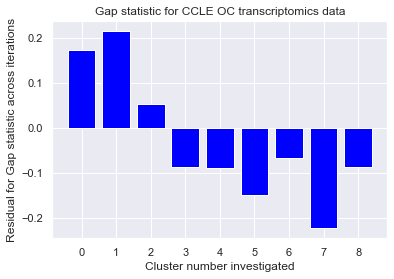

In [184]:
sum_of_gap_resids = df_2['sums']
clusters_investigated = []
for n in range(0,9):
    clusters_investigated.append(n)
clusters_investigated = tuple(clusters_investigated)
x_pos = np.arange(len(clusters_investigated))
gap_plot = plt.bar(x_pos, sum_of_gap_resids, color = 'blue')
plt.xticks(x_pos, clusters_investigated)
plt.title('Gap statistic for CCLE OC transcriptomics data')
plt.xlabel('Cluster number investigated')
plt.ylabel('Residual for Gap statistic across iterations')

Text(0, 0.5, 'Residual for Gap statistic across iterations')

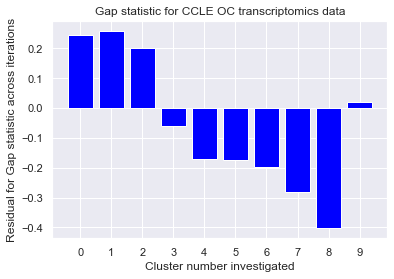

In [162]:
sum_of_gap_resids = df_2['sums']
clusters_investigated = []
for n in range(0,10):
    clusters_investigated.append(n)
clusters_investigated = tuple(clusters_investigated)
x_pos = np.arange(len(clusters_investigated))
gap_plot = plt.bar(x_pos, sum_of_gap_resids, color = 'blue')
plt.xticks(x_pos, clusters_investigated)
plt.title('Gap statistic for CCLE OC transcriptomics data')
plt.xlabel('Cluster number investigated')
plt.ylabel('Residual for Gap statistic across iterations')

In [219]:
column_names = ["cluster number"]
df = pd.DataFrame(columns = column_names)
max_clusters = 14
df['cluster number'] = range(3,max_clusters)
df

,cluster number
0,3
1,4
2,5
3,6
4,7
5,8
6,9
7,10
8,11
9,12


In [226]:
#making new iteration loop
def gap_resids(number_of_iterations, max_clusters):
    column_names = ["cluster number"]
    df = pd.DataFrame(columns = column_names)
    df['cluster number'] = range(0,max_clusters)
    
    for n in number_of_iterations:
        run = optimalK(data, nrefs=5, maxClusters=max_clusters)
        run_df = run[1]

        clusterCount = []
        for count in run_df['clusterCount']:
            clusterCount.append(count)

        gap = []
        for g in run_df['gap']:
            gap.append(g)
            
        run_df_2 = run_df[3:14]
        clusterCount_2 = clusterCount[3:14]
        gap_2 = gap[3:14]
    
        gap_stat_model = ols('gap_2 ~ clusterCount_2', data=run_df_2).fit()
        resids = gap_stat_model.resid
        column_name = 'iteration_' + str(n)
        df[column_name] = resids
    return(df)

In [229]:
df = gap_resids(range(10),17)
df

,cluster number,iteration_0,iteration_1,iteration_2,iteration_3,iteration_4,iteration_5,iteration_6,iteration_7,iteration_8,iteration_9
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.013909,0.036701,0.008944,0.010037,0.025066,0.029821,0.040673,0.009810,0.022382,-0.012459
4,4,0.021137,0.009985,0.007485,0.015709,0.009082,-0.018265,0.000781,0.005132,-0.003841,-0.005090
5,5,-0.031822,-0.018627,0.012294,0.018423,0.023188,0.016024,-0.027478,-0.001445,0.007454,0.027933
6,6,-0.003254,-0.026747,0.010042,0.006771,-0.012768,0.014994,0.003917,-0.005115,-0.016890,0.005384
7,7,0.008043,0.013602,-0.022983,-0.046626,-0.040940,-0.013162,-0.030668,0.006763,-0.018635,-0.004803
8,8,-0.010490,-0.043764,-0.022736,-0.013662,-0.017725,-0.011487,0.001749,-0.036563,0.017986,0.016225
9,9,-0.016172,0.012376,-0.019029,-0.005812,-0.037970,-0.052780,-0.011016,0.011537,-0.014263,-0.033093


In [231]:
df_2 = df.iloc[3:14, :]
df_2

,cluster number,iteration_0,iteration_1,iteration_2,iteration_3,iteration_4,iteration_5,iteration_6,iteration_7,iteration_8,iteration_9
3,3,0.013909,0.036701,0.008944,0.010037,0.025066,0.029821,0.040673,0.009810,0.022382,-0.012459
4,4,0.021137,0.009985,0.007485,0.015709,0.009082,-0.018265,0.000781,0.005132,-0.003841,-0.005090
5,5,-0.031822,-0.018627,0.012294,0.018423,0.023188,0.016024,-0.027478,-0.001445,0.007454,0.027933
6,6,-0.003254,-0.026747,0.010042,0.006771,-0.012768,0.014994,0.003917,-0.005115,-0.016890,0.005384
7,7,0.008043,0.013602,-0.022983,-0.046626,-0.040940,-0.013162,-0.030668,0.006763,-0.018635,-0.004803
8,8,-0.010490,-0.043764,-0.022736,-0.013662,-0.017725,-0.011487,0.001749,-0.036563,0.017986,0.016225
9,9,-0.016172,0.012376,-0.019029,-0.005812,-0.037970,-0.052780,-0.011016,0.011537,-0.014263,-0.033093
10,10,0.004480,0.003842,-0.010603,-0.022002,0.015935,-0.005949,0.024752,0.008672,-0.014603,-0.003397
11,11,0.016835,-0.028248,0.013006,-0.006392,0.012924,-0.008599,-0.031002,-0.015428,0.001863,-0.000902
12,12,-0.030202,0.012051,0.008039,0.013579,-0.016025,0.015609,-0.014280,0.003994,-0.011636,0.001304


In [241]:
sums = []
for n in range(11):
    sum_of_iteration = sum(df_2.iloc[n,1:11])
    sums.append(sum_of_iteration)
    
sums

[0.1848835857467508,
 0.04211492387293503,
 0.025943224977624135,
 -0.023666777949890916,
 -0.14940866914213746,
 -0.12046744766151485,
 -0.16622146428851914,
 0.0011268188527326917,
 -0.0459428472241612,
 -0.017568178291319958,
 0.2692068311074447]

In [242]:
df_2['sums'] = sums
df_2

<ipython-input-242-455ec691647b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['sums'] = sums


,cluster number,iteration_0,iteration_1,iteration_2,iteration_3,iteration_4,iteration_5,iteration_6,iteration_7,iteration_8,iteration_9,sums
3,3,0.013909,0.036701,0.008944,0.010037,0.025066,0.029821,0.040673,0.009810,0.022382,-0.012459,0.184884
4,4,0.021137,0.009985,0.007485,0.015709,0.009082,-0.018265,0.000781,0.005132,-0.003841,-0.005090,0.042115
5,5,-0.031822,-0.018627,0.012294,0.018423,0.023188,0.016024,-0.027478,-0.001445,0.007454,0.027933,0.025943
6,6,-0.003254,-0.026747,0.010042,0.006771,-0.012768,0.014994,0.003917,-0.005115,-0.016890,0.005384,-0.023667
7,7,0.008043,0.013602,-0.022983,-0.046626,-0.040940,-0.013162,-0.030668,0.006763,-0.018635,-0.004803,-0.149409
8,8,-0.010490,-0.043764,-0.022736,-0.013662,-0.017725,-0.011487,0.001749,-0.036563,0.017986,0.016225,-0.120467
9,9,-0.016172,0.012376,-0.019029,-0.005812,-0.037970,-0.052780,-0.011016,0.011537,-0.014263,-0.033093,-0.166221
10,10,0.004480,0.003842,-0.010603,-0.022002,0.015935,-0.005949,0.024752,0.008672,-0.014603,-0.003397,0.001127
11,11,0.016835,-0.028248,0.013006,-0.006392,0.012924,-0.008599,-0.031002,-0.015428,0.001863,-0.000902,-0.045943
12,12,-0.030202,0.012051,0.008039,0.013579,-0.016025,0.015609,-0.014280,0.003994,-0.011636,0.001304,-0.017568


Text(0, 0.5, 'Residual for Gap statistic across iterations')

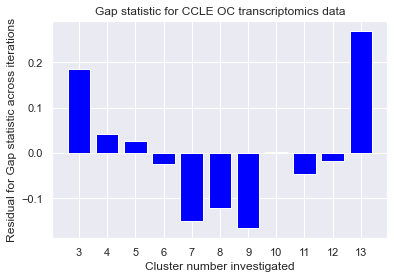

In [244]:
sum_of_gap_resids = df_2['sums']
clusters_investigated = []
for n in range(3,14):
    clusters_investigated.append(n)
clusters_investigated = tuple(clusters_investigated)
x_pos = np.arange(len(clusters_investigated))
gap_plot = plt.bar(x_pos, sum_of_gap_resids, color = 'blue')
plt.xticks(x_pos, clusters_investigated)
plt.title('Gap statistic for CCLE OC transcriptomics data')
plt.xlabel('Cluster number investigated')
plt.ylabel('Residual for Gap statistic across iterations')

# David Bouldin score for proteomics. 

In [245]:
data = pd.read_csv(r'/Users/katemeeson/Library/Mobile Documents/com~apple~CloudDocs/MRC-DTP PhD UoM/Datasets/Alternative datasets/CCLE proteomics/Normalised OC cell lines only.csv', index_col = [0])
data = data.transpose()
N, D = data.shape
print('Samples: %s, Proteins: %s'%(N, D))
data = data.dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)
data

Samples: 17, Proteins: 12755


Uniprot,S12A2_HUMAN,KDM1A_HUMAN,SRP14_HUMAN,S15A4_HUMAN,SOGA1_HUMAN,NU133_HUMAN,IRS2_HUMAN,RL4_HUMAN,FUBP2_HUMAN,FUBP3_HUMAN,...,SP1_HUMAN,I3L0E3_HUMAN,SP4_HUMAN,SP3_HUMAN,NEXN_HUMAN,RM18_HUMAN,CJ032_HUMAN,SF3B5_HUMAN,CKS2_HUMAN,RM42_HUMAN
CAOV3_OVARY_TenPx02,0.697643,0.009925,-0.574020,0.315539,0.178261,-0.286144,-0.697006,-0.116591,-0.406977,-0.125347,...,0.253674,-0.519671,-0.278100,0.077004,-0.090339,0.108490,0.351236,0.001087,0.050790,0.107655
COV362_OVARY_TenPx03,-0.576200,0.007450,-0.196959,-0.200854,-0.381734,-0.104525,-0.196893,-0.183259,-0.205265,0.011734,...,0.040602,-0.498967,-0.194423,0.430918,0.530260,0.236321,0.035910,0.119064,-0.010976,0.199670
TYKNU_OVARY_TenPx08,-0.467575,-0.183340,0.126376,-0.378587,-0.518141,0.046955,-0.887587,0.587666,-0.243615,-0.502063,...,-0.505376,0.242808,-0.051802,-0.023245,-0.757688,-0.142767,-0.459508,-0.120622,-0.068204,-0.434604
OVCAR4_OVARY_TenPx11,0.676388,-0.120693,-0.718341,-0.899913,1.268040,-0.474546,-0.617588,-0.191642,0.325719,-0.332027,...,0.168781,0.041032,-0.311952,-0.097562,4.150997,-0.298355,-0.387866,0.148244,0.008259,-0.155841
SNU119_OVARY_TenPx13,-0.648294,0.837186,-0.066834,-0.636519,-0.595932,0.151583,0.521628,0.128698,-0.089561,-0.337770,...,0.392633,-0.216097,0.626003,0.289890,1.858394,0.042502,0.093416,0.057240,-0.908248,-0.018211
FUOV1_OVARY_TenPx16,-1.137375,0.511780,-0.493287,0.017083,-0.554983,0.199323,1.146848,-0.637933,0.490498,0.309166,...,0.740052,-0.215844,0.885464,0.457326,-0.266349,-0.002485,0.917893,0.478057,1.633641,0.391953
IGROV1_OVARY_TenPx19,-0.171731,0.121767,0.111216,0.181212,-1.259058,0.633765,0.690400,-0.000672,0.571120,0.234215,...,0.695508,-0.003839,0.863175,0.212162,-1.750220,0.331552,-0.001985,0.378716,-0.385770,0.132566
HEYA8_OVARY_TenPx27,-0.966057,-0.772837,-0.404935,-0.195149,-0.319358,-0.490078,0.801680,0.820523,0.276327,0.717663,...,0.292705,0.517017,0.379647,-0.012627,1.634205,0.124881,0.663362,0.025245,-0.123178,0.529587
JHOS2_OVARY_TenPx33,0.830842,-0.374959,-0.016129,0.497475,0.067437,-0.209660,0.659774,-0.047014,-0.126932,0.271636,...,-0.649939,-0.361616,-0.359888,-0.359780,0.836853,-0.283348,0.249061,-0.272687,-0.445970,-0.926651
NIHOVCAR3_OVARY_TenPx33,1.262304,0.513282,-0.309114,0.332648,0.704417,-0.002526,-0.120933,-0.734127,-0.101219,0.530119,...,0.218723,0.562961,0.221980,-0.364820,-1.283944,0.634431,0.324781,0.708759,-0.684276,0.894820


In [293]:
column_names = ["cluster number", "DB score"]

df_db = pd.DataFrame(columns = column_names)
df_db['cluster number'] = range(2,12)
df_db

,cluster number,DB score
0,2,NaN
1,3,NaN
2,4,NaN
3,5,NaN
4,6,NaN
5,7,NaN
6,8,NaN
7,9,NaN
8,10,NaN
9,11,NaN


In [294]:
column_names = ["cluster number"]

df_db_it = pd.DataFrame(columns = column_names)
df_db_it['cluster number'] = range(2,12)
df_db_it

,cluster number
0,2
1,3
2,4
3,5
4,6
5,7
6,8
7,9
8,10
9,11


In [250]:
from sklearn.metrics import davies_bouldin_score

def get_kmeans_score(data, center):
    kmeans = KMeans(n_clusters=center)
    model = kmeans.fit_predict(data)
    score = davies_bouldin_score(data, model)
    return(score)

In [295]:
def resid_regression_db_score(number_of_iterations):
    for n in number_of_iterations:
        scores = []
        centers = []
        for num in range(2,12):
            centers.append(num)
        for center in centers:
            scores.append(get_kmeans_score(data, center))
        
        df_db['cluster number'] = centers
        df_db['DB score'] = scores
        
        model = ols('scores ~ centers', data=df_db).fit()
        
        gap_stat_model = ols('scores ~ centers', data=df_db).fit()
        resids = gap_stat_model.resid
        column_name = 'iteration_' + str(n)
        df_db_it[column_name] = resids
        
    return(df_db_it)

In [296]:
resid_regression_db_score(range(50))

,cluster number,iteration_0,iteration_1,iteration_2,iteration_3,iteration_4,iteration_5,iteration_6,iteration_7,iteration_8,...,iteration_40,iteration_41,iteration_42,iteration_43,iteration_44,iteration_45,iteration_46,iteration_47,iteration_48,iteration_49
0,2,0.088499,-0.040990,0.030108,-0.029565,-0.054311,0.245146,0.051456,-0.007434,-0.032011,...,-0.018928,-0.020692,0.016961,0.004980,-0.202884,-0.134714,-0.089481,0.020385,-0.121622,-0.108089
1,3,0.061577,0.176778,0.078248,0.210971,-0.057355,-0.257427,0.103446,0.086845,0.064732,...,0.091589,-0.067635,-0.041342,-0.053369,0.167537,0.119077,0.234383,0.102960,-0.007995,0.095989
2,4,0.034505,0.037044,-0.066038,-0.199892,0.130243,0.022609,-0.017175,0.020479,0.000828,...,-0.035047,0.211647,0.173122,0.061568,0.075027,0.056794,-0.060510,-0.005070,-0.002286,0.040421
3,5,-0.156182,-0.122070,-0.169827,0.136582,0.065868,-0.135900,-0.235824,-0.038036,0.079219,...,0.054532,-0.030479,-0.096151,0.157735,-0.024244,0.071198,0.030533,-0.151829,0.227226,0.060284
4,6,-0.095471,-0.083581,0.147745,-0.089676,0.138986,0.113071,0.156949,-0.085681,-0.095334,...,-0.043405,0.022237,-0.175543,-0.148216,0.043610,-0.068446,-0.145985,0.026758,0.185302,0.057388
5,7,-0.130475,0.018527,0.020497,-0.115014,-0.125450,-0.034596,-0.082748,-0.061108,-0.135456,...,-0.080103,-0.163622,0.045685,-0.122593,0.090403,-0.015502,0.051829,-0.055714,-0.239240,-0.149205
6,8,0.101699,-0.080201,-0.046501,0.003568,-0.150582,0.024676,-0.075674,0.026079,0.055069,...,-0.014676,0.023369,0.074042,0.087115,-0.077111,-0.086808,-0.089119,0.033685,-0.080532,0.017980
7,9,0.053201,-0.004186,-0.036031,0.009299,-0.083659,-0.012756,0.013258,0.051643,0.082808,...,-0.046524,-0.077832,0.038209,-0.001660,-0.114907,0.043243,-0.054788,-0.055130,0.029945,-0.094412
8,10,-0.005794,0.020575,-0.024874,0.037201,0.066660,0.034742,-0.008749,-0.051672,-0.023200,...,0.030296,0.057519,-0.060424,-0.021828,-0.012579,0.013241,0.070175,0.037582,0.023366,0.004999
9,11,0.048441,0.078105,0.066673,0.036525,0.069600,0.000433,0.095061,0.058886,0.003345,...,0.062267,0.045489,0.025442,0.036268,0.055148,0.001917,0.052963,0.046372,-0.014163,0.074645


In [263]:
df_db_it.iloc[0,1:51]

iteration_0     0.147500
iteration_1     0.054251
iteration_2     0.022047
iteration_3     0.147125
iteration_4     0.096439
iteration_5     0.259424
iteration_6     0.245457
iteration_7     0.158711
iteration_8    -0.005410
iteration_9     0.292726
iteration_10    0.024900
iteration_11   -0.028015
iteration_12    0.138539
iteration_13    0.185598
iteration_14    0.066560
iteration_15    0.130774
iteration_16   -0.060899
iteration_17    0.180780
iteration_18    0.149114
iteration_19    0.188590
iteration_20    0.186196
iteration_21    0.249704
iteration_22    0.165811
iteration_23    0.170242
iteration_24    0.181389
iteration_25    0.161930
iteration_26    0.206752
iteration_27    0.154713
iteration_28    0.210089
iteration_29    0.150835
iteration_30    0.098793
iteration_31    0.303863
iteration_32    0.182327
iteration_33   -0.019196
iteration_34    0.215565
iteration_35    0.090496
iteration_36    0.070643
iteration_37    0.100203
iteration_38    0.087572
iteration_39    0.018346


In [297]:
#make a list of the sums, then add this as a column. 
sums_db = []
for n in range(0,10):
    sum_of_iteration_db = sum(df_db_it.iloc[n,1:51])
    sums_db.append(sum_of_iteration_db)
    
sums_db

[-1.4461067527858205,
 3.875210633770501,
 1.3261774268810835,
 -1.0796941946342802,
 -1.7019398940335944,
 -1.835734539874246,
 -1.1258492352847334,
 -0.9763589374032384,
 0.39110209487214287,
 2.573193398492087]

In [298]:
df_db_it['sums'] = sums_db
df_db_it

,cluster number,iteration_0,iteration_1,iteration_2,iteration_3,iteration_4,iteration_5,iteration_6,iteration_7,iteration_8,...,iteration_41,iteration_42,iteration_43,iteration_44,iteration_45,iteration_46,iteration_47,iteration_48,iteration_49,sums
0,2,0.088499,-0.040990,0.030108,-0.029565,-0.054311,0.245146,0.051456,-0.007434,-0.032011,...,-0.020692,0.016961,0.004980,-0.202884,-0.134714,-0.089481,0.020385,-0.121622,-0.108089,-1.446107
1,3,0.061577,0.176778,0.078248,0.210971,-0.057355,-0.257427,0.103446,0.086845,0.064732,...,-0.067635,-0.041342,-0.053369,0.167537,0.119077,0.234383,0.102960,-0.007995,0.095989,3.875211
2,4,0.034505,0.037044,-0.066038,-0.199892,0.130243,0.022609,-0.017175,0.020479,0.000828,...,0.211647,0.173122,0.061568,0.075027,0.056794,-0.060510,-0.005070,-0.002286,0.040421,1.326177
3,5,-0.156182,-0.122070,-0.169827,0.136582,0.065868,-0.135900,-0.235824,-0.038036,0.079219,...,-0.030479,-0.096151,0.157735,-0.024244,0.071198,0.030533,-0.151829,0.227226,0.060284,-1.079694
4,6,-0.095471,-0.083581,0.147745,-0.089676,0.138986,0.113071,0.156949,-0.085681,-0.095334,...,0.022237,-0.175543,-0.148216,0.043610,-0.068446,-0.145985,0.026758,0.185302,0.057388,-1.701940
5,7,-0.130475,0.018527,0.020497,-0.115014,-0.125450,-0.034596,-0.082748,-0.061108,-0.135456,...,-0.163622,0.045685,-0.122593,0.090403,-0.015502,0.051829,-0.055714,-0.239240,-0.149205,-1.835735
6,8,0.101699,-0.080201,-0.046501,0.003568,-0.150582,0.024676,-0.075674,0.026079,0.055069,...,0.023369,0.074042,0.087115,-0.077111,-0.086808,-0.089119,0.033685,-0.080532,0.017980,-1.125849
7,9,0.053201,-0.004186,-0.036031,0.009299,-0.083659,-0.012756,0.013258,0.051643,0.082808,...,-0.077832,0.038209,-0.001660,-0.114907,0.043243,-0.054788,-0.055130,0.029945,-0.094412,-0.976359
8,10,-0.005794,0.020575,-0.024874,0.037201,0.066660,0.034742,-0.008749,-0.051672,-0.023200,...,0.057519,-0.060424,-0.021828,-0.012579,0.013241,0.070175,0.037582,0.023366,0.004999,0.391102
9,11,0.048441,0.078105,0.066673,0.036525,0.069600,0.000433,0.095061,0.058886,0.003345,...,0.045489,0.025442,0.036268,0.055148,0.001917,0.052963,0.046372,-0.014163,0.074645,2.573193


<BarContainer object of 10 artists>

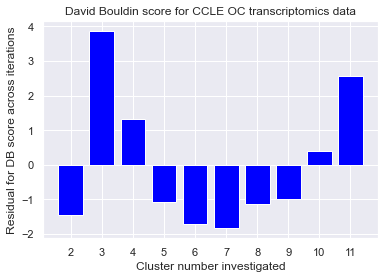

In [299]:
sum_of_db_resids = df_db_it['sums']
clusters_investigated_db = []
for n in range(2,12):
    clusters_investigated_db.append(n)
clusters_investigated_db = tuple(clusters_investigated_db)
x_pos_db = np.arange(len(clusters_investigated_db))
db_plot = plt.bar(x_pos_db, sum_of_db_resids, color = 'blue')
plt.xticks(x_pos_db, clusters_investigated_db)
plt.title('David Bouldin score for CCLE OC transcriptomics data')
plt.xlabel('Cluster number investigated')
plt.ylabel('Residual for DB score across iterations')
db_plot

## Individual DB plot without iteration loop to work out which cluster numbers should be included in regression model. 

Text(0.5, 1.0, 'Davies Bouldin score vs. cluster number')

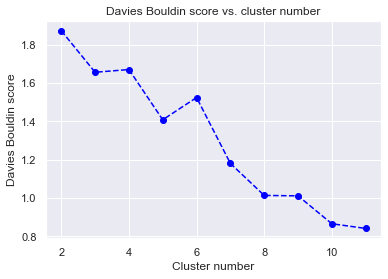

In [292]:
column_names = ["cluster number", "DB score"]

df1 = pd.DataFrame(columns = column_names)

scores = []
centers = []
for n in range(2,12):
    centers.append(n)
for center in centers:
    scores.append(get_kmeans_score(data, center))
df1['cluster number'] = centers
df1['DB score'] = scores
plt.plot(centers, scores, linestyle='--', marker='o', color='blue')
plt.xlabel('Cluster number')
plt.ylabel('Davies Bouldin score')
plt.title('Davies Bouldin score vs. cluster number')

# Modal cluster number for proteomics? 

In [300]:
import statistics
potential_optimal_pomics_clusters = [5, 7, 6, 5, 4, 3, 4, 5, 7, 6, 8, 5]
statistics.mode(potential_optimal_pomics_clusters)

5

# Agreement of Pomics K-means and hierarchical clustering using cluster number 5.

In [5]:
from sklearn.metrics.cluster import adjusted_rand_score

In [303]:
def ari_calc(optimal_cluster_number):
    scaler = StandardScaler()
    segmentation_std = scaler.fit_transform(data)
    pca = PCA(n_components = 3)
    pca.fit(segmentation_std)
    scores_pca = pca.transform(segmentation_std)
    pca.transform(segmentation_std)

    #k-means elbow plot
    wcss = []
    max_clusters = 17
    for i in range(1, max_clusters):
        kmeans_pca = KMeans(i, init='k-means++', random_state=42)
        kmeans_pca.fit(scores_pca)
        wcss.append(kmeans_pca.inertia_)
    
    kmeans_pca = KMeans(n_clusters = optimal_cluster_number, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    labels = kmeans_pca.predict(scores_pca)

    #hierarchical code
    cluster = AgglomerativeClustering(n_clusters=optimal_cluster_number, affinity='euclidean', linkage='ward')
    cluster.fit_predict(data)

    k_means_clusters = labels #Cluster labels assigned during K-means analysis. 
    agg_hier_clusters = cluster.fit_predict(data) #Cluster labels assigned during agglomerative hierarchical analysis. 

    return(adjusted_rand_score(k_means_clusters, agg_hier_clusters))

In [306]:
ARI_list = []

for n in range(2,14):
    solution = ari_calc(n)
    ARI_list.append(solution)
    
print(ARI_list)

[0.7638888888888888, 0.6214574898785425, 0.5755053507728894, 0.3484740951029099, 0.3348982785602504, 0.3815626291856139, 0.3633703920421299, 0.235, 0.5054545454545455, 0.4692682926829268, 0.8256410256410256, 1.0]


In [307]:
column_names = ["cluster number", "ARI between K-means and hierarchical"]

df = pd.DataFrame(columns = column_names)
df

,cluster number,ARI between K-means and hierarchical


In [308]:
cluster_numbers = []
for n in range(2,14):
    cluster_numbers.append(n)

df['cluster number'] = cluster_numbers
df['ARI between K-means and hierarchical'] = ARI_list

print(df)

    cluster number  ARI between K-means and hierarchical
0                2                              0.763889
1                3                              0.621457
2                4                              0.575505
3                5                              0.348474
4                6                              0.334898
5                7                              0.381563
6                8                              0.363370
7                9                              0.235000
8               10                              0.505455
9               11                              0.469268
10              12                              0.825641
11              13                              1.000000


<ipython-input-310-e63720e491be>:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('ARI plot 2-12', dpi=1200, facecolor='w', edgecolor='w',
<ipython-input-310-e63720e491be>:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('ARI plot 2-12', dpi=1200, facecolor='w', edgecolor='w',


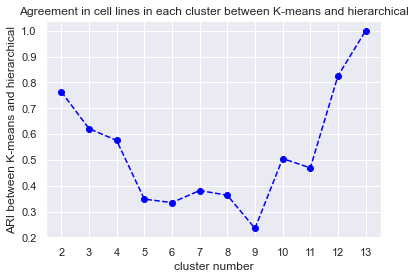

In [310]:
import math
plt.plot(cluster_numbers, ARI_list, linestyle='--', marker='o', color='blue')
new_list = range(math.floor(min(cluster_numbers)), math.ceil(max(cluster_numbers))+1)
plt.xticks(new_list)
plt.xlabel('cluster number')
plt.ylabel('ARI between K-means and hierarchical')
plt.title('Agreement in cell lines in each cluster between K-means and hierarchical')
plt.savefig('ARI plot 2-12', dpi=1200, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
plt.show()

In [329]:
beths_labels = pd.read_csv(r'/Users/katemeeson/Dropbox (The University of Manchester)/My Mac (Kate’s MacBook Pro)/Documents/Labels to upload proteomics.csv')
beths_labels_col = beths_labels['Labels']
beths_labels_col_list = []
for label in beths_labels_col:
    beths_labels_col_list.append(label)
    
print(len(beths_labels_col_list))
print(beths_labels_col_list)

16
[6, 2, 5, 5, 0, 0, 5, 7, 0, 0, 0, 3, 6, 5, 5, 6]


In [321]:
data

Uniprot,S12A2_HUMAN,KDM1A_HUMAN,SRP14_HUMAN,S15A4_HUMAN,SOGA1_HUMAN,NU133_HUMAN,IRS2_HUMAN,RL4_HUMAN,FUBP2_HUMAN,FUBP3_HUMAN,...,SP1_HUMAN,I3L0E3_HUMAN,SP4_HUMAN,SP3_HUMAN,NEXN_HUMAN,RM18_HUMAN,CJ032_HUMAN,SF3B5_HUMAN,CKS2_HUMAN,RM42_HUMAN
CAOV3_OVARY_TenPx02,0.697643,0.009925,-0.574020,0.315539,0.178261,-0.286144,-0.697006,-0.116591,-0.406977,-0.125347,...,0.253674,-0.519671,-0.278100,0.077004,-0.090339,0.108490,0.351236,0.001087,0.050790,0.107655
COV362_OVARY_TenPx03,-0.576200,0.007450,-0.196959,-0.200854,-0.381734,-0.104525,-0.196893,-0.183259,-0.205265,0.011734,...,0.040602,-0.498967,-0.194423,0.430918,0.530260,0.236321,0.035910,0.119064,-0.010976,0.199670
TYKNU_OVARY_TenPx08,-0.467575,-0.183340,0.126376,-0.378587,-0.518141,0.046955,-0.887587,0.587666,-0.243615,-0.502063,...,-0.505376,0.242808,-0.051802,-0.023245,-0.757688,-0.142767,-0.459508,-0.120622,-0.068204,-0.434604
OVCAR4_OVARY_TenPx11,0.676388,-0.120693,-0.718341,-0.899913,1.268040,-0.474546,-0.617588,-0.191642,0.325719,-0.332027,...,0.168781,0.041032,-0.311952,-0.097562,4.150997,-0.298355,-0.387866,0.148244,0.008259,-0.155841
SNU119_OVARY_TenPx13,-0.648294,0.837186,-0.066834,-0.636519,-0.595932,0.151583,0.521628,0.128698,-0.089561,-0.337770,...,0.392633,-0.216097,0.626003,0.289890,1.858394,0.042502,0.093416,0.057240,-0.908248,-0.018211
FUOV1_OVARY_TenPx16,-1.137375,0.511780,-0.493287,0.017083,-0.554983,0.199323,1.146848,-0.637933,0.490498,0.309166,...,0.740052,-0.215844,0.885464,0.457326,-0.266349,-0.002485,0.917893,0.478057,1.633641,0.391953
IGROV1_OVARY_TenPx19,-0.171731,0.121767,0.111216,0.181212,-1.259058,0.633765,0.690400,-0.000672,0.571120,0.234215,...,0.695508,-0.003839,0.863175,0.212162,-1.750220,0.331552,-0.001985,0.378716,-0.385770,0.132566
HEYA8_OVARY_TenPx27,-0.966057,-0.772837,-0.404935,-0.195149,-0.319358,-0.490078,0.801680,0.820523,0.276327,0.717663,...,0.292705,0.517017,0.379647,-0.012627,1.634205,0.124881,0.663362,0.025245,-0.123178,0.529587
JHOS2_OVARY_TenPx33,0.830842,-0.374959,-0.016129,0.497475,0.067437,-0.209660,0.659774,-0.047014,-0.126932,0.271636,...,-0.649939,-0.361616,-0.359888,-0.359780,0.836853,-0.283348,0.249061,-0.272687,-0.445970,-0.926651
NIHOVCAR3_OVARY_TenPx33,1.262304,0.513282,-0.309114,0.332648,0.704417,-0.002526,-0.120933,-0.734127,-0.101219,0.530119,...,0.218723,0.562961,0.221980,-0.364820,-1.283944,0.634431,0.324781,0.708759,-0.684276,0.894820


In [322]:
data_1 = data.iloc[0:9,:]
data_1

Uniprot,S12A2_HUMAN,KDM1A_HUMAN,SRP14_HUMAN,S15A4_HUMAN,SOGA1_HUMAN,NU133_HUMAN,IRS2_HUMAN,RL4_HUMAN,FUBP2_HUMAN,FUBP3_HUMAN,...,SP1_HUMAN,I3L0E3_HUMAN,SP4_HUMAN,SP3_HUMAN,NEXN_HUMAN,RM18_HUMAN,CJ032_HUMAN,SF3B5_HUMAN,CKS2_HUMAN,RM42_HUMAN
CAOV3_OVARY_TenPx02,0.697643,0.009925,-0.574020,0.315539,0.178261,-0.286144,-0.697006,-0.116591,-0.406977,-0.125347,...,0.253674,-0.519671,-0.278100,0.077004,-0.090339,0.108490,0.351236,0.001087,0.050790,0.107655
COV362_OVARY_TenPx03,-0.576200,0.007450,-0.196959,-0.200854,-0.381734,-0.104525,-0.196893,-0.183259,-0.205265,0.011734,...,0.040602,-0.498967,-0.194423,0.430918,0.530260,0.236321,0.035910,0.119064,-0.010976,0.199670
TYKNU_OVARY_TenPx08,-0.467575,-0.183340,0.126376,-0.378587,-0.518141,0.046955,-0.887587,0.587666,-0.243615,-0.502063,...,-0.505376,0.242808,-0.051802,-0.023245,-0.757688,-0.142767,-0.459508,-0.120622,-0.068204,-0.434604
OVCAR4_OVARY_TenPx11,0.676388,-0.120693,-0.718341,-0.899913,1.268040,-0.474546,-0.617588,-0.191642,0.325719,-0.332027,...,0.168781,0.041032,-0.311952,-0.097562,4.150997,-0.298355,-0.387866,0.148244,0.008259,-0.155841
SNU119_OVARY_TenPx13,-0.648294,0.837186,-0.066834,-0.636519,-0.595932,0.151583,0.521628,0.128698,-0.089561,-0.337770,...,0.392633,-0.216097,0.626003,0.289890,1.858394,0.042502,0.093416,0.057240,-0.908248,-0.018211
FUOV1_OVARY_TenPx16,-1.137375,0.511780,-0.493287,0.017083,-0.554983,0.199323,1.146848,-0.637933,0.490498,0.309166,...,0.740052,-0.215844,0.885464,0.457326,-0.266349,-0.002485,0.917893,0.478057,1.633641,0.391953
IGROV1_OVARY_TenPx19,-0.171731,0.121767,0.111216,0.181212,-1.259058,0.633765,0.690400,-0.000672,0.571120,0.234215,...,0.695508,-0.003839,0.863175,0.212162,-1.750220,0.331552,-0.001985,0.378716,-0.385770,0.132566
HEYA8_OVARY_TenPx27,-0.966057,-0.772837,-0.404935,-0.195149,-0.319358,-0.490078,0.801680,0.820523,0.276327,0.717663,...,0.292705,0.517017,0.379647,-0.012627,1.634205,0.124881,0.663362,0.025245,-0.123178,0.529587
JHOS2_OVARY_TenPx33,0.830842,-0.374959,-0.016129,0.497475,0.067437,-0.209660,0.659774,-0.047014,-0.126932,0.271636,...,-0.649939,-0.361616,-0.359888,-0.359780,0.836853,-0.283348,0.249061,-0.272687,-0.445970,-0.926651


In [323]:
data_2 = data.iloc[10:17,:]
data_2

Uniprot,S12A2_HUMAN,KDM1A_HUMAN,SRP14_HUMAN,S15A4_HUMAN,SOGA1_HUMAN,NU133_HUMAN,IRS2_HUMAN,RL4_HUMAN,FUBP2_HUMAN,FUBP3_HUMAN,...,SP1_HUMAN,I3L0E3_HUMAN,SP4_HUMAN,SP3_HUMAN,NEXN_HUMAN,RM18_HUMAN,CJ032_HUMAN,SF3B5_HUMAN,CKS2_HUMAN,RM42_HUMAN
OV56_OVARY_TenPx35,0.146497,0.113627,-0.202098,0.198169,-1.219654,0.354555,1.447458,0.822409,-0.673073,-0.502593,...,-0.856020,0.479941,-1.254866,-0.675146,1.330227,0.249225,-0.771999,-0.477772,-1.726452,-0.807232
OVSAHO_OVARY_TenPx40,0.287238,0.567296,0.858236,-0.574574,0.107184,0.789124,0.433994,0.115036,0.162530,-0.255428,...,0.061937,0.006079,-0.626854,-0.186320,1.607322,0.880781,0.314910,0.673283,-0.806795,1.145066
RMUGS_OVARY_TenPx31,-0.581180,-0.193377,-0.002249,-0.910617,0.320838,0.171849,-0.800833,-0.153695,-0.566089,0.362755,...,-0.319921,-0.158741,-0.434218,-0.376406,-0.447752,-0.515390,-0.181669,-0.489300,-1.154498,-0.616620
OV90_OVARY_TenPx32,1.156182,0.204563,-0.406602,0.237974,-1.017758,-0.215083,-1.019805,0.132265,-0.584535,-0.001682,...,-1.149707,0.460628,-0.921909,-0.534878,-0.204352,0.650630,-0.249019,-0.356699,-1.615762,0.015255
A2780_OVARY_TenPx14,0.103439,0.360932,0.476098,-0.174321,-0.116709,0.091552,-1.780468,0.425264,0.496659,0.388998,...,0.228370,-0.500375,-0.585311,0.414305,0.570428,0.019639,0.729785,-0.090579,0.826698,0.248506
KURAMOCHI_OVARY_TenPx15,-1.073721,0.706483,-0.182718,-0.516893,-0.530042,0.431738,-1.972916,-0.833718,0.992505,0.582289,...,0.314901,0.376222,1.768587,0.803922,4.189483,0.190088,0.035073,0.393638,-1.468743,0.688760
OVCAR8_OVARY_TenPx24,-1.165032,-0.828736,-0.686840,0.139091,0.134896,-0.450290,0.555800,-0.239972,0.333098,0.531633,...,-0.298931,-0.010311,0.231821,-0.668094,2.259293,-0.535367,-0.487932,0.036873,1.175428,-0.261739


In [324]:
data_NIH_removed = data_1.append(data_2)
data_NIH_removed

Uniprot,S12A2_HUMAN,KDM1A_HUMAN,SRP14_HUMAN,S15A4_HUMAN,SOGA1_HUMAN,NU133_HUMAN,IRS2_HUMAN,RL4_HUMAN,FUBP2_HUMAN,FUBP3_HUMAN,...,SP1_HUMAN,I3L0E3_HUMAN,SP4_HUMAN,SP3_HUMAN,NEXN_HUMAN,RM18_HUMAN,CJ032_HUMAN,SF3B5_HUMAN,CKS2_HUMAN,RM42_HUMAN
CAOV3_OVARY_TenPx02,0.697643,0.009925,-0.574020,0.315539,0.178261,-0.286144,-0.697006,-0.116591,-0.406977,-0.125347,...,0.253674,-0.519671,-0.278100,0.077004,-0.090339,0.108490,0.351236,0.001087,0.050790,0.107655
COV362_OVARY_TenPx03,-0.576200,0.007450,-0.196959,-0.200854,-0.381734,-0.104525,-0.196893,-0.183259,-0.205265,0.011734,...,0.040602,-0.498967,-0.194423,0.430918,0.530260,0.236321,0.035910,0.119064,-0.010976,0.199670
TYKNU_OVARY_TenPx08,-0.467575,-0.183340,0.126376,-0.378587,-0.518141,0.046955,-0.887587,0.587666,-0.243615,-0.502063,...,-0.505376,0.242808,-0.051802,-0.023245,-0.757688,-0.142767,-0.459508,-0.120622,-0.068204,-0.434604
OVCAR4_OVARY_TenPx11,0.676388,-0.120693,-0.718341,-0.899913,1.268040,-0.474546,-0.617588,-0.191642,0.325719,-0.332027,...,0.168781,0.041032,-0.311952,-0.097562,4.150997,-0.298355,-0.387866,0.148244,0.008259,-0.155841
SNU119_OVARY_TenPx13,-0.648294,0.837186,-0.066834,-0.636519,-0.595932,0.151583,0.521628,0.128698,-0.089561,-0.337770,...,0.392633,-0.216097,0.626003,0.289890,1.858394,0.042502,0.093416,0.057240,-0.908248,-0.018211
FUOV1_OVARY_TenPx16,-1.137375,0.511780,-0.493287,0.017083,-0.554983,0.199323,1.146848,-0.637933,0.490498,0.309166,...,0.740052,-0.215844,0.885464,0.457326,-0.266349,-0.002485,0.917893,0.478057,1.633641,0.391953
IGROV1_OVARY_TenPx19,-0.171731,0.121767,0.111216,0.181212,-1.259058,0.633765,0.690400,-0.000672,0.571120,0.234215,...,0.695508,-0.003839,0.863175,0.212162,-1.750220,0.331552,-0.001985,0.378716,-0.385770,0.132566
HEYA8_OVARY_TenPx27,-0.966057,-0.772837,-0.404935,-0.195149,-0.319358,-0.490078,0.801680,0.820523,0.276327,0.717663,...,0.292705,0.517017,0.379647,-0.012627,1.634205,0.124881,0.663362,0.025245,-0.123178,0.529587
JHOS2_OVARY_TenPx33,0.830842,-0.374959,-0.016129,0.497475,0.067437,-0.209660,0.659774,-0.047014,-0.126932,0.271636,...,-0.649939,-0.361616,-0.359888,-0.359780,0.836853,-0.283348,0.249061,-0.272687,-0.445970,-0.926651
OV56_OVARY_TenPx35,0.146497,0.113627,-0.202098,0.198169,-1.219654,0.354555,1.447458,0.822409,-0.673073,-0.502593,...,-0.856020,0.479941,-1.254866,-0.675146,1.330227,0.249225,-0.771999,-0.477772,-1.726452,-0.807232


In [343]:
optimal_cluster_number = 5

scaler = StandardScaler()
segmentation_std = scaler.fit_transform(data_NIH_removed)
pca = PCA(n_components = 3)
pca.fit(segmentation_std)
scores_pca = pca.transform(segmentation_std)
pca.transform(segmentation_std)
kmeans_pca = KMeans(n_clusters = optimal_cluster_number, init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)
labels = kmeans_pca.predict(scores_pca)

#hierarchical code
cluster = AgglomerativeClustering(n_clusters=optimal_cluster_number, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_NIH_removed)

k_means_clusters = labels #Cluster labels assigned during K-means analysis. 
agg_hier_clusters = cluster.fit_predict(data_NIH_removed) #Cluster labels assigned during agglomerative hierarchical analysis. 

In [336]:
print('Beths lablels: ', len(beths_labels_col_list))
print('K-means labels: ', len(labels))
print('Hierarchical labels: ', len(agg_hier_clusters))

Beths lablels:  16
K-means labels:  16
Hierarchical labels:  16


In [344]:
k_means_versus_truth = adjusted_rand_score(beths_labels_col_list, labels)
hier_versus_truth = adjusted_rand_score(beths_labels_col_list, agg_hier_clusters)
print('Agreement between literature and K-means Pomics: ', adjusted_rand_score(beths_labels_col_list, labels))
print('Agreement between literature and hierarchical Pomics: ', adjusted_rand_score(beths_labels_col_list, agg_hier_clusters))
if (adjusted_rand_score(beths_labels_col_list, labels)) > (adjusted_rand_score(beths_labels_col_list, agg_hier_clusters)):
    print('K-means is more accurate to Beths ground truth')
if (adjusted_rand_score(beths_labels_col_list, labels)) < (adjusted_rand_score(beths_labels_col_list, agg_hier_clusters)):
    print('Agglomerative hierarchical is more accurate to Beths ground truth')
aris = [k_means_versus_truth,hier_versus_truth]
average = sum(aris) / 2
print('Average agreement of Pomics with ground truth: ARI = ', average)

Agreement between literature and K-means Pomics:  -0.06654512306289881
Agreement between literature and hierarchical Pomics:  -0.19047619047619047
K-means is more accurate to Beths ground truth
Average agreement of Pomics with ground truth: ARI =  -0.12851065676954465


# Matching omics to the five NMF labels. 

## Matching the proteomics. 

In [403]:
nmf_labels = pd.read_csv(r'/Users/katemeeson/Library/Mobile Documents/com~apple~CloudDocs/MRC-DTP PhD UoM/Datasets/Alternative datasets/ground truth labels/proteomics_nmf_label.csv')
nmf_labels

,cell_line,nmf_label
0,Caov-3,4
1,COV362,4
2,TYK-nu,2
3,OVCAR-4,4
4,SNU-119,4
5,FU-OV-1,4
6,IGROV-1,3
7,HEY A8,2
8,JHOS-2,4
9,OV56,2


In [350]:
nmf_col = nmf_labels['nmf_label']
nmf_col_list = []
for label in nmf_col:
    nmf_col_list.append(label)
    
print(len(nmf_col_list))
print(nmf_col_list)

16
[4, 4, 2, 4, 4, 4, 3, 2, 4, 2, 4, 1, 1, 0, 4, 2]


In [351]:
data_NIH_removed

Uniprot,S12A2_HUMAN,KDM1A_HUMAN,SRP14_HUMAN,S15A4_HUMAN,SOGA1_HUMAN,NU133_HUMAN,IRS2_HUMAN,RL4_HUMAN,FUBP2_HUMAN,FUBP3_HUMAN,...,SP1_HUMAN,I3L0E3_HUMAN,SP4_HUMAN,SP3_HUMAN,NEXN_HUMAN,RM18_HUMAN,CJ032_HUMAN,SF3B5_HUMAN,CKS2_HUMAN,RM42_HUMAN
CAOV3_OVARY_TenPx02,0.697643,0.009925,-0.574020,0.315539,0.178261,-0.286144,-0.697006,-0.116591,-0.406977,-0.125347,...,0.253674,-0.519671,-0.278100,0.077004,-0.090339,0.108490,0.351236,0.001087,0.050790,0.107655
COV362_OVARY_TenPx03,-0.576200,0.007450,-0.196959,-0.200854,-0.381734,-0.104525,-0.196893,-0.183259,-0.205265,0.011734,...,0.040602,-0.498967,-0.194423,0.430918,0.530260,0.236321,0.035910,0.119064,-0.010976,0.199670
TYKNU_OVARY_TenPx08,-0.467575,-0.183340,0.126376,-0.378587,-0.518141,0.046955,-0.887587,0.587666,-0.243615,-0.502063,...,-0.505376,0.242808,-0.051802,-0.023245,-0.757688,-0.142767,-0.459508,-0.120622,-0.068204,-0.434604
OVCAR4_OVARY_TenPx11,0.676388,-0.120693,-0.718341,-0.899913,1.268040,-0.474546,-0.617588,-0.191642,0.325719,-0.332027,...,0.168781,0.041032,-0.311952,-0.097562,4.150997,-0.298355,-0.387866,0.148244,0.008259,-0.155841
SNU119_OVARY_TenPx13,-0.648294,0.837186,-0.066834,-0.636519,-0.595932,0.151583,0.521628,0.128698,-0.089561,-0.337770,...,0.392633,-0.216097,0.626003,0.289890,1.858394,0.042502,0.093416,0.057240,-0.908248,-0.018211
FUOV1_OVARY_TenPx16,-1.137375,0.511780,-0.493287,0.017083,-0.554983,0.199323,1.146848,-0.637933,0.490498,0.309166,...,0.740052,-0.215844,0.885464,0.457326,-0.266349,-0.002485,0.917893,0.478057,1.633641,0.391953
IGROV1_OVARY_TenPx19,-0.171731,0.121767,0.111216,0.181212,-1.259058,0.633765,0.690400,-0.000672,0.571120,0.234215,...,0.695508,-0.003839,0.863175,0.212162,-1.750220,0.331552,-0.001985,0.378716,-0.385770,0.132566
HEYA8_OVARY_TenPx27,-0.966057,-0.772837,-0.404935,-0.195149,-0.319358,-0.490078,0.801680,0.820523,0.276327,0.717663,...,0.292705,0.517017,0.379647,-0.012627,1.634205,0.124881,0.663362,0.025245,-0.123178,0.529587
JHOS2_OVARY_TenPx33,0.830842,-0.374959,-0.016129,0.497475,0.067437,-0.209660,0.659774,-0.047014,-0.126932,0.271636,...,-0.649939,-0.361616,-0.359888,-0.359780,0.836853,-0.283348,0.249061,-0.272687,-0.445970,-0.926651
OV56_OVARY_TenPx35,0.146497,0.113627,-0.202098,0.198169,-1.219654,0.354555,1.447458,0.822409,-0.673073,-0.502593,...,-0.856020,0.479941,-1.254866,-0.675146,1.330227,0.249225,-0.771999,-0.477772,-1.726452,-0.807232


In [352]:
optimal_cluster_number = 5

scaler = StandardScaler()
segmentation_std = scaler.fit_transform(data_NIH_removed)
pca = PCA(n_components = 3)
pca.fit(segmentation_std)
scores_pca = pca.transform(segmentation_std)
pca.transform(segmentation_std)
kmeans_pca = KMeans(n_clusters = optimal_cluster_number, init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)
labels = kmeans_pca.predict(scores_pca)

#hierarchical code
cluster = AgglomerativeClustering(n_clusters=optimal_cluster_number, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_NIH_removed)

k_means_clusters = labels #Cluster labels assigned during K-means analysis. 
agg_hier_clusters = cluster.fit_predict(data_NIH_removed) #Cluster labels assigned during agglomerative hierarchical analysis.

In [353]:
k_means_versus_truth = adjusted_rand_score(nmf_col_list, labels)
hier_versus_truth = adjusted_rand_score(nmf_col_list, agg_hier_clusters)
print('Agreement between NMF and K-means Pomics: ', adjusted_rand_score(nmf_col_list, labels))
print('Agreement between NMF and hierarchical Pomics: ', adjusted_rand_score(nmf_col_list, agg_hier_clusters))
if (adjusted_rand_score(nmf_col_list, labels)) > (adjusted_rand_score(nmf_col_list, agg_hier_clusters)):
    print('K-means is more accurate to NMF')
if (adjusted_rand_score(nmf_col_list, labels)) < (adjusted_rand_score(nmf_col_list, agg_hier_clusters)):
    print('Agglomerative hierarchical is more accurate to NMF')
aris = [k_means_versus_truth,hier_versus_truth]
average = sum(aris) / 2
print('Average agreement of Pomics with NMF: ARI = ', average)

Agreement between NMF and K-means Pomics:  0.16226415094339622
Agreement between NMF and hierarchical Pomics:  0.044444444444444446
K-means is more accurate to NMF
Average agreement of Pomics with NMF: ARI =  0.10335429769392034


# Visualise Pomics clustering 5 labels against NMF 5 labels. Where is the overlap? 

## Label according to proteomics, K-means k=5

In [356]:
column_names = ['Cell line', 'label']
df = df = pd.DataFrame(columns = column_names)
df

,Cell line,label


In [421]:
data = pd.read_csv(r'/Users/katemeeson/Library/Mobile Documents/com~apple~CloudDocs/MRC-DTP PhD UoM/Datasets/Alternative datasets/CCLE proteomics/Normalised OC cell lines only.csv', index_col = [0])
data = data.transpose()
N, D = data.shape
print('Samples: %s, Proteins: %s'%(N, D))
data = data.dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)
data

Samples: 17, Proteins: 12755


Uniprot,S12A2_HUMAN,KDM1A_HUMAN,SRP14_HUMAN,S15A4_HUMAN,SOGA1_HUMAN,NU133_HUMAN,IRS2_HUMAN,RL4_HUMAN,FUBP2_HUMAN,FUBP3_HUMAN,...,SP1_HUMAN,I3L0E3_HUMAN,SP4_HUMAN,SP3_HUMAN,NEXN_HUMAN,RM18_HUMAN,CJ032_HUMAN,SF3B5_HUMAN,CKS2_HUMAN,RM42_HUMAN
CAOV3_OVARY_TenPx02,0.697643,0.009925,-0.574020,0.315539,0.178261,-0.286144,-0.697006,-0.116591,-0.406977,-0.125347,...,0.253674,-0.519671,-0.278100,0.077004,-0.090339,0.108490,0.351236,0.001087,0.050790,0.107655
COV362_OVARY_TenPx03,-0.576200,0.007450,-0.196959,-0.200854,-0.381734,-0.104525,-0.196893,-0.183259,-0.205265,0.011734,...,0.040602,-0.498967,-0.194423,0.430918,0.530260,0.236321,0.035910,0.119064,-0.010976,0.199670
TYKNU_OVARY_TenPx08,-0.467575,-0.183340,0.126376,-0.378587,-0.518141,0.046955,-0.887587,0.587666,-0.243615,-0.502063,...,-0.505376,0.242808,-0.051802,-0.023245,-0.757688,-0.142767,-0.459508,-0.120622,-0.068204,-0.434604
OVCAR4_OVARY_TenPx11,0.676388,-0.120693,-0.718341,-0.899913,1.268040,-0.474546,-0.617588,-0.191642,0.325719,-0.332027,...,0.168781,0.041032,-0.311952,-0.097562,4.150997,-0.298355,-0.387866,0.148244,0.008259,-0.155841
SNU119_OVARY_TenPx13,-0.648294,0.837186,-0.066834,-0.636519,-0.595932,0.151583,0.521628,0.128698,-0.089561,-0.337770,...,0.392633,-0.216097,0.626003,0.289890,1.858394,0.042502,0.093416,0.057240,-0.908248,-0.018211
FUOV1_OVARY_TenPx16,-1.137375,0.511780,-0.493287,0.017083,-0.554983,0.199323,1.146848,-0.637933,0.490498,0.309166,...,0.740052,-0.215844,0.885464,0.457326,-0.266349,-0.002485,0.917893,0.478057,1.633641,0.391953
IGROV1_OVARY_TenPx19,-0.171731,0.121767,0.111216,0.181212,-1.259058,0.633765,0.690400,-0.000672,0.571120,0.234215,...,0.695508,-0.003839,0.863175,0.212162,-1.750220,0.331552,-0.001985,0.378716,-0.385770,0.132566
HEYA8_OVARY_TenPx27,-0.966057,-0.772837,-0.404935,-0.195149,-0.319358,-0.490078,0.801680,0.820523,0.276327,0.717663,...,0.292705,0.517017,0.379647,-0.012627,1.634205,0.124881,0.663362,0.025245,-0.123178,0.529587
JHOS2_OVARY_TenPx33,0.830842,-0.374959,-0.016129,0.497475,0.067437,-0.209660,0.659774,-0.047014,-0.126932,0.271636,...,-0.649939,-0.361616,-0.359888,-0.359780,0.836853,-0.283348,0.249061,-0.272687,-0.445970,-0.926651
NIHOVCAR3_OVARY_TenPx33,1.262304,0.513282,-0.309114,0.332648,0.704417,-0.002526,-0.120933,-0.734127,-0.101219,0.530119,...,0.218723,0.562961,0.221980,-0.364820,-1.283944,0.634431,0.324781,0.708759,-0.684276,0.894820


In [422]:
data_1 = data.iloc[0:9,:]
data_2 = data.iloc[10:17,:]
data = data_1.append(data_2)
data

Uniprot,S12A2_HUMAN,KDM1A_HUMAN,SRP14_HUMAN,S15A4_HUMAN,SOGA1_HUMAN,NU133_HUMAN,IRS2_HUMAN,RL4_HUMAN,FUBP2_HUMAN,FUBP3_HUMAN,...,SP1_HUMAN,I3L0E3_HUMAN,SP4_HUMAN,SP3_HUMAN,NEXN_HUMAN,RM18_HUMAN,CJ032_HUMAN,SF3B5_HUMAN,CKS2_HUMAN,RM42_HUMAN
CAOV3_OVARY_TenPx02,0.697643,0.009925,-0.574020,0.315539,0.178261,-0.286144,-0.697006,-0.116591,-0.406977,-0.125347,...,0.253674,-0.519671,-0.278100,0.077004,-0.090339,0.108490,0.351236,0.001087,0.050790,0.107655
COV362_OVARY_TenPx03,-0.576200,0.007450,-0.196959,-0.200854,-0.381734,-0.104525,-0.196893,-0.183259,-0.205265,0.011734,...,0.040602,-0.498967,-0.194423,0.430918,0.530260,0.236321,0.035910,0.119064,-0.010976,0.199670
TYKNU_OVARY_TenPx08,-0.467575,-0.183340,0.126376,-0.378587,-0.518141,0.046955,-0.887587,0.587666,-0.243615,-0.502063,...,-0.505376,0.242808,-0.051802,-0.023245,-0.757688,-0.142767,-0.459508,-0.120622,-0.068204,-0.434604
OVCAR4_OVARY_TenPx11,0.676388,-0.120693,-0.718341,-0.899913,1.268040,-0.474546,-0.617588,-0.191642,0.325719,-0.332027,...,0.168781,0.041032,-0.311952,-0.097562,4.150997,-0.298355,-0.387866,0.148244,0.008259,-0.155841
SNU119_OVARY_TenPx13,-0.648294,0.837186,-0.066834,-0.636519,-0.595932,0.151583,0.521628,0.128698,-0.089561,-0.337770,...,0.392633,-0.216097,0.626003,0.289890,1.858394,0.042502,0.093416,0.057240,-0.908248,-0.018211
FUOV1_OVARY_TenPx16,-1.137375,0.511780,-0.493287,0.017083,-0.554983,0.199323,1.146848,-0.637933,0.490498,0.309166,...,0.740052,-0.215844,0.885464,0.457326,-0.266349,-0.002485,0.917893,0.478057,1.633641,0.391953
IGROV1_OVARY_TenPx19,-0.171731,0.121767,0.111216,0.181212,-1.259058,0.633765,0.690400,-0.000672,0.571120,0.234215,...,0.695508,-0.003839,0.863175,0.212162,-1.750220,0.331552,-0.001985,0.378716,-0.385770,0.132566
HEYA8_OVARY_TenPx27,-0.966057,-0.772837,-0.404935,-0.195149,-0.319358,-0.490078,0.801680,0.820523,0.276327,0.717663,...,0.292705,0.517017,0.379647,-0.012627,1.634205,0.124881,0.663362,0.025245,-0.123178,0.529587
JHOS2_OVARY_TenPx33,0.830842,-0.374959,-0.016129,0.497475,0.067437,-0.209660,0.659774,-0.047014,-0.126932,0.271636,...,-0.649939,-0.361616,-0.359888,-0.359780,0.836853,-0.283348,0.249061,-0.272687,-0.445970,-0.926651
OV56_OVARY_TenPx35,0.146497,0.113627,-0.202098,0.198169,-1.219654,0.354555,1.447458,0.822409,-0.673073,-0.502593,...,-0.856020,0.479941,-1.254866,-0.675146,1.330227,0.249225,-0.771999,-0.477772,-1.726452,-0.807232


In [423]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(data)
pca = PCA(n_components = 3)
pca.fit(segmentation_std)
scores_pca = pca.transform(segmentation_std)
pca.transform(segmentation_std)

array([[-13.00706164,  -1.41882302, -24.86079701],
       [ -1.32180159,  -2.84355454, -15.02172636],
       [-35.92828324,   3.69886791,  33.71593112],
       [ -6.44340907,  -3.16978496, -26.78812041],
       [ 24.16897064, -12.57436272,  21.49416234],
       [  6.92258182,  66.25955155,  -6.58029867],
       [ 42.00818376,  -6.09335821,   8.31893747],
       [-42.02800201,   3.45895142,  13.93307414],
       [-43.10979899, -18.98507106, -30.33539559],
       [ -6.46434336, -49.68568545,  22.75337701],
       [ 87.37825339,  -9.38647521,  15.39198271],
       [ -7.94267959, -22.02587773, -17.88255913],
       [ -2.02037806, -39.3262967 ,   0.2228791 ],
       [-39.65639575,  41.2817948 ,  37.67522568],
       [ 77.17551303,  29.24389292, -16.83622036],
       [-39.73134936,  21.56623099, -15.20045204]])

Optimal number of clusters 5


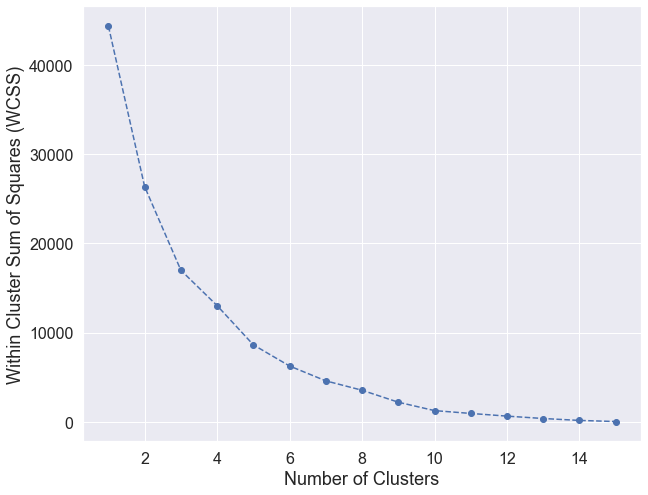

In [424]:
wcss = []
max_clusters = 16
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

n_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
print("Optimal number of clusters", n_clusters)

fig = plt.figure(figsize=(10,8))
plt.plot(range(1, 16), wcss, marker='o', linestyle='--')
# plt.vlines(n_clusters, ymin=0, ymax=max(wcss), linestyles='dashed')
plt.xlabel('Number of Clusters', fontsize=18)
plt.ylabel('Within Cluster Sum of Squares (WCSS)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [425]:
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)
data['Cluster'] = kmeans_pca.labels_
data['Cluster']

CAOV3_OVARY_TenPx02        4
COV362_OVARY_TenPx03       4
TYKNU_OVARY_TenPx08        1
OVCAR4_OVARY_TenPx11       4
SNU119_OVARY_TenPx13       3
FUOV1_OVARY_TenPx16        2
IGROV1_OVARY_TenPx19       0
HEYA8_OVARY_TenPx27        1
JHOS2_OVARY_TenPx33        4
OV56_OVARY_TenPx35         3
OVSAHO_OVARY_TenPx40       0
RMUGS_OVARY_TenPx31        4
OV90_OVARY_TenPx32         3
A2780_OVARY_TenPx14        1
KURAMOCHI_OVARY_TenPx15    0
OVCAR8_OVARY_TenPx24       1
Name: Cluster, dtype: int32

In [365]:
IDs = []
for n in nmf_labels.iloc[:,0]:
    IDs.append(n)
    
print(IDs)

['Caov-3', 'COV362', 'TYK-nu', 'OVCAR-4', 'SNU-119', 'FU-OV-1', 'IGROV-1', 'HEY A8', 'JHOS-2', 'OV56', 'OVSAHO', 'RMUG-S', 'OV-90', 'A2780', 'KURAMOCHI', 'OVCAR-8']


In [366]:
labels

array([4, 4, 1, 4, 3, 2, 0, 1, 4, 3, 0, 4, 3, 1, 0, 1], dtype=int32)

In [367]:
df['Cell line'] = IDs
df['label'] = labels
df = df.sort_values('label')
df

,Cell line,label
6,IGROV-1,0
10,OVSAHO,0
14,KURAMOCHI,0
2,TYK-nu,1
7,HEY A8,1
13,A2780,1
15,OVCAR-8,1
5,FU-OV-1,2
4,SNU-119,3
9,OV56,3


In [426]:
data['Cluster'] = data['Cluster'].map({0:'IGROV1, OVSAHO, KURAMOCHI', 1:'TYK-nu, HEY A8, A2780, OVCAR-8', 2:'FU-OV-1', 3:'SNU-119, OV56, OV-90', 4:'Caov-3, COV362, OVCAR-4, JHOS-2, RMUG-S'})

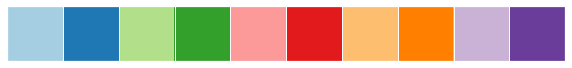

In [18]:
palette = sns.palplot(sns.color_palette("Paired", 10))

In [427]:
df_segm_pca_kmeans = pd.concat([data.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3:]=['Component 1', 'Component 2', 'Component 3']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans.head()

,S12A2_HUMAN,KDM1A_HUMAN,SRP14_HUMAN,S15A4_HUMAN,SOGA1_HUMAN,NU133_HUMAN,IRS2_HUMAN,RL4_HUMAN,FUBP2_HUMAN,FUBP3_HUMAN,...,RM18_HUMAN,CJ032_HUMAN,SF3B5_HUMAN,CKS2_HUMAN,RM42_HUMAN,Cluster,Component 1,Component 2,Component 3,Segment K-means PCA
0,0.697643,0.009925,-0.574020,0.315539,0.178261,-0.286144,-0.697006,-0.116591,-0.406977,-0.125347,...,0.108490,0.351236,0.001087,0.050790,0.107655,"Caov-3, COV362, OVCAR-4, JHOS-2, RMUG-S",-13.007062,-1.418823,-24.860797,4
1,-0.576200,0.007450,-0.196959,-0.200854,-0.381734,-0.104525,-0.196893,-0.183259,-0.205265,0.011734,...,0.236321,0.035910,0.119064,-0.010976,0.199670,"Caov-3, COV362, OVCAR-4, JHOS-2, RMUG-S",-1.321802,-2.843555,-15.021726,4
2,-0.467575,-0.183340,0.126376,-0.378587,-0.518141,0.046955,-0.887587,0.587666,-0.243615,-0.502063,...,-0.142767,-0.459508,-0.120622,-0.068204,-0.434604,"TYK-nu, HEY A8, A2780, OVCAR-8",-35.928283,3.698868,33.715931,1
3,0.676388,-0.120693,-0.718341,-0.899913,1.268040,-0.474546,-0.617588,-0.191642,0.325719,-0.332027,...,-0.298355,-0.387866,0.148244,0.008259,-0.155841,"Caov-3, COV362, OVCAR-4, JHOS-2, RMUG-S",-6.443409,-3.169785,-26.788120,4
4,-0.648294,0.837186,-0.066834,-0.636519,-0.595932,0.151583,0.521628,0.128698,-0.089561,-0.337770,...,0.042502,0.093416,0.057240,-0.908248,-0.018211,"SNU-119, OV56, OV-90",24.168971,-12.574363,21.494162,3


In [428]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'IGROV1, OVSAHO, KURAMOCHI', 1:'TYK-nu, HEY A8, A2780, OVCAR-8', 2:'FU-OV-1', 3:'SNU-119, OV56, OV-90', 4:'Caov-3, COV362, OVCAR-4, JHOS-2, RMUG-S'})

/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-440-3c2355541c60>:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('CCLE_OC_POMICS_K=5', dpi=1200, facecolor='w', edgecolor='w',
<ipython-input-440-3c2355541c60>:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('CCLE_OC_POMICS_K=5', dpi=1200, facecolor='w', edgecolor='w',


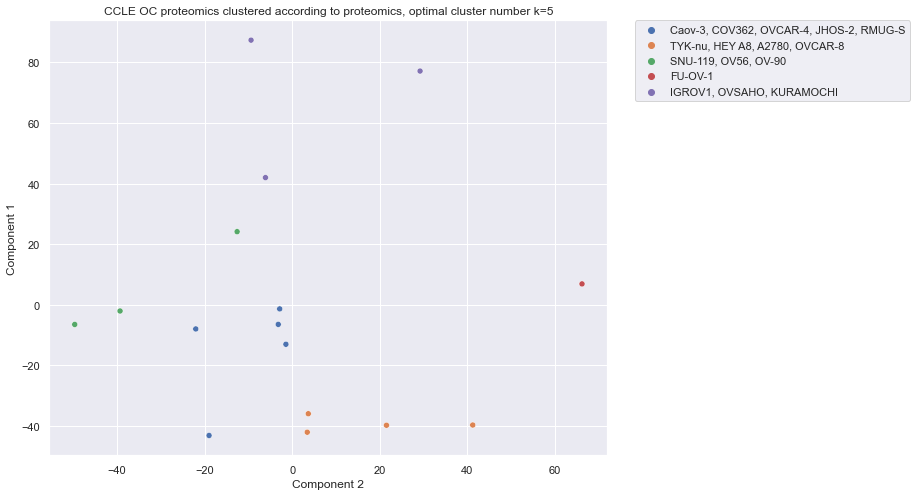

In [440]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment'], palette = palette)
plt.title('CCLE OC proteomics clustered according to proteomics, optimal cluster number k=5')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig('CCLE_OC_POMICS_K=5', dpi=1200, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)
plt.show()

## Label according to NMF labels

In [409]:
data = pd.read_csv(r'/Users/katemeeson/Library/Mobile Documents/com~apple~CloudDocs/MRC-DTP PhD UoM/Datasets/Alternative datasets/CCLE proteomics/Normalised OC cell lines only.csv', index_col = [0])
data = data.transpose()
N, D = data.shape
print('Samples: %s, Proteins: %s'%(N, D))
data = data.dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)
data

Samples: 17, Proteins: 12755


Uniprot,S12A2_HUMAN,KDM1A_HUMAN,SRP14_HUMAN,S15A4_HUMAN,SOGA1_HUMAN,NU133_HUMAN,IRS2_HUMAN,RL4_HUMAN,FUBP2_HUMAN,FUBP3_HUMAN,...,SP1_HUMAN,I3L0E3_HUMAN,SP4_HUMAN,SP3_HUMAN,NEXN_HUMAN,RM18_HUMAN,CJ032_HUMAN,SF3B5_HUMAN,CKS2_HUMAN,RM42_HUMAN
CAOV3_OVARY_TenPx02,0.697643,0.009925,-0.574020,0.315539,0.178261,-0.286144,-0.697006,-0.116591,-0.406977,-0.125347,...,0.253674,-0.519671,-0.278100,0.077004,-0.090339,0.108490,0.351236,0.001087,0.050790,0.107655
COV362_OVARY_TenPx03,-0.576200,0.007450,-0.196959,-0.200854,-0.381734,-0.104525,-0.196893,-0.183259,-0.205265,0.011734,...,0.040602,-0.498967,-0.194423,0.430918,0.530260,0.236321,0.035910,0.119064,-0.010976,0.199670
TYKNU_OVARY_TenPx08,-0.467575,-0.183340,0.126376,-0.378587,-0.518141,0.046955,-0.887587,0.587666,-0.243615,-0.502063,...,-0.505376,0.242808,-0.051802,-0.023245,-0.757688,-0.142767,-0.459508,-0.120622,-0.068204,-0.434604
OVCAR4_OVARY_TenPx11,0.676388,-0.120693,-0.718341,-0.899913,1.268040,-0.474546,-0.617588,-0.191642,0.325719,-0.332027,...,0.168781,0.041032,-0.311952,-0.097562,4.150997,-0.298355,-0.387866,0.148244,0.008259,-0.155841
SNU119_OVARY_TenPx13,-0.648294,0.837186,-0.066834,-0.636519,-0.595932,0.151583,0.521628,0.128698,-0.089561,-0.337770,...,0.392633,-0.216097,0.626003,0.289890,1.858394,0.042502,0.093416,0.057240,-0.908248,-0.018211
FUOV1_OVARY_TenPx16,-1.137375,0.511780,-0.493287,0.017083,-0.554983,0.199323,1.146848,-0.637933,0.490498,0.309166,...,0.740052,-0.215844,0.885464,0.457326,-0.266349,-0.002485,0.917893,0.478057,1.633641,0.391953
IGROV1_OVARY_TenPx19,-0.171731,0.121767,0.111216,0.181212,-1.259058,0.633765,0.690400,-0.000672,0.571120,0.234215,...,0.695508,-0.003839,0.863175,0.212162,-1.750220,0.331552,-0.001985,0.378716,-0.385770,0.132566
HEYA8_OVARY_TenPx27,-0.966057,-0.772837,-0.404935,-0.195149,-0.319358,-0.490078,0.801680,0.820523,0.276327,0.717663,...,0.292705,0.517017,0.379647,-0.012627,1.634205,0.124881,0.663362,0.025245,-0.123178,0.529587
JHOS2_OVARY_TenPx33,0.830842,-0.374959,-0.016129,0.497475,0.067437,-0.209660,0.659774,-0.047014,-0.126932,0.271636,...,-0.649939,-0.361616,-0.359888,-0.359780,0.836853,-0.283348,0.249061,-0.272687,-0.445970,-0.926651
NIHOVCAR3_OVARY_TenPx33,1.262304,0.513282,-0.309114,0.332648,0.704417,-0.002526,-0.120933,-0.734127,-0.101219,0.530119,...,0.218723,0.562961,0.221980,-0.364820,-1.283944,0.634431,0.324781,0.708759,-0.684276,0.894820


In [410]:
data_1 = data.iloc[0:9,:]
data_2 = data.iloc[10:17,:]
data = data_1.append(data_2)
data

Uniprot,S12A2_HUMAN,KDM1A_HUMAN,SRP14_HUMAN,S15A4_HUMAN,SOGA1_HUMAN,NU133_HUMAN,IRS2_HUMAN,RL4_HUMAN,FUBP2_HUMAN,FUBP3_HUMAN,...,SP1_HUMAN,I3L0E3_HUMAN,SP4_HUMAN,SP3_HUMAN,NEXN_HUMAN,RM18_HUMAN,CJ032_HUMAN,SF3B5_HUMAN,CKS2_HUMAN,RM42_HUMAN
CAOV3_OVARY_TenPx02,0.697643,0.009925,-0.574020,0.315539,0.178261,-0.286144,-0.697006,-0.116591,-0.406977,-0.125347,...,0.253674,-0.519671,-0.278100,0.077004,-0.090339,0.108490,0.351236,0.001087,0.050790,0.107655
COV362_OVARY_TenPx03,-0.576200,0.007450,-0.196959,-0.200854,-0.381734,-0.104525,-0.196893,-0.183259,-0.205265,0.011734,...,0.040602,-0.498967,-0.194423,0.430918,0.530260,0.236321,0.035910,0.119064,-0.010976,0.199670
TYKNU_OVARY_TenPx08,-0.467575,-0.183340,0.126376,-0.378587,-0.518141,0.046955,-0.887587,0.587666,-0.243615,-0.502063,...,-0.505376,0.242808,-0.051802,-0.023245,-0.757688,-0.142767,-0.459508,-0.120622,-0.068204,-0.434604
OVCAR4_OVARY_TenPx11,0.676388,-0.120693,-0.718341,-0.899913,1.268040,-0.474546,-0.617588,-0.191642,0.325719,-0.332027,...,0.168781,0.041032,-0.311952,-0.097562,4.150997,-0.298355,-0.387866,0.148244,0.008259,-0.155841
SNU119_OVARY_TenPx13,-0.648294,0.837186,-0.066834,-0.636519,-0.595932,0.151583,0.521628,0.128698,-0.089561,-0.337770,...,0.392633,-0.216097,0.626003,0.289890,1.858394,0.042502,0.093416,0.057240,-0.908248,-0.018211
FUOV1_OVARY_TenPx16,-1.137375,0.511780,-0.493287,0.017083,-0.554983,0.199323,1.146848,-0.637933,0.490498,0.309166,...,0.740052,-0.215844,0.885464,0.457326,-0.266349,-0.002485,0.917893,0.478057,1.633641,0.391953
IGROV1_OVARY_TenPx19,-0.171731,0.121767,0.111216,0.181212,-1.259058,0.633765,0.690400,-0.000672,0.571120,0.234215,...,0.695508,-0.003839,0.863175,0.212162,-1.750220,0.331552,-0.001985,0.378716,-0.385770,0.132566
HEYA8_OVARY_TenPx27,-0.966057,-0.772837,-0.404935,-0.195149,-0.319358,-0.490078,0.801680,0.820523,0.276327,0.717663,...,0.292705,0.517017,0.379647,-0.012627,1.634205,0.124881,0.663362,0.025245,-0.123178,0.529587
JHOS2_OVARY_TenPx33,0.830842,-0.374959,-0.016129,0.497475,0.067437,-0.209660,0.659774,-0.047014,-0.126932,0.271636,...,-0.649939,-0.361616,-0.359888,-0.359780,0.836853,-0.283348,0.249061,-0.272687,-0.445970,-0.926651
OV56_OVARY_TenPx35,0.146497,0.113627,-0.202098,0.198169,-1.219654,0.354555,1.447458,0.822409,-0.673073,-0.502593,...,-0.856020,0.479941,-1.254866,-0.675146,1.330227,0.249225,-0.771999,-0.477772,-1.726452,-0.807232


In [411]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(data)
pca = PCA(n_components = 3)
pca.fit(segmentation_std)
scores_pca = pca.transform(segmentation_std)
pca.transform(segmentation_std)

array([[-13.00807123,  -1.40622377, -24.71633094],
       [ -1.32174427,  -2.8930191 , -15.11489732],
       [-35.92691609,   3.71717737,  33.4911633 ],
       [ -6.44286636,  -3.14685501, -26.81896682],
       [ 24.16880372, -12.58809371,  21.48537926],
       [  6.92276689,  66.28793173,  -6.57862755],
       [ 42.00852583,  -6.09934635,   8.26012224],
       [-42.02839645,   3.47925801,  14.02906917],
       [-43.10944939, -18.99154225, -30.38872554],
       [ -6.46491732, -49.65147136,  22.8991434 ],
       [ 87.37820062,  -9.39654157,  15.39326594],
       [ -7.94237319, -22.00831803, -17.92283691],
       [ -2.02041398, -39.35075039,   0.2130092 ],
       [-39.65702235,  41.25529131,  37.76318888],
       [ 77.17545595,  29.25505701, -16.8057198 ],
       [-39.73158238,  21.53744611, -15.1882365 ]])

In [415]:
nmf_labels1 = nmf_labels.iloc[:,1]
nmf_ids = nmf_labels.iloc[:,0]
nmf_labels2 = []
for label in nmf_labels1:
    nmf_labels2.append(label)
    
print(nmf_labels2)

[4, 4, 2, 4, 4, 4, 3, 2, 4, 2, 4, 1, 1, 0, 4, 2]


In [417]:
nmf_labels

,cell_line,nmf_label
0,Caov-3,4
1,COV362,4
2,TYK-nu,2
3,OVCAR-4,4
4,SNU-119,4
5,FU-OV-1,4
6,IGROV-1,3
7,HEY A8,2
8,JHOS-2,4
9,OV56,2


In [445]:
four = 'HGSOC: Caov-3, COV362, OVCAR-4, SNU-119, FU-OV-1, JHOS-2, OVSAHO, KURAMOCHI'
two = 'LGSOC: TYK-nu, HEY A8, OV56, OVCAR-8'
three = 'CCOC: IGROV-1'
one = 'MOC: RMUG-S, OV-90'
zero = 'ENOC: A2780'

In [446]:
nmf_sequence = [four, four, two, four, four, four, three, two, four, two, four, one, one, zero, four, two]
nmf_sequence

['HGSOC: Caov-3, COV362, OVCAR-4, SNU-119, FU-OV-1, JHOS-2, OVSAHO, KURAMOCHI',
 'HGSOC: Caov-3, COV362, OVCAR-4, SNU-119, FU-OV-1, JHOS-2, OVSAHO, KURAMOCHI',
 'LGSOC: TYK-nu, HEY A8, OV56, OVCAR-8',
 'HGSOC: Caov-3, COV362, OVCAR-4, SNU-119, FU-OV-1, JHOS-2, OVSAHO, KURAMOCHI',
 'HGSOC: Caov-3, COV362, OVCAR-4, SNU-119, FU-OV-1, JHOS-2, OVSAHO, KURAMOCHI',
 'HGSOC: Caov-3, COV362, OVCAR-4, SNU-119, FU-OV-1, JHOS-2, OVSAHO, KURAMOCHI',
 'CCOC: IGROV-1',
 'LGSOC: TYK-nu, HEY A8, OV56, OVCAR-8',
 'HGSOC: Caov-3, COV362, OVCAR-4, SNU-119, FU-OV-1, JHOS-2, OVSAHO, KURAMOCHI',
 'LGSOC: TYK-nu, HEY A8, OV56, OVCAR-8',
 'HGSOC: Caov-3, COV362, OVCAR-4, SNU-119, FU-OV-1, JHOS-2, OVSAHO, KURAMOCHI',
 'MOC: RMUG-S, OV-90',
 'MOC: RMUG-S, OV-90',
 'ENOC: A2780',
 'HGSOC: Caov-3, COV362, OVCAR-4, SNU-119, FU-OV-1, JHOS-2, OVSAHO, KURAMOCHI',
 'LGSOC: TYK-nu, HEY A8, OV56, OVCAR-8']

In [419]:
df_segm_pca_kmeans['Segment']

pandas.core.series.Series

/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-447-12786ac6540b>:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('CCLE_OC_POMICS_NMF_clustered', dpi=1200, facecolor='w', edgecolor='w',
<ipython-input-447-12786ac6540b>:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('CCLE_OC_POMICS_NMF_clustered', dpi=1200, facecolor='w', edgecolor='w',


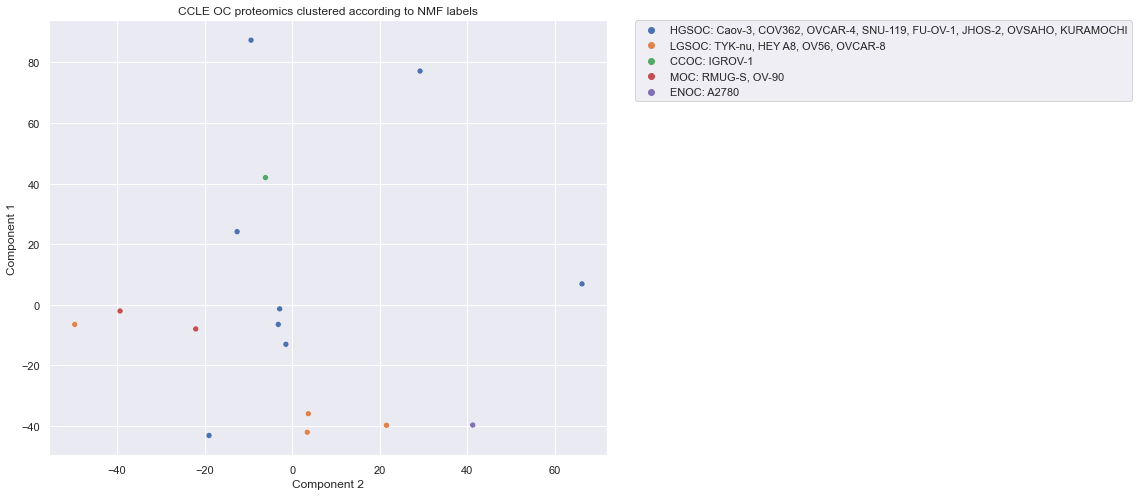

In [447]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = nmf_sequence, palette = palette)
plt.title('CCLE OC proteomics clustered according to NMF labels')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig('CCLE_OC_POMICS_NMF_clustered', dpi=1200, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)
plt.show()

In [448]:
x_axis

0     -1.418823
1     -2.843555
2      3.698868
3     -3.169785
4    -12.574363
5     66.259552
6     -6.093358
7      3.458951
8    -18.985071
9    -49.685685
10    -9.386475
11   -22.025878
12   -39.326297
13    41.281795
14    29.243893
15    21.566231
Name: Component 2, dtype: float64

In [452]:
nmf_labels['PC1'] = x_axis
nmf_labels_sorted = nmf_labels.sort_values('PC1')
nmf_labels_sorted

,cell_line,nmf_label,PC1
9,OV56,2,-49.685685
12,OV-90,1,-39.326297
11,RMUG-S,1,-22.025878
8,JHOS-2,4,-18.985071
4,SNU-119,4,-12.574363
10,OVSAHO,4,-9.386475
6,IGROV-1,3,-6.093358
3,OVCAR-4,4,-3.169785
1,COV362,4,-2.843555
0,Caov-3,4,-1.418823


# Reclustering and finding optimal k when same 16 cell lines as Pomics are included. 

## Elbow plot

In [500]:
data = pd.read_csv(r'/Users/katemeeson/Library/Mobile Documents/com~apple~CloudDocs/MRC-DTP PhD UoM/Datasets/Alternative datasets/CCLE transcriptomics/Tomics CCLE 16 cell lines.csv', index_col = [0])
N, D = data.shape
data = data.dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)
print('Samples: %s, Genes: %s'%(N, D))
data

Samples: 16, Genes: 16382


,TSPAN6 (7105),TNMD (64102),DPM1 (8813),SCYL3 (57147),C1orf112 (55732),FGR (2268),CFH (3075),FUCA2 (2519),GCLC (2729),NFYA (4800),...,OR8B8 (26493),ZNF772 (400720),ZNF257 (113835),PCNX3 (399909),ADAM32 (203102),ACSL5 (51703),LRRC8B (23507),ABCB8 (11194),H3C12 (8356),SND1 (27044)
OC Broad IDs used in transcriptomics,,,,,,,,,,,,,,,,,,,,,
OV56,2.776104,0.070389,6.323010,1.989139,2.541019,0.201634,1.735522,5.317594,5.486071,3.949535,...,0,0.992768,0.731183,4.312520,0.678072,0.855990,1.378512,2.839960,0.097611,7.186263
OV-90,4.830864,0.000000,5.873075,1.918386,2.963474,0.056584,3.980025,6.966361,5.540709,3.820690,...,0,1.819668,0.056584,4.552131,1.903038,0.847997,1.691534,4.882643,1.150560,7.150864
RMUG-S,5.150560,0.000000,5.842727,2.134221,4.031219,0.000000,1.608809,5.481880,6.417853,3.137504,...,0,3.280956,0.000000,5.213736,0.070389,0.298658,1.757023,3.819668,0.443607,5.766595
JHOS-2,6.512069,0.000000,6.384050,2.636915,4.448240,0.014355,3.392317,5.358256,3.382667,3.941106,...,0,2.885574,2.192194,4.272770,0.367371,3.184280,2.508429,3.307429,0.411426,5.223036
SNU-119,4.893848,0.000000,6.059399,2.223423,3.420887,0.042644,2.813525,7.176223,4.002703,5.774524,...,0,1.367371,2.438293,5.010780,1.778209,2.283922,1.687061,4.817623,0.782409,6.839582
OVSAHO,5.533563,0.000000,7.121948,2.295723,4.121015,0.014355,2.726831,5.361768,3.224966,4.782933,...,0,0.941106,2.304511,4.084064,0.641546,3.099295,2.538538,5.211791,0.226509,8.219749
IGROV-1,4.842476,0.000000,6.193969,2.046142,2.885574,0.056584,0.432959,6.395577,4.014355,4.774524,...,0,2.462052,0.097611,4.670161,0.807355,0.275007,2.780310,4.020591,2.435629,6.572890
OVCAR-4,4.947199,0.201634,6.754353,1.599318,3.694880,0.014355,0.632268,4.953265,3.763412,3.519793,...,0,1.182692,0.275007,4.351204,0.250962,2.080658,2.577731,4.665620,0.516015,6.790642
COV362,3.964399,0.042644,6.135248,1.867896,2.678072,0.000000,5.833902,4.969012,4.500165,4.392317,...,0,3.241840,1.887525,5.056150,0.310340,1.952334,2.137504,4.879216,0.378512,6.811471


In [455]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(data)
pca = PCA(n_components = 3)
pca.fit(segmentation_std)
scores_pca = pca.transform(segmentation_std)
pca.transform(segmentation_std)

array([[  2.61099315, -31.49293354, -20.46129583],
       [-22.23507833, 123.43468252, -38.02273396],
       [-24.98613364,  45.82369735, -56.74897317],
       [-43.76729212, -42.3330821 , -41.58214277],
       [-54.66421526, -23.74263421,  45.43365829],
       [-38.42223829,  -3.58169934,  41.10037729],
       [ 31.4373906 ,  25.43210428,  26.30416546],
       [-43.71781644,   4.61868043,  -2.79396195],
       [-13.51472744, -20.87027458, -10.87344169],
       [-32.80324621, -30.57211969,  -2.81312702],
       [ 51.00755677, -44.0545776 , -64.38613199],
       [ 72.88818156,  -3.35320155, -20.16926179],
       [ 46.79606065, -26.9858217 ,  -9.69701501],
       [-38.92012266,   0.18855599,  59.01812613],
       [ 85.12595684,  31.08197162,  66.70210071],
       [ 23.16473081,  -3.59334789,  28.98965731]])

Optimal number of clusters 5


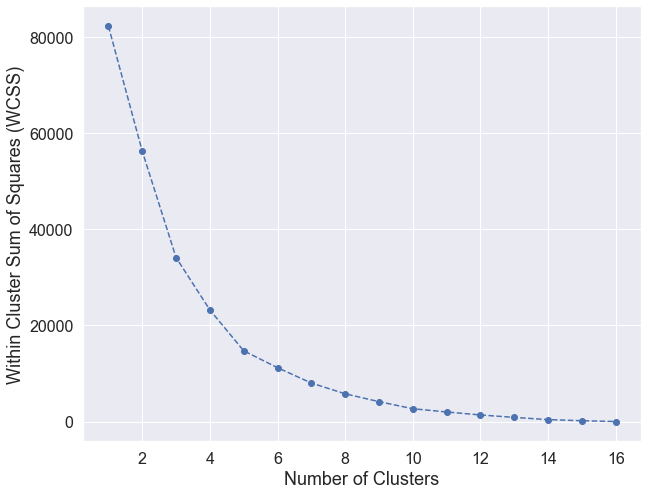

In [456]:
wcss = []
max_clusters = 17
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

n_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
print("Optimal number of clusters", n_clusters)

fig = plt.figure(figsize=(10,8))
plt.plot(range(1, 17), wcss, marker='o', linestyle='--')
# plt.vlines(n_clusters, ymin=0, ymax=max(wcss), linestyles='dashed')
plt.xlabel('Number of Clusters', fontsize=18)
plt.ylabel('Within Cluster Sum of Squares (WCSS)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

## Silhouette plot

In [457]:
column_names = ["cluster number", "silhouette score"]

df = pd.DataFrame(columns = column_names)
df

,cluster number,silhouette score


In [458]:
X_data = pca.transform(segmentation_std)
X_data

array([[  2.61099315, -31.49293354, -20.46129583],
       [-22.23507833, 123.43468252, -38.02273396],
       [-24.98613364,  45.82369735, -56.74897317],
       [-43.76729212, -42.3330821 , -41.58214277],
       [-54.66421526, -23.74263421,  45.43365829],
       [-38.42223829,  -3.58169934,  41.10037729],
       [ 31.4373906 ,  25.43210428,  26.30416546],
       [-43.71781644,   4.61868043,  -2.79396195],
       [-13.51472744, -20.87027458, -10.87344169],
       [-32.80324621, -30.57211969,  -2.81312702],
       [ 51.00755677, -44.0545776 , -64.38613199],
       [ 72.88818156,  -3.35320155, -20.16926179],
       [ 46.79606065, -26.9858217 ,  -9.69701501],
       [-38.92012266,   0.18855599,  59.01812613],
       [ 85.12595684,  31.08197162,  66.70210071],
       [ 23.16473081,  -3.59334789,  28.98965731]])

For n_clusters = 2 The average silhouette_score is : 0.2779640811183789


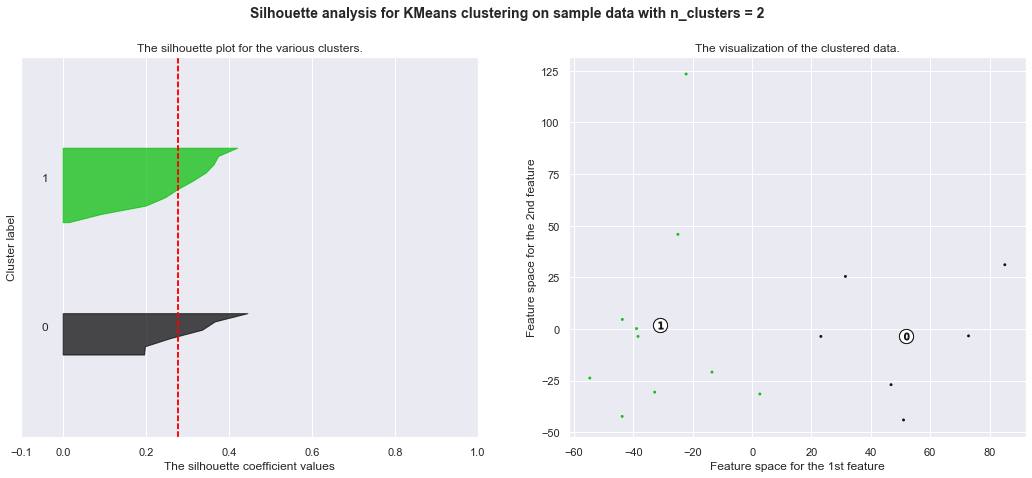

For n_clusters = 3 The average silhouette_score is : 0.3528354010062067


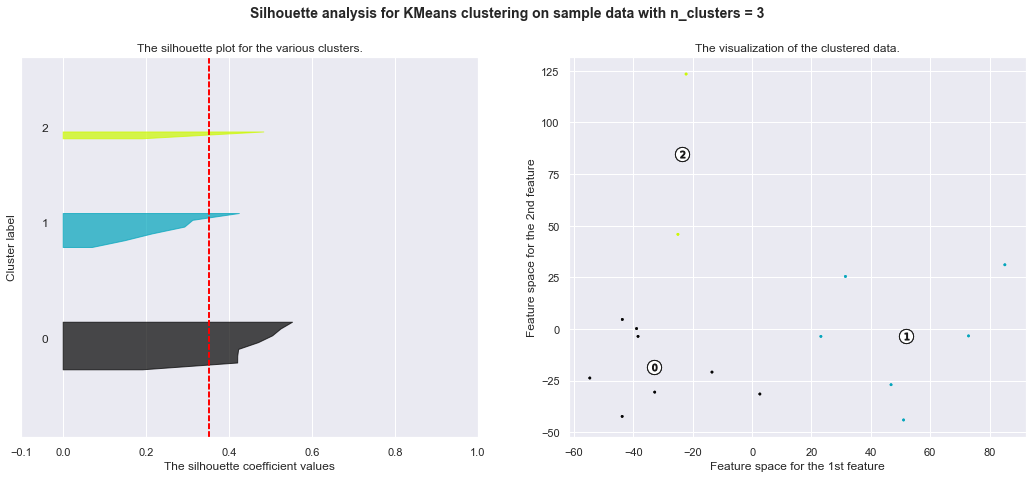

For n_clusters = 4 The average silhouette_score is : 0.3612423285940495


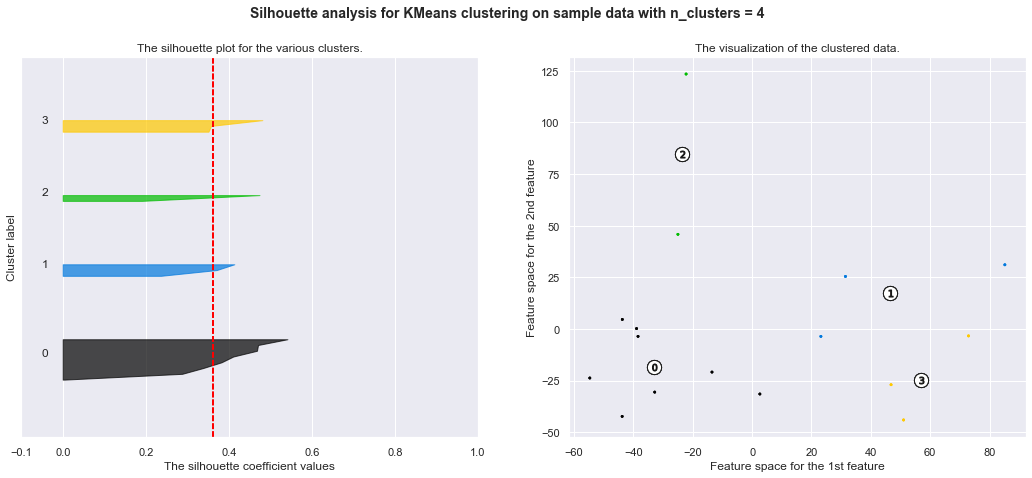

For n_clusters = 5 The average silhouette_score is : 0.39686728306332275


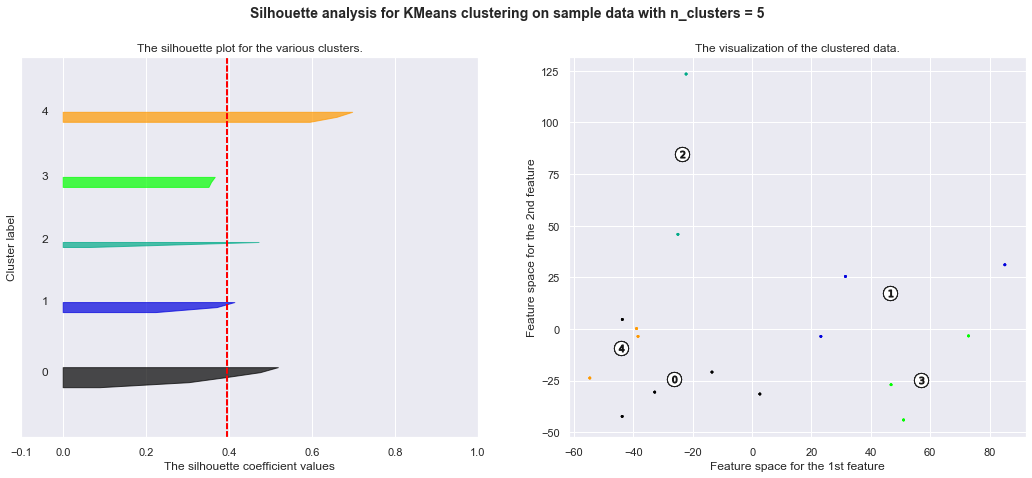

For n_clusters = 6 The average silhouette_score is : 0.38284501475167654


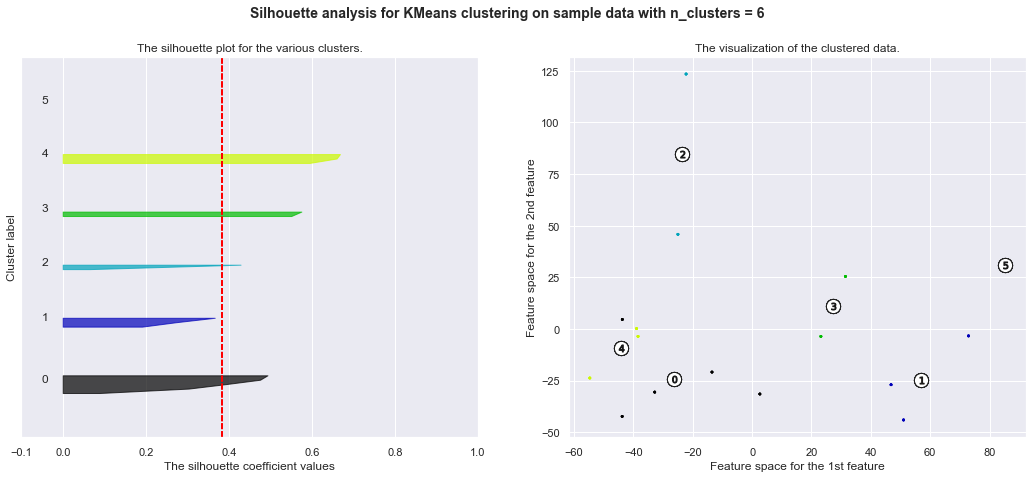

For n_clusters = 7 The average silhouette_score is : 0.35006307489169414


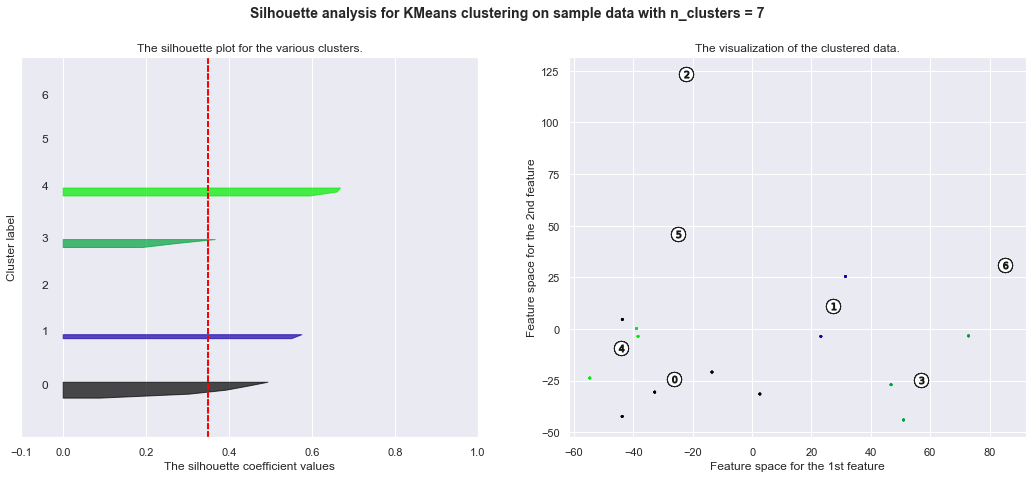

For n_clusters = 8 The average silhouette_score is : 0.3409679814914563


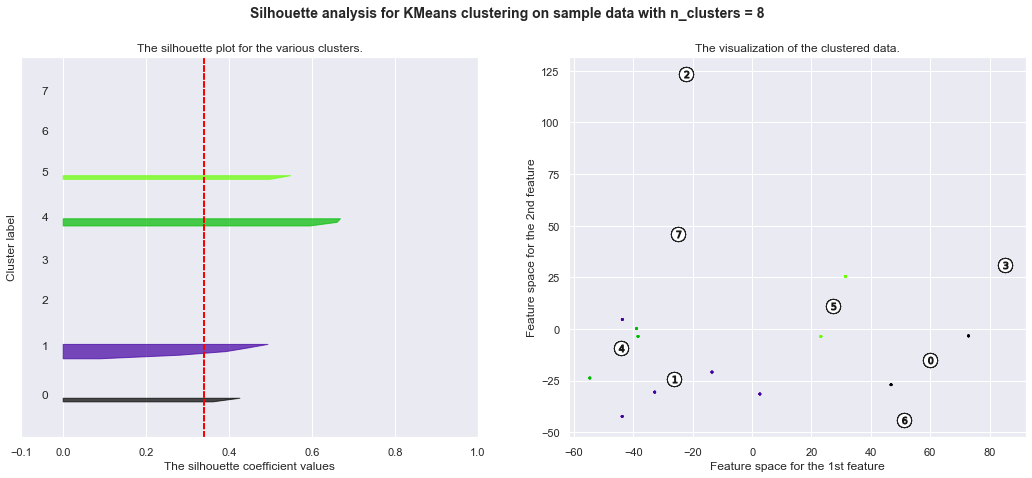

For n_clusters = 9 The average silhouette_score is : 0.29282968984782054


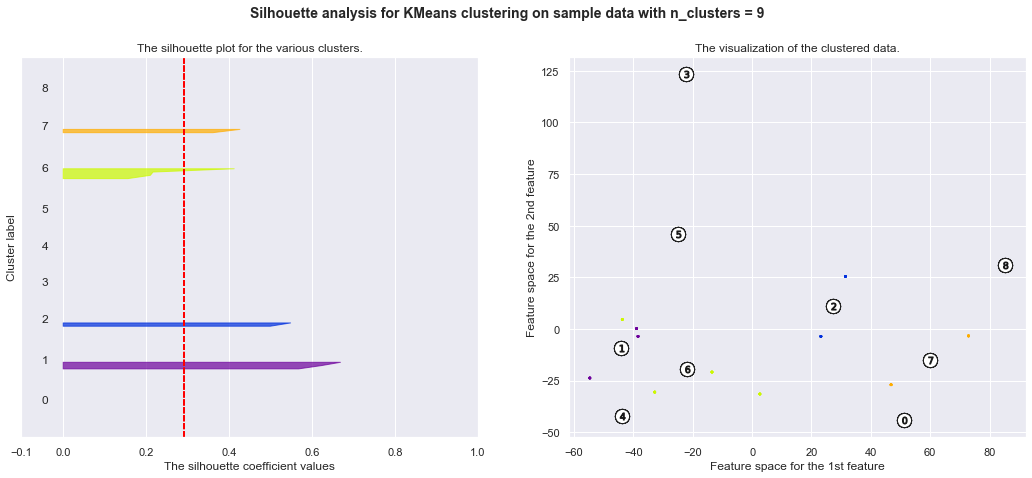

For n_clusters = 10 The average silhouette_score is : 0.2773386597301352


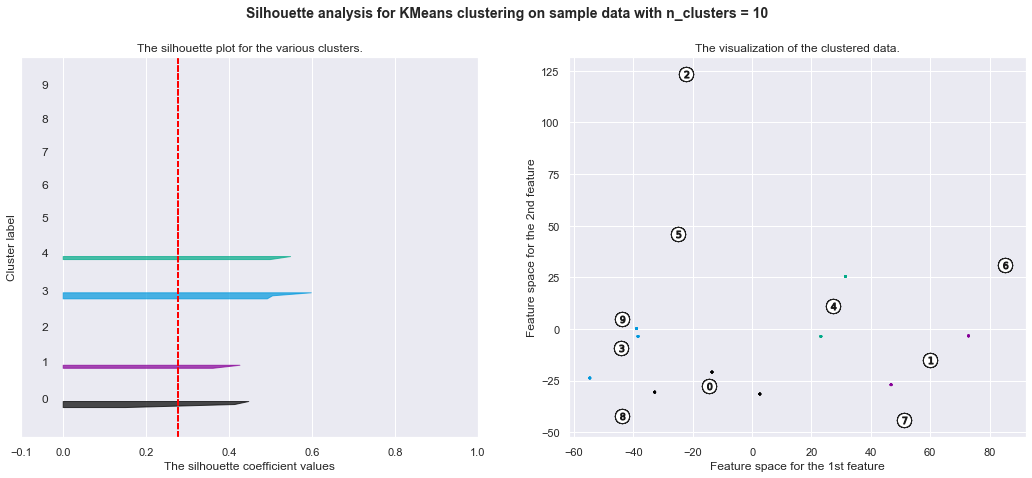

For n_clusters = 11 The average silhouette_score is : 0.21656124055855658


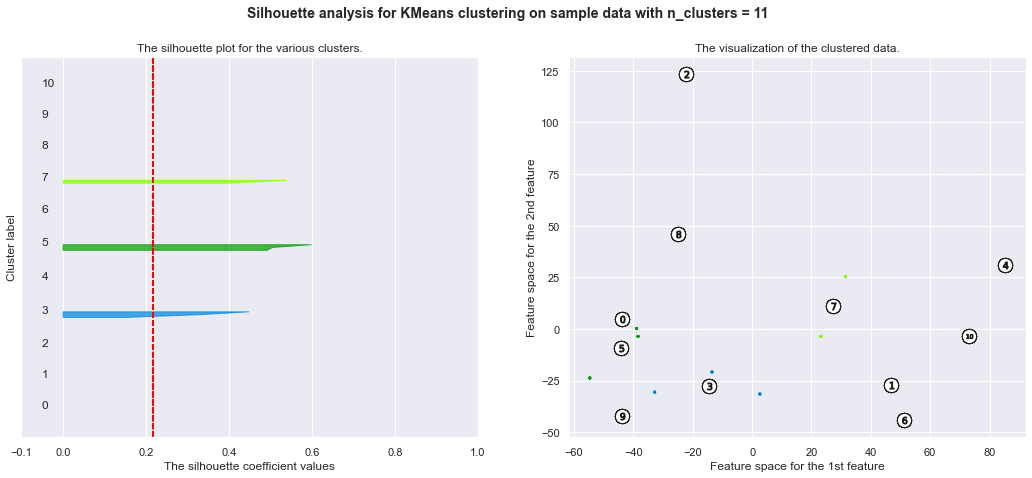

For n_clusters = 12 The average silhouette_score is : 0.18888473878590867


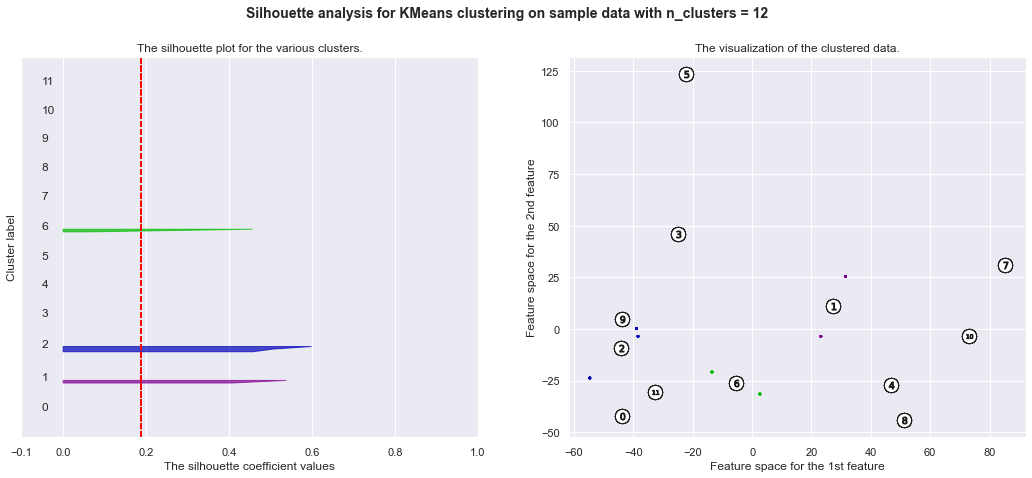

For n_clusters = 13 The average silhouette_score is : 0.13669346644280533


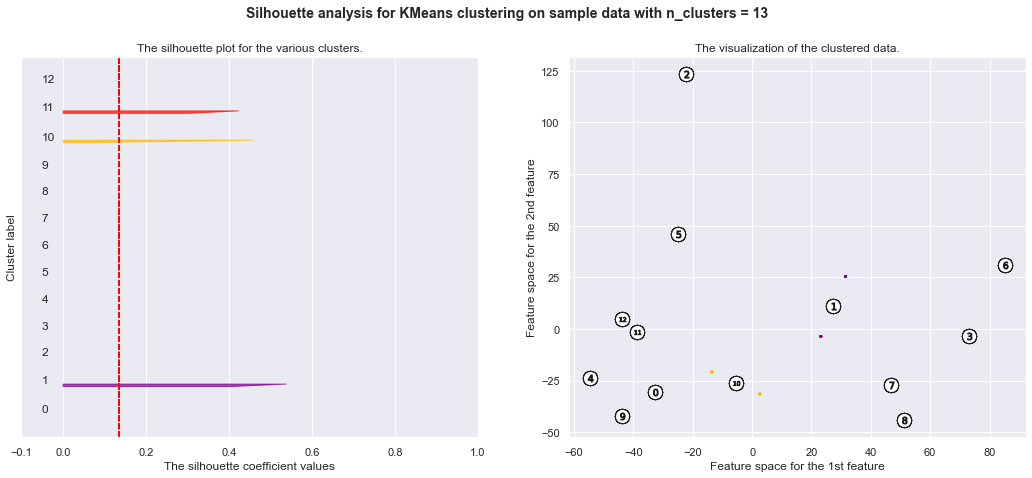

In [459]:
n_cluster_list = []
s_score_list = []

range_of_clusters = [2,3,4,5,6,7,8,9,10,11,12,13]

for n_clusters in range_of_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_data) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_data)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
    silhouette_avg = silhouette_score(X_data, cluster_labels)
    print("For n_clusters =",n_clusters,"The average silhouette_score is :",silhouette_avg,)

    n_cluster_list.append(n_clusters)
    s_score_list.append(silhouette_avg)

        # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7,)

            # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X_data[:, 0], X_data[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
        plt.suptitle("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"% n_clusters,fontsize=14,fontweight="bold",)

    plt.show()

In [460]:
df['cluster number'] = n_cluster_list
df['silhouette score'] = s_score_list
df = df.set_index('cluster number')
df

,silhouette score
cluster number,
2,0.277964
3,0.352835
4,0.361242
5,0.396867
6,0.382845
7,0.350063
8,0.340968
9,0.292830
10,0.277339


In [461]:
print(n_cluster_list)
print(s_score_list)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[0.2779640811183789, 0.3528354010062067, 0.3612423285940495, 0.39686728306332275, 0.38284501475167654, 0.35006307489169414, 0.3409679814914563, 0.29282968984782054, 0.2773386597301352, 0.21656124055855658, 0.18888473878590867, 0.13669346644280533]


Text(0.5, 1.0, 'Accuracy of K-means clusters Pomics')

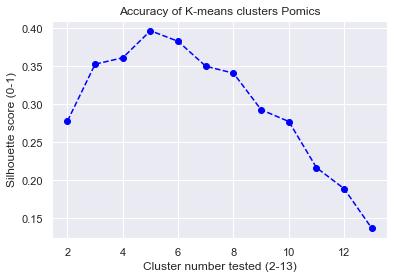

In [462]:
plt.plot(n_cluster_list, s_score_list, linestyle='--', marker='o', color='blue')
plt.xlabel('Cluster number tested (2-13)')
plt.ylabel('Silhouette score (0-1)')
plt.title('Accuracy of K-means clusters Pomics')

## Gap statistic

In [463]:
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
# Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
# For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
# Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
# Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
# Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)
    score_g, df = optimalK(cluster_df, nrefs=5, maxClusters=30)
    plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
    plt.xlabel('K');
    plt.ylabel('Gap Statistic');
    plt.title('Gap Statistic vs. K');

In [468]:
column_names = ["cluster number"]
df = pd.DataFrame(columns = column_names)
max_clusters = 14
df['cluster number'] = range(3,max_clusters)
df

,cluster number
0,3
1,4
2,5
3,6
4,7
5,8
6,9
7,10
8,11
9,12


In [467]:
def gap_resids(number_of_iterations, max_clusters):
    column_names = ["cluster number"]
    df = pd.DataFrame(columns = column_names)
    df['cluster number'] = range(0,max_clusters)
    
    for n in number_of_iterations:
        run = optimalK(data, nrefs=5, maxClusters=max_clusters)
        run_df = run[1]

        clusterCount = []
        for count in run_df['clusterCount']:
            clusterCount.append(count)

        gap = []
        for g in run_df['gap']:
            gap.append(g)
            
        run_df_2 = run_df[3:14]
        clusterCount_2 = clusterCount[3:14]
        gap_2 = gap[3:14]
    
        gap_stat_model = ols('gap_2 ~ clusterCount_2', data=run_df_2).fit()
        resids = gap_stat_model.resid
        column_name = 'iteration_' + str(n)
        df[column_name] = resids
    return(df)

In [469]:
df = gap_resids(range(10),17)
df

<ipython-input-463-89b0f9b09989>:33: RuntimeWarning: divide by zero encountered in log
  gap = np.log(np.mean(refDisps)) - np.log(origDisp)
<ipython-input-463-89b0f9b09989>:33: RuntimeWarning: invalid value encountered in double_scalars
  gap = np.log(np.mean(refDisps)) - np.log(origDisp)
<ipython-input-463-89b0f9b09989>:33: RuntimeWarning: divide by zero encountered in log
  gap = np.log(np.mean(refDisps)) - np.log(origDisp)
<ipython-input-463-89b0f9b09989>:33: RuntimeWarning: invalid value encountered in double_scalars
  gap = np.log(np.mean(refDisps)) - np.log(origDisp)
<ipython-input-463-89b0f9b09989>:33: RuntimeWarning: divide by zero encountered in log
  gap = np.log(np.mean(refDisps)) - np.log(origDisp)
<ipython-input-463-89b0f9b09989>:33: RuntimeWarning: invalid value encountered in double_scalars
  gap = np.log(np.mean(refDisps)) - np.log(origDisp)
<ipython-input-463-89b0f9b09989>:33: RuntimeWarning: divide by zero encountered in log
  gap = np.log(np.mean(refDisps)) - np.log(

,cluster number,iteration_0,iteration_1,iteration_2,iteration_3,iteration_4,iteration_5,iteration_6,iteration_7,iteration_8,iteration_9
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,-0.028104,-0.019411,-0.026516,-0.020492,-0.010323,-0.030378,-0.018750,-0.018580,-0.015382,-0.017688
4,4,0.001196,-0.003430,-0.003789,-0.016456,0.000310,-0.005643,-0.014340,-0.011870,-0.004855,-0.005084
5,5,-0.000302,-0.010205,-0.010092,-0.007692,-0.022393,-0.003564,-0.001350,-0.001777,-0.004936,-0.006651
6,6,-0.008129,0.006226,0.007034,0.009120,0.003117,-0.001549,-0.006888,-0.001564,-0.029053,0.004978
7,7,0.014400,-0.000051,0.015378,0.012911,0.013900,0.021552,0.018909,0.011507,0.020295,-0.004914
8,8,0.022623,0.025668,0.024189,0.031741,0.008874,0.030710,0.032126,0.026059,0.038875,0.025280
9,9,0.030258,0.034832,0.031911,0.029960,0.031296,0.027805,0.029768,0.031522,0.033001,0.032275


In [470]:
df_2 = df.iloc[3:14, :]
df_2

,cluster number,iteration_0,iteration_1,iteration_2,iteration_3,iteration_4,iteration_5,iteration_6,iteration_7,iteration_8,iteration_9
3,3,-0.028104,-0.019411,-0.026516,-0.020492,-0.010323,-0.030378,-0.018750,-0.018580,-0.015382,-0.017688
4,4,0.001196,-0.003430,-0.003789,-0.016456,0.000310,-0.005643,-0.014340,-0.011870,-0.004855,-0.005084
5,5,-0.000302,-0.010205,-0.010092,-0.007692,-0.022393,-0.003564,-0.001350,-0.001777,-0.004936,-0.006651
6,6,-0.008129,0.006226,0.007034,0.009120,0.003117,-0.001549,-0.006888,-0.001564,-0.029053,0.004978
7,7,0.014400,-0.000051,0.015378,0.012911,0.013900,0.021552,0.018909,0.011507,0.020295,-0.004914
8,8,0.022623,0.025668,0.024189,0.031741,0.008874,0.030710,0.032126,0.026059,0.038875,0.025280
9,9,0.030258,0.034832,0.031911,0.029960,0.031296,0.027805,0.029768,0.031522,0.033001,0.032275
10,10,0.012730,0.005741,0.013909,0.012449,0.009646,0.009927,0.006250,0.007871,0.008927,0.016623
11,11,-0.004558,-0.002838,-0.013904,-0.008528,-0.005772,-0.005430,-0.009254,-0.006991,-0.007380,-0.004655
12,12,-0.020025,-0.015875,-0.024011,-0.025579,-0.012582,-0.019077,-0.017815,-0.017263,-0.019794,-0.025577


In [471]:
sums = []
for n in range(11):
    sum_of_iteration = sum(df_2.iloc[n,1:11])
    sums.append(sum_of_iteration)
    
sums

[-0.2056235575365588,
 -0.06396174959413825,
 -0.06896214349927421,
 -0.01670876043450087,
 0.12388588715759408,
 0.26614448161867643,
 0.3126285661425614,
 0.10407263963305313,
 -0.06931076519500778,
 -0.19759859137006797,
 -0.184566006922394]

In [472]:
df_2['sums'] = sums
df_2

<ipython-input-472-455ec691647b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['sums'] = sums


,cluster number,iteration_0,iteration_1,iteration_2,iteration_3,iteration_4,iteration_5,iteration_6,iteration_7,iteration_8,iteration_9,sums
3,3,-0.028104,-0.019411,-0.026516,-0.020492,-0.010323,-0.030378,-0.018750,-0.018580,-0.015382,-0.017688,-0.205624
4,4,0.001196,-0.003430,-0.003789,-0.016456,0.000310,-0.005643,-0.014340,-0.011870,-0.004855,-0.005084,-0.063962
5,5,-0.000302,-0.010205,-0.010092,-0.007692,-0.022393,-0.003564,-0.001350,-0.001777,-0.004936,-0.006651,-0.068962
6,6,-0.008129,0.006226,0.007034,0.009120,0.003117,-0.001549,-0.006888,-0.001564,-0.029053,0.004978,-0.016709
7,7,0.014400,-0.000051,0.015378,0.012911,0.013900,0.021552,0.018909,0.011507,0.020295,-0.004914,0.123886
8,8,0.022623,0.025668,0.024189,0.031741,0.008874,0.030710,0.032126,0.026059,0.038875,0.025280,0.266144
9,9,0.030258,0.034832,0.031911,0.029960,0.031296,0.027805,0.029768,0.031522,0.033001,0.032275,0.312629
10,10,0.012730,0.005741,0.013909,0.012449,0.009646,0.009927,0.006250,0.007871,0.008927,0.016623,0.104073
11,11,-0.004558,-0.002838,-0.013904,-0.008528,-0.005772,-0.005430,-0.009254,-0.006991,-0.007380,-0.004655,-0.069311
12,12,-0.020025,-0.015875,-0.024011,-0.025579,-0.012582,-0.019077,-0.017815,-0.017263,-0.019794,-0.025577,-0.197599


Text(0, 0.5, 'Residual for Gap statistic across iterations')

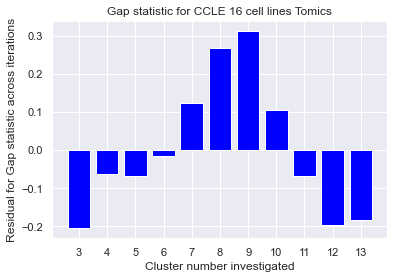

In [473]:
sum_of_gap_resids = df_2['sums']
clusters_investigated = []
for n in range(3,14):
    clusters_investigated.append(n)
clusters_investigated = tuple(clusters_investigated)
x_pos = np.arange(len(clusters_investigated))
gap_plot = plt.bar(x_pos, sum_of_gap_resids, color = 'blue')
plt.xticks(x_pos, clusters_investigated)
plt.title('Gap statistic for CCLE 16 cell lines Tomics')
plt.xlabel('Cluster number investigated')
plt.ylabel('Residual for Gap statistic across iterations')

## DB plot 

In [475]:
column_names = ["cluster number", "DB score"]

df_db = pd.DataFrame(columns = column_names)
df_db['cluster number'] = range(2,12)
df_db

,cluster number,DB score
0,2,NaN
1,3,NaN
2,4,NaN
3,5,NaN
4,6,NaN
5,7,NaN
6,8,NaN
7,9,NaN
8,10,NaN
9,11,NaN


In [476]:
column_names = ["cluster number"]

df_db_it = pd.DataFrame(columns = column_names)
df_db_it['cluster number'] = range(2,12)
df_db_it

,cluster number
0,2
1,3
2,4
3,5
4,6
5,7
6,8
7,9
8,10
9,11


In [477]:
from sklearn.metrics import davies_bouldin_score

def get_kmeans_score(data, center):
    kmeans = KMeans(n_clusters=center)
    model = kmeans.fit_predict(data)
    score = davies_bouldin_score(data, model)
    return(score)

In [478]:
def resid_regression_db_score(number_of_iterations):
    for n in number_of_iterations:
        scores = []
        centers = []
        for num in range(2,12):
            centers.append(num)
        for center in centers:
            scores.append(get_kmeans_score(data, center))
        
        df_db['cluster number'] = centers
        df_db['DB score'] = scores
        
        model = ols('scores ~ centers', data=df_db).fit()
        
        gap_stat_model = ols('scores ~ centers', data=df_db).fit()
        resids = gap_stat_model.resid
        column_name = 'iteration_' + str(n)
        df_db_it[column_name] = resids
        
    return(df_db_it)

In [479]:
resid_regression_db_score(range(50))

,cluster number,iteration_0,iteration_1,iteration_2,iteration_3,iteration_4,iteration_5,iteration_6,iteration_7,iteration_8,...,iteration_40,iteration_41,iteration_42,iteration_43,iteration_44,iteration_45,iteration_46,iteration_47,iteration_48,iteration_49
0,2,0.094674,0.305613,0.413452,0.155926,0.077431,0.474830,0.110977,0.331249,0.239246,...,0.245860,0.383947,0.025072,0.162690,0.043755,0.059044,0.134362,0.516110,0.331676,-0.011983
1,3,0.179112,-0.090803,-0.112542,0.260082,0.202003,-0.032650,0.033702,-0.036946,0.050291,...,0.236247,-0.171931,0.155770,0.261680,0.305674,0.136307,-0.057842,0.155447,0.035095,0.069156
2,4,-0.163575,-0.015463,-0.166119,-0.048089,0.058583,-0.471160,-0.032729,-0.001859,-0.180716,...,-0.138520,0.094955,0.070089,-0.117332,-0.198825,0.093528,0.010081,-0.601056,-0.256967,0.193196
3,5,-0.080153,-0.086093,-0.051686,-0.422291,-0.255277,-0.093269,0.044429,-0.095503,-0.037459,...,-0.074103,-0.161219,-0.153405,-0.119583,-0.121850,-0.279221,-0.056170,-0.088653,-0.055594,-0.016263
4,6,-0.055691,-0.245585,-0.106897,-0.042151,-0.049572,-0.009768,-0.139989,-0.311894,-0.117450,...,-0.306403,-0.231065,-0.036605,-0.177993,-0.035047,-0.077594,0.013544,-0.208707,-0.034323,-0.147610
5,7,-0.109746,-0.038733,-0.241619,-0.114452,-0.253007,-0.015240,-0.133440,-0.127986,-0.105636,...,-0.276483,-0.157970,-0.138594,-0.268030,-0.061782,-0.029056,-0.137026,-0.077421,-0.173308,-0.151402
6,8,0.002219,-0.041814,0.002741,-0.027533,-0.016960,-0.031325,-0.040621,-0.039495,-0.000423,...,-0.096248,-0.047491,-0.102680,-0.092040,-0.094537,-0.040191,-0.013496,0.027396,-0.110953,-0.116496
7,9,0.000988,0.016708,0.036516,0.036123,0.017317,-0.020426,0.011261,-0.012697,-0.053330,...,0.047903,0.024714,-0.039018,0.047866,-0.032633,-0.014036,0.004555,0.003987,-0.022716,-0.034120
8,10,0.049786,0.075601,0.071928,0.065290,0.084816,0.090091,0.027161,0.115648,0.051950,...,0.142433,0.102807,0.081472,0.123645,0.054923,0.051610,0.031692,0.113798,0.109629,0.061186
9,11,0.082386,0.120571,0.154227,0.137094,0.134667,0.108917,0.119248,0.179483,0.153528,...,0.219315,0.163253,0.137899,0.179096,0.140322,0.099609,0.070300,0.159098,0.177462,0.154335


In [481]:
sums_db = []
for n in range(0,10):
    sum_of_iteration_db = sum(df_db_it.iloc[n,1:51])
    sums_db.append(sum_of_iteration_db)
    
sums_db

[12.647576391097317,
 3.434003951837386,
 -6.307350108663034,
 -6.283043128853597,
 -6.141324645510231,
 -6.226973865878312,
 -2.8224793543386593,
 0.1465235887348637,
 4.338399975798976,
 7.214667195775297]

In [482]:
df_db_it['sums'] = sums_db
df_db_it

,cluster number,iteration_0,iteration_1,iteration_2,iteration_3,iteration_4,iteration_5,iteration_6,iteration_7,iteration_8,...,iteration_41,iteration_42,iteration_43,iteration_44,iteration_45,iteration_46,iteration_47,iteration_48,iteration_49,sums
0,2,0.094674,0.305613,0.413452,0.155926,0.077431,0.474830,0.110977,0.331249,0.239246,...,0.383947,0.025072,0.162690,0.043755,0.059044,0.134362,0.516110,0.331676,-0.011983,12.647576
1,3,0.179112,-0.090803,-0.112542,0.260082,0.202003,-0.032650,0.033702,-0.036946,0.050291,...,-0.171931,0.155770,0.261680,0.305674,0.136307,-0.057842,0.155447,0.035095,0.069156,3.434004
2,4,-0.163575,-0.015463,-0.166119,-0.048089,0.058583,-0.471160,-0.032729,-0.001859,-0.180716,...,0.094955,0.070089,-0.117332,-0.198825,0.093528,0.010081,-0.601056,-0.256967,0.193196,-6.307350
3,5,-0.080153,-0.086093,-0.051686,-0.422291,-0.255277,-0.093269,0.044429,-0.095503,-0.037459,...,-0.161219,-0.153405,-0.119583,-0.121850,-0.279221,-0.056170,-0.088653,-0.055594,-0.016263,-6.283043
4,6,-0.055691,-0.245585,-0.106897,-0.042151,-0.049572,-0.009768,-0.139989,-0.311894,-0.117450,...,-0.231065,-0.036605,-0.177993,-0.035047,-0.077594,0.013544,-0.208707,-0.034323,-0.147610,-6.141325
5,7,-0.109746,-0.038733,-0.241619,-0.114452,-0.253007,-0.015240,-0.133440,-0.127986,-0.105636,...,-0.157970,-0.138594,-0.268030,-0.061782,-0.029056,-0.137026,-0.077421,-0.173308,-0.151402,-6.226974
6,8,0.002219,-0.041814,0.002741,-0.027533,-0.016960,-0.031325,-0.040621,-0.039495,-0.000423,...,-0.047491,-0.102680,-0.092040,-0.094537,-0.040191,-0.013496,0.027396,-0.110953,-0.116496,-2.822479
7,9,0.000988,0.016708,0.036516,0.036123,0.017317,-0.020426,0.011261,-0.012697,-0.053330,...,0.024714,-0.039018,0.047866,-0.032633,-0.014036,0.004555,0.003987,-0.022716,-0.034120,0.146524
8,10,0.049786,0.075601,0.071928,0.065290,0.084816,0.090091,0.027161,0.115648,0.051950,...,0.102807,0.081472,0.123645,0.054923,0.051610,0.031692,0.113798,0.109629,0.061186,4.338400
9,11,0.082386,0.120571,0.154227,0.137094,0.134667,0.108917,0.119248,0.179483,0.153528,...,0.163253,0.137899,0.179096,0.140322,0.099609,0.070300,0.159098,0.177462,0.154335,7.214667


<BarContainer object of 10 artists>

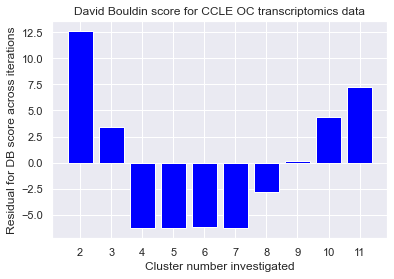

In [483]:
sum_of_db_resids = df_db_it['sums']
clusters_investigated_db = []
for n in range(2,12):
    clusters_investigated_db.append(n)
clusters_investigated_db = tuple(clusters_investigated_db)
x_pos_db = np.arange(len(clusters_investigated_db))
db_plot = plt.bar(x_pos_db, sum_of_db_resids, color = 'blue')
plt.xticks(x_pos_db, clusters_investigated_db)
plt.title('David Bouldin score for CCLE OC transcriptomics data')
plt.xlabel('Cluster number investigated')
plt.ylabel('Residual for DB score across iterations')
db_plot

In [484]:
import statistics
potential_optimal_16Tomics_clusters = [5, 5, 6, 4, 3, 9, 8, 7, 10, 4, 5, 7, 6]
statistics.mode(potential_optimal_16Tomics_clusters)

5

# K-means for transcriptomics 16 cell lines k = 5

In [501]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(data)
pca = PCA(n_components = 3)
pca.fit(segmentation_std)
scores_pca = pca.transform(segmentation_std)
pca.transform(segmentation_std)

array([[  2.71256922, -31.60972949, -20.25774602],
       [-22.2872036 , 123.45118506, -37.9237708 ],
       [-25.04796048,  45.74774934, -57.23165328],
       [-43.83233654, -41.82841279, -41.25192616],
       [-54.7027027 , -23.89896094,  45.01520296],
       [-38.47882764,  -3.61174913,  40.77676274],
       [ 31.53040924,  25.04456098,  26.56144893],
       [-43.30210979,   4.92231881,  -2.13643796],
       [-13.8874155 , -21.16778653, -10.90980197],
       [-32.77647533, -30.89032302,  -2.9191977 ],
       [ 51.42687536, -44.33296837, -64.61872916],
       [ 72.59526   ,  -3.07320729, -20.25421718],
       [ 46.64796582, -26.66668686,  -9.50557726],
       [-38.91020645,   0.30479075,  59.09800458],
       [ 85.24455645,  31.23723564,  66.81697906],
       [ 23.06760195,  -3.62801616,  28.74065926]])

In [502]:
wcss = []
max_clusters = 17
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
    
optimal_cluster_number = 5
kmeans_pca = KMeans(n_clusters = optimal_cluster_number, init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)
labels = kmeans_pca.predict(scores_pca)

In [503]:
kmeans_pca = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)
data['Cluster'] = kmeans_pca.labels_
data['Cluster']

OC Broad IDs used in transcriptomics 
OV56         0
OV-90        2
RMUG-S       2
JHOS-2       0
SNU-119      4
OVSAHO       4
IGROV-1      3
OVCAR-4      0
COV362       0
Caov-3       0
HEY A8       1
TYK-nu       1
OVCAR-8      1
KURAMOCHI    4
A2780        3
FU-OV-1      3
Name: Cluster, dtype: int32

In [493]:
data['Cluster'] = data['Cluster'].map({0:'SNU-119, OVSAHO, KURAMOCHI', 1:'OV-90, RMUG-S', 2:'HEY A8,  TYK-nu, OVCAR-8', 3:'IGROV-1, A2780, FU-OV-1', 4:'OV56, JHOS-2, OVCAR-4, COV362, Caov-3'})

In [494]:
df_segm_pca_kmeans = pd.concat([data.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3:]=['Component 1', 'Component 2', 'Component 3']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans.head()

,TSPAN6 (7105),TNMD (64102),DPM1 (8813),SCYL3 (57147),C1orf112 (55732),FGR (2268),CFH (3075),FUCA2 (2519),GCLC (2729),NFYA (4800),...,ACSL5 (51703),LRRC8B (23507),ABCB8 (11194),H3C12 (8356),SND1 (27044),Cluster,Component 1,Component 2,Component 3,Segment K-means PCA
0,2.776104,0.070389,6.323010,1.989139,2.541019,0.201634,1.735522,5.317594,5.486071,3.949535,...,0.855990,1.378512,2.839960,0.097611,7.186263,"OV56, JHOS-2, OVCAR-4, COV362, Caov-3",2.742176,-31.802816,-20.632000,4
1,4.830864,0.000000,5.873075,1.918386,2.963474,0.056584,3.980025,6.966361,5.540709,3.820690,...,0.847997,1.691534,4.882643,1.150560,7.150864,"OV-90, RMUG-S",-22.265054,123.419823,-37.957018,1
2,5.150560,0.000000,5.842727,2.134221,4.031219,0.000000,1.608809,5.481880,6.417853,3.137504,...,0.298658,1.757023,3.819668,0.443607,5.766595,"OV-90, RMUG-S",-24.929941,45.868711,-56.998639,1
3,6.512069,0.000000,6.384050,2.636915,4.448240,0.014355,3.392317,5.358256,3.382667,3.941106,...,3.184280,2.508429,3.307429,0.411426,5.223036,"OV56, JHOS-2, OVCAR-4, COV362, Caov-3",-44.112349,-41.873706,-41.181913,4
4,4.893848,0.000000,6.059399,2.223423,3.420887,0.042644,2.813525,7.176223,4.002703,5.774524,...,2.283922,1.687061,4.817623,0.782409,6.839582,"SNU-119, OVSAHO, KURAMOCHI",-54.561848,-23.800480,45.166639,0


In [495]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'SNU-119, OVSAHO, KURAMOCHI', 1:'OV-90, RMUG-S', 2:'HEY A8,  TYK-nu, OVCAR-8', 3:'IGROV-1, A2780, FU-OV-1', 4:'OV56, JHOS-2, OVCAR-4, COV362, Caov-3'})

/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-496-19dee32cf6c5>:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('CCLE_OC_TOMICS_16CellLines_K=5', dpi=1200, facecolor='w', edgecolor='w',
<ipython-input-496-19dee32cf6c5>:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('CCLE_OC_TOMICS_16CellLines_K=5', dpi=1200, facecolor='w', edgecolor='w',


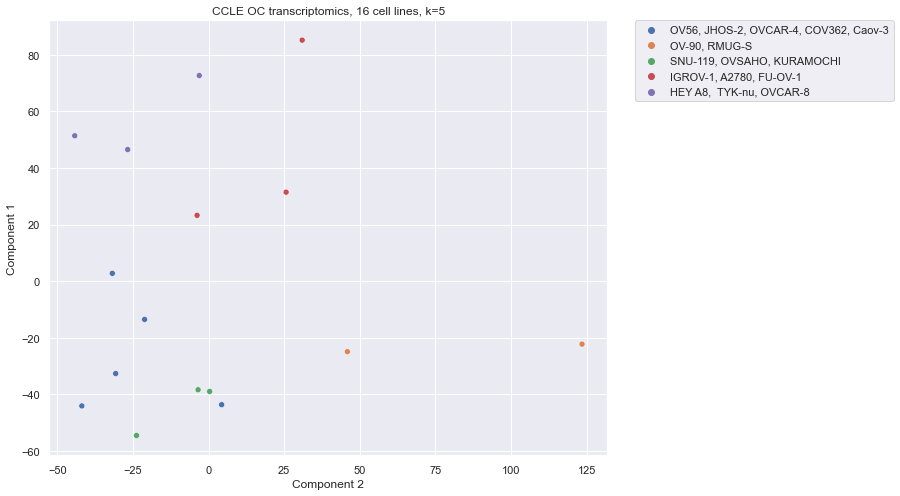

In [496]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment'], palette = palette)
plt.title('CCLE OC transcriptomics, 16 cell lines, k=5')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig('CCLE_OC_TOMICS_16CellLines_K=5', dpi=1200, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)
plt.show()

In [497]:
column_names = ['Cell line', 'label']
df = df = pd.DataFrame(columns = column_names)
df

,Cell line,label


In [504]:
labels_for_df = []
for label in data['Cluster']:
    labels_for_df.append(label)
    
labels_for_df

[0, 2, 2, 0, 4, 4, 3, 0, 0, 0, 1, 1, 1, 4, 3, 3]

In [508]:
cell_lines = ['OV56', 'OV-90', 'RMUG-S', 'JHOS-2', 'SNU-119', 'OVSAHO', 'IGROV-1', 'OVCAR-4', 'COV362', 'Caov-3', 'HEY A8', 'TYK-nu', 'OVCAR-8', 'KURAMOCHI', 'A2780', 'FU-OV-1']
df['Cell line'] = cell_lines
df['label'] = labels_for_df
df['x_axis'] = x_axis
df = df.sort_values('x_axis')
df

,Cell line,label,x_axis
10,HEY A8,1,-44.219809
3,JHOS-2,0,-41.873706
0,OV56,0,-31.802816
9,Caov-3,0,-30.685935
12,OVCAR-8,1,-26.721828
4,SNU-119,4,-23.800480
8,COV362,0,-21.130596
15,FU-OV-1,3,-3.793893
5,OVSAHO,4,-3.454591
11,TYK-nu,1,-3.074247


# ARI for proteomics and transcriptomics, 16 cell lines. 

In [511]:
#transcriptomics labels
data = pd.read_csv(r'/Users/katemeeson/Library/Mobile Documents/com~apple~CloudDocs/MRC-DTP PhD UoM/Datasets/Alternative datasets/CCLE transcriptomics/Tomics CCLE 16 cell lines.csv', index_col = [0])
N, D = data.shape
data = data.dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)

optimal_cluster_number = 5

scaler = StandardScaler()
segmentation_std = scaler.fit_transform(data)
pca = PCA(n_components = 3)
pca.fit(segmentation_std)
scores_pca = pca.transform(segmentation_std)
pca.transform(segmentation_std)
kmeans_pca = KMeans(n_clusters = optimal_cluster_number, init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)
labels = kmeans_pca.predict(scores_pca)

tomics_labels = labels 
tomics_labels

array([4, 1, 1, 4, 0, 0, 3, 4, 4, 4, 2, 2, 2, 0, 3, 3], dtype=int32)

In [513]:
#proteomics labels
data = pd.read_csv(r'/Users/katemeeson/Library/Mobile Documents/com~apple~CloudDocs/MRC-DTP PhD UoM/Datasets/Alternative datasets/CCLE proteomics/Normalised OC cell lines only.csv', index_col = [0])
data = data.transpose()
N, D = data.shape
data = data.dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)
data_1 = data.iloc[0:9,:]
data_2 = data.iloc[10:17,:]
data = data_1.append(data_2)

scaler = StandardScaler()
segmentation_std = scaler.fit_transform(data)
pca = PCA(n_components = 3)
pca.fit(segmentation_std)
scores_pca = pca.transform(segmentation_std)
pca.transform(segmentation_std)
kmeans_pca = KMeans(n_clusters = optimal_cluster_number, init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)
labels = kmeans_pca.predict(scores_pca)
pomics_labels = labels
pomics_labels

array([4, 4, 1, 4, 3, 2, 0, 1, 4, 3, 0, 4, 3, 1, 0, 1], dtype=int32)

In [514]:
print('agreement between pomics/tomics 16 cell lines, k=5', adjusted_rand_score(tomics_labels, pomics_labels))

agreement between pomics/tomics 16 cell lines, k=5 0.019230769230769232


# 20-04-22: Clustering for k = 5, with NIHOVCAR3 included. For final figures powerpoint. 

In [517]:
data = pd.read_csv(r'/Users/katemeeson/Library/Mobile Documents/com~apple~CloudDocs/MRC-DTP PhD UoM/Datasets/Alternative datasets/CCLE proteomics/Normalised OC cell lines only.csv', index_col = [0])
data = data.transpose()
N, D = data.shape
print('Samples: %s, Proteins: %s'%(N, D))
data = data.dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)
data

Samples: 17, Proteins: 12755


Uniprot,S12A2_HUMAN,KDM1A_HUMAN,SRP14_HUMAN,S15A4_HUMAN,SOGA1_HUMAN,NU133_HUMAN,IRS2_HUMAN,RL4_HUMAN,FUBP2_HUMAN,FUBP3_HUMAN,...,SP1_HUMAN,I3L0E3_HUMAN,SP4_HUMAN,SP3_HUMAN,NEXN_HUMAN,RM18_HUMAN,CJ032_HUMAN,SF3B5_HUMAN,CKS2_HUMAN,RM42_HUMAN
CAOV3_OVARY_TenPx02,0.697643,0.009925,-0.574020,0.315539,0.178261,-0.286144,-0.697006,-0.116591,-0.406977,-0.125347,...,0.253674,-0.519671,-0.278100,0.077004,-0.090339,0.108490,0.351236,0.001087,0.050790,0.107655
COV362_OVARY_TenPx03,-0.576200,0.007450,-0.196959,-0.200854,-0.381734,-0.104525,-0.196893,-0.183259,-0.205265,0.011734,...,0.040602,-0.498967,-0.194423,0.430918,0.530260,0.236321,0.035910,0.119064,-0.010976,0.199670
TYKNU_OVARY_TenPx08,-0.467575,-0.183340,0.126376,-0.378587,-0.518141,0.046955,-0.887587,0.587666,-0.243615,-0.502063,...,-0.505376,0.242808,-0.051802,-0.023245,-0.757688,-0.142767,-0.459508,-0.120622,-0.068204,-0.434604
OVCAR4_OVARY_TenPx11,0.676388,-0.120693,-0.718341,-0.899913,1.268040,-0.474546,-0.617588,-0.191642,0.325719,-0.332027,...,0.168781,0.041032,-0.311952,-0.097562,4.150997,-0.298355,-0.387866,0.148244,0.008259,-0.155841
SNU119_OVARY_TenPx13,-0.648294,0.837186,-0.066834,-0.636519,-0.595932,0.151583,0.521628,0.128698,-0.089561,-0.337770,...,0.392633,-0.216097,0.626003,0.289890,1.858394,0.042502,0.093416,0.057240,-0.908248,-0.018211
FUOV1_OVARY_TenPx16,-1.137375,0.511780,-0.493287,0.017083,-0.554983,0.199323,1.146848,-0.637933,0.490498,0.309166,...,0.740052,-0.215844,0.885464,0.457326,-0.266349,-0.002485,0.917893,0.478057,1.633641,0.391953
IGROV1_OVARY_TenPx19,-0.171731,0.121767,0.111216,0.181212,-1.259058,0.633765,0.690400,-0.000672,0.571120,0.234215,...,0.695508,-0.003839,0.863175,0.212162,-1.750220,0.331552,-0.001985,0.378716,-0.385770,0.132566
HEYA8_OVARY_TenPx27,-0.966057,-0.772837,-0.404935,-0.195149,-0.319358,-0.490078,0.801680,0.820523,0.276327,0.717663,...,0.292705,0.517017,0.379647,-0.012627,1.634205,0.124881,0.663362,0.025245,-0.123178,0.529587
JHOS2_OVARY_TenPx33,0.830842,-0.374959,-0.016129,0.497475,0.067437,-0.209660,0.659774,-0.047014,-0.126932,0.271636,...,-0.649939,-0.361616,-0.359888,-0.359780,0.836853,-0.283348,0.249061,-0.272687,-0.445970,-0.926651
NIHOVCAR3_OVARY_TenPx33,1.262304,0.513282,-0.309114,0.332648,0.704417,-0.002526,-0.120933,-0.734127,-0.101219,0.530119,...,0.218723,0.562961,0.221980,-0.364820,-1.283944,0.634431,0.324781,0.708759,-0.684276,0.894820


In [518]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(data)
pca = PCA(n_components = 3)
pca.fit(segmentation_std)
scores_pca = pca.transform(segmentation_std)
pca.transform(segmentation_std)

array([[-14.34237449,  -0.38347076,  23.88438768],
       [ -3.96847224,  -2.97884859,  10.57211278],
       [-39.73089727,   2.72256449, -32.43045607],
       [ -8.50142661,  -2.52321689,  21.58935043],
       [ 20.1980505 , -14.17010584, -28.81069355],
       [  4.82778919,  65.59748041,   1.60681867],
       [ 38.79743712,  -7.51524455,  -8.80556988],
       [-44.55820782,   3.29506526, -11.03878425],
       [-45.18589867, -18.0261656 ,  25.74400542],
       [ 45.20643353,   7.80130134,  36.09093999],
       [-10.58148315, -50.89519701, -21.18124918],
       [ 82.73901184, -12.05426872, -25.94645764],
       [ -9.78485597, -21.46938884,  19.10412151],
       [ -4.5249073 , -39.39974397,   5.42708171],
       [-42.69396412,  40.52197327, -33.94731264],
       [ 73.93828061,  27.47165164,   5.86460288],
       [-41.83451514,  22.00561436,  12.27710214]])

In [519]:
wcss = []
max_clusters = 17
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
    
optimal_cluster_number = 5
kmeans_pca = KMeans(n_clusters = optimal_cluster_number, init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)
labels = kmeans_pca.predict(scores_pca)

In [520]:
kmeans_pca = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)
data['Cluster'] = kmeans_pca.labels_
data['Cluster']

CAOV3_OVARY_TenPx02        1
COV362_OVARY_TenPx03       1
TYKNU_OVARY_TenPx08        2
OVCAR4_OVARY_TenPx11       1
SNU119_OVARY_TenPx13       3
FUOV1_OVARY_TenPx16        4
IGROV1_OVARY_TenPx19       0
HEYA8_OVARY_TenPx27        2
JHOS2_OVARY_TenPx33        1
NIHOVCAR3_OVARY_TenPx33    0
OV56_OVARY_TenPx35         3
OVSAHO_OVARY_TenPx40       0
RMUGS_OVARY_TenPx31        1
OV90_OVARY_TenPx32         3
A2780_OVARY_TenPx14        2
KURAMOCHI_OVARY_TenPx15    0
OVCAR8_OVARY_TenPx24       2
Name: Cluster, dtype: int32

In [521]:
data['Cluster'] = data['Cluster'].map({0:'IGROV-1, NIHOVCAR-3, OVSAHO, KURAMOCHI', 1:'Caov-3, COV362, OVCAR-4, JHOS-2, RMUG-S', 2:'TYK-nu, HEY A8, A2780, OVCAR-8', 3:'SNU-119, OV56, OV-90', 4:'FU-OV-1'})

In [522]:
df_segm_pca_kmeans = pd.concat([data.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3:]=['Component 1', 'Component 2', 'Component 3']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans.head()

,S12A2_HUMAN,KDM1A_HUMAN,SRP14_HUMAN,S15A4_HUMAN,SOGA1_HUMAN,NU133_HUMAN,IRS2_HUMAN,RL4_HUMAN,FUBP2_HUMAN,FUBP3_HUMAN,...,RM18_HUMAN,CJ032_HUMAN,SF3B5_HUMAN,CKS2_HUMAN,RM42_HUMAN,Cluster,Component 1,Component 2,Component 3,Segment K-means PCA
0,0.697643,0.009925,-0.574020,0.315539,0.178261,-0.286144,-0.697006,-0.116591,-0.406977,-0.125347,...,0.108490,0.351236,0.001087,0.050790,0.107655,"Caov-3, COV362, OVCAR-4, JHOS-2, RMUG-S",-14.342374,-0.383471,23.884388,1
1,-0.576200,0.007450,-0.196959,-0.200854,-0.381734,-0.104525,-0.196893,-0.183259,-0.205265,0.011734,...,0.236321,0.035910,0.119064,-0.010976,0.199670,"Caov-3, COV362, OVCAR-4, JHOS-2, RMUG-S",-3.968472,-2.978849,10.572113,1
2,-0.467575,-0.183340,0.126376,-0.378587,-0.518141,0.046955,-0.887587,0.587666,-0.243615,-0.502063,...,-0.142767,-0.459508,-0.120622,-0.068204,-0.434604,"TYK-nu, HEY A8, A2780, OVCAR-8",-39.730897,2.722564,-32.430456,2
3,0.676388,-0.120693,-0.718341,-0.899913,1.268040,-0.474546,-0.617588,-0.191642,0.325719,-0.332027,...,-0.298355,-0.387866,0.148244,0.008259,-0.155841,"Caov-3, COV362, OVCAR-4, JHOS-2, RMUG-S",-8.501427,-2.523217,21.589350,1
4,-0.648294,0.837186,-0.066834,-0.636519,-0.595932,0.151583,0.521628,0.128698,-0.089561,-0.337770,...,0.042502,0.093416,0.057240,-0.908248,-0.018211,"SNU-119, OV56, OV-90",20.198050,-14.170106,-28.810694,3


In [523]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'IGROV-1, NIHOVCAR-3, OVSAHO, KURAMOCHI', 1:'Caov-3, COV362, OVCAR-4, JHOS-2, RMUG-S', 2:'TYK-nu, HEY A8, A2780, OVCAR-8', 3:'SNU-119, OV56, OV-90', 4:'FU-OV-1'})

/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-525-71c8522d5979>:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('CCLE_OC_POMICS_n=17_k=5', dpi=1200, facecolor='w', edgecolor='w',
<ipython-input-525-71c8522d5979>:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('CCLE_OC_POMICS_n=17_k=5', dpi=1200, facecolor='w', edgecolor='w',


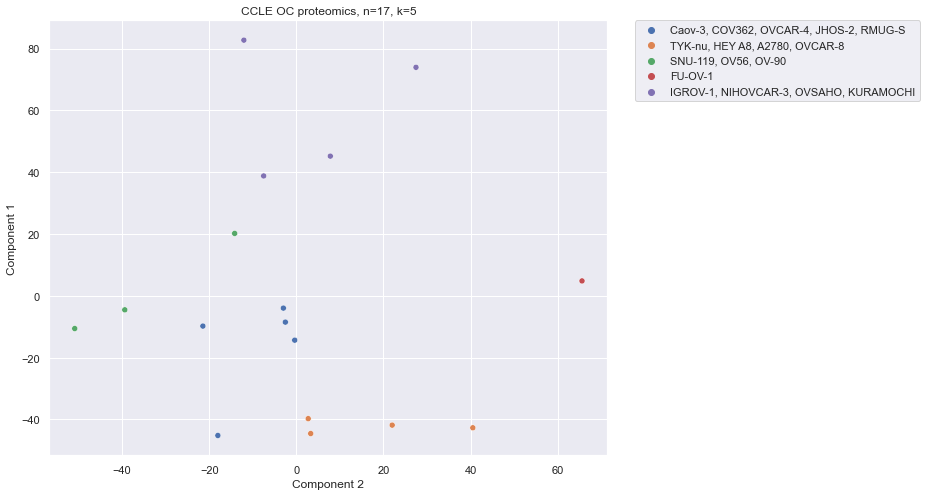

In [525]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment'], palette = palette)
plt.title('CCLE OC proteomics, n=17, k=5')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig('CCLE_OC_POMICS_n=17_k=5', dpi=1200, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)
plt.show()

# adjusted rand index between proteomics, n=17, k=5. 

In [3]:
ari_dataframe = pd.read_csv(r'/Users/katemeeson/Dropbox (The University of Manchester)/labeling dataframe for ARI n=17 proteomics.csv')
ari_dataframe

,Cell line,NMF label,Proteomics label
0,A2780_OVARY_TenPx14,0,2
1,CAOV3_OVARY_TenPx02,4,1
2,COV362_OVARY_TenPx03,4,1
3,FUOV1_OVARY_TenPx16,4,4
4,HEYA8_OVARY_TenPx27,2,2
5,IGROV1_OVARY_TenPx19,3,0
6,JHOS2_OVARY_TenPx33,4,1
7,KURAMOCHI_OVARY_TenPx15,4,0
8,NIHOVCAR3_OVARY_TenPx33,4,0
9,OV56_OVARY_TenPx35,2,3


In [6]:
nmf_labels = ari_dataframe['NMF label']
pomics_labels = ari_dataframe['Proteomics label']
pomics_n17_ari = adjusted_rand_score(nmf_labels, pomics_labels)
print('Agreement between NMF ground truth and proteomics n=17 = ', pomics_n17_ari)

Agreement between NMF ground truth and proteomics n=17 =  0.15694561848408004


# clustering transcriptomics, n=43, k=10. 

In [8]:
data = pd.read_csv(r'/Users/katemeeson/Desktop/OC lines only CCLE transcriptomics expression .csv', index_col = [0])
N, D = data.shape
print('Samples: %s, Proteins: %s'%(N, D))
data = data.dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)
data

Samples: 43, Proteins: 16382


,TSPAN6 (7105),TNMD (64102),DPM1 (8813),SCYL3 (57147),C1orf112 (55732),FGR (2268),CFH (3075),FUCA2 (2519),GCLC (2729),NFYA (4800),...,OR8B8 (26493),ZNF772 (400720),ZNF257 (113835),PCNX3 (399909),ADAM32 (203102),ACSL5 (51703),LRRC8B (23507),ABCB8 (11194),H3C12 (8356),SND1 (27044)
OC Broad IDs used in transcriptomics,,,,,,,,,,,,,,,,,,,,,
ONCO-DG-1,5.517591,0.056584,7.528884,1.910733,3.572890,0.028569,2.066950,5.419876,4.204767,3.504620,...,0.000000,1.321928,0.704872,5.103917,0.263034,0.226509,2.684819,3.615887,0.765535,6.029895
TOV-112D,5.093391,0.028569,5.089159,2.392317,4.047015,0.000000,0.333424,2.611172,4.204767,5.125568,...,0.000000,2.587365,0.526069,4.196922,0.584963,0.070389,2.946731,4.019702,0.839960,6.019257
OV56,2.776104,0.070389,6.323010,1.989139,2.541019,0.201634,1.735522,5.317594,5.486071,3.949535,...,0.000000,0.992768,0.731183,4.312520,0.678072,0.855990,1.378512,2.839960,0.097611,7.186263
Caov-4,4.606442,0.000000,6.227857,2.495695,3.575312,0.097611,3.907852,4.234195,4.082362,3.712596,...,0.000000,3.477677,0.000000,4.316146,0.622930,0.367371,2.157044,4.891419,0.389567,6.351204
OAW28,5.658783,0.000000,6.364222,2.310340,3.859970,0.028569,0.871844,6.480427,4.770829,3.933573,...,0.000000,3.129283,2.821710,5.691813,0.163499,1.214125,2.904966,4.927896,2.087463,6.896151
JHOS-2,6.512069,0.000000,6.384050,2.636915,4.448240,0.014355,3.392317,5.358256,3.382667,3.941106,...,0.000000,2.885574,2.192194,4.272770,0.367371,3.184280,2.508429,3.307429,0.411426,5.223036
JHOM-1,5.228819,0.000000,6.237449,1.691534,3.039138,0.584963,6.171527,7.395063,5.561021,3.581351,...,0.000000,2.153805,0.056584,4.795975,1.594549,4.078951,2.247928,4.291309,0.150560,6.541639
COV318,4.351911,0.000000,6.849374,1.992768,3.407353,0.137504,5.753551,4.802710,3.223423,3.519793,...,0.000000,2.568032,3.404631,4.040892,0.941106,0.238787,2.217231,4.282440,1.084064,6.861707
COV362,3.964399,0.042644,6.135248,1.867896,2.678072,0.000000,5.833902,4.969012,4.500165,4.392317,...,0.000000,3.241840,1.887525,5.056150,0.310340,1.952334,2.137504,4.879216,0.378512,6.811471


In [9]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(data)
pca = PCA(n_components = 3)
pca.fit(segmentation_std)
scores_pca = pca.transform(segmentation_std)
pca.transform(segmentation_std)

array([[-1.36606003e+01,  2.72527002e+01,  1.99716862e+01],
       [-4.86776285e+01, -4.38686711e+01,  5.99886107e+01],
       [ 4.49396151e+00, -6.18732596e+00, -3.44504919e+01],
       [-1.15860395e+01,  6.91972684e+01,  3.67437221e+01],
       [-6.23264110e+01,  3.46285962e+01,  1.79210094e+01],
       [ 5.98627268e+00,  2.44462322e+01, -4.43403037e+01],
       [-2.31520759e+01, -7.11815488e+00, -3.44025388e+01],
       [ 5.27364177e+01,  2.54162406e+01,  2.74521182e+01],
       [ 9.86095401e+00, -4.67863458e+00, -1.20934015e+01],
       [ 2.36925237e+01,  1.38199163e+01,  2.58828897e+01],
       [-6.06637292e+01,  1.55694345e+01, -4.55460732e+01],
       [-1.19544440e+01, -3.41571988e+01, -2.55934562e+01],
       [-5.70769558e+01,  5.89004472e+01, -3.24642357e+01],
       [ 1.83766817e+01,  1.79465913e+01,  2.89899554e+01],
       [-8.47003856e+00, -6.01665781e+01, -3.76899649e+00],
       [-4.39059169e+01,  8.98606543e+01, -5.95300521e+00],
       [ 3.37281994e+01,  4.70052977e+00

In [10]:
#printing how much weighting is on either principal component.
PCA_EV = pca.explained_variance_ratio_
print('Explained variance: ', PCA_EV)
print('Principal component 1: ', PCA_EV[0]*100)
print('Principal component 2: ', PCA_EV[1]*100)
print('Principal component 3: ', PCA_EV[2]*100)

Explained variance:  [0.12142131 0.08227602 0.05470112]
Principal component 1:  12.142131029125718
Principal component 2:  8.227601688171935
Principal component 3:  5.470112095465116


In [11]:
wcss = []
max_clusters = 17
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
    
optimal_cluster_number = 10
kmeans_pca = KMeans(n_clusters = optimal_cluster_number, init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)
labels = kmeans_pca.predict(scores_pca)

In [12]:
kmeans_pca = KMeans(n_clusters=10, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)
data['Cluster'] = kmeans_pca.labels_
data['Cluster']

OC Broad IDs used in transcriptomics 
ONCO-DG-1    3
TOV-112D     0
OV56         8
Caov-4       3
OAW28        3
JHOS-2       8
JHOM-1       6
COV318       2
COV362       8
OV-90        2
EFO-21       6
JHOC-5       4
JHOM-2B      9
OVSAHO       2
TYK-nu       4
OVKATE       9
SNU-8        8
59M          4
KURAMOCHI    3
OVISE        2
HEY A8       4
FU-OV-1      1
JHOS-4       3
COV644       8
OVCAR-4      2
SNU-119      3
OVMANA       5
A2780        0
OVTOKO       7
OV7          4
OVCAR-8      1
RMUG-S       8
OAW42        1
Caov-3       6
RMG-I        7
MCAS         8
SK-OV-3      6
TOV-21G      1
ES-2         4
EFO-27       1
OVK18        0
OC 314       1
IGROV-1      1
Name: Cluster, dtype: int32

In [13]:
data_sorted = data.sort_values(by=['Cluster'])
data_sorted

,TSPAN6 (7105),TNMD (64102),DPM1 (8813),SCYL3 (57147),C1orf112 (55732),FGR (2268),CFH (3075),FUCA2 (2519),GCLC (2729),NFYA (4800),...,ZNF772 (400720),ZNF257 (113835),PCNX3 (399909),ADAM32 (203102),ACSL5 (51703),LRRC8B (23507),ABCB8 (11194),H3C12 (8356),SND1 (27044),Cluster
OC Broad IDs used in transcriptomics,,,,,,,,,,,,,,,,,,,,,
TOV-112D,5.093391,0.028569,5.089159,2.392317,4.047015,0.000000,0.333424,2.611172,4.204767,5.125568,...,2.587365,0.526069,4.196922,0.584963,0.070389,2.946731,4.019702,0.839960,6.019257,0
OVK18,3.973611,0.176323,5.969703,2.608809,3.797013,0.042644,0.400538,3.218781,4.924575,5.132166,...,0.910733,0.056584,5.153400,0.056584,0.124328,2.819668,4.838448,0.422233,7.271743,0
A2780,6.524816,1.790772,6.871104,2.803227,4.480265,0.042644,8.082096,4.370862,3.849999,4.496974,...,0.189034,0.000000,4.904966,0.056584,0.111031,2.580145,4.176323,0.137504,6.684679,0
FU-OV-1,5.932864,0.604071,6.687341,1.959770,3.896272,0.028569,0.163499,5.047015,4.301588,4.521051,...,3.168321,0.000000,4.832890,0.333424,1.090853,2.229588,4.477030,0.807355,6.876885,1
EFO-27,5.189825,0.028569,6.534964,2.269033,3.339137,0.000000,0.084064,5.339137,4.435629,4.244126,...,2.173127,1.405992,4.052242,0.731183,3.258519,2.295723,4.654779,0.925999,6.495215,1
TOV-21G,4.683135,0.000000,5.720552,2.097611,3.561937,0.000000,0.042644,6.238023,3.751678,4.221877,...,1.575312,0.000000,4.078097,0.641546,1.007196,2.718088,4.828327,0.000000,6.294621,1
OAW42,5.018367,0.000000,6.995937,1.843984,4.031219,0.014355,0.042644,6.244507,3.736605,4.808900,...,1.195348,0.000000,4.192194,0.111031,0.454176,1.310340,5.412104,0.238787,6.263598,1
OVCAR-8,4.036503,0.000000,6.743488,1.536053,3.432959,0.028569,0.097611,5.760753,4.490570,3.855990,...,2.025029,1.992768,4.712045,0.464668,0.443607,2.304511,5.254745,0.226509,5.592756,1
OC 314,5.265287,0.000000,6.607182,1.867896,3.764474,0.014355,0.713696,5.816600,4.361066,3.645010,...,1.049631,0.000000,4.203201,0.815575,0.097611,3.719183,4.650765,0.422233,7.141596,1


In [14]:
data['Cluster'] = data['Cluster'].map({0:'TOV-112D, OVK18, A2780', 1:'FU-OV-1, EFO-27, TOV-21G, OAW42, OVCAR-8, OC 314, IGROV-1', 2:'OV-90, OVCAR-4, COV318, OVSAHO, OVISE', 3:'JHOS-4, SNU-119, ONCO-DG-1, OAW28, Caov-4, KURAMOCHI', 4:'ES-2, HEY A8, OV7, TYK-nu, JHOC-5, 59M', 5:'OVMANA', 6:'JHOM-1, Caov-3, SK-OV-3, EFO-21', 7:'OVTOKO, RMG-I', 8:'COV362, RMUG-S, JHOS-2, MCAS, SNU-8, OV56, COV644', 9:'OVKATE, JHOM-2B'})

In [15]:
df_segm_pca_kmeans = pd.concat([data.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3:]=['Component 1', 'Component 2', 'Component 3']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans.head()

,TSPAN6 (7105),TNMD (64102),DPM1 (8813),SCYL3 (57147),C1orf112 (55732),FGR (2268),CFH (3075),FUCA2 (2519),GCLC (2729),NFYA (4800),...,ACSL5 (51703),LRRC8B (23507),ABCB8 (11194),H3C12 (8356),SND1 (27044),Cluster,Component 1,Component 2,Component 3,Segment K-means PCA
0,5.517591,0.056584,7.528884,1.910733,3.572890,0.028569,2.066950,5.419876,4.204767,3.504620,...,0.226509,2.684819,3.615887,0.765535,6.029895,"JHOS-4, SNU-119, ONCO-DG-1, OAW28, Caov-4, KUR...",-13.660600,27.252700,19.971686,3
1,5.093391,0.028569,5.089159,2.392317,4.047015,0.000000,0.333424,2.611172,4.204767,5.125568,...,0.070389,2.946731,4.019702,0.839960,6.019257,"TOV-112D, OVK18, A2780",-48.677628,-43.868671,59.988611,0
2,2.776104,0.070389,6.323010,1.989139,2.541019,0.201634,1.735522,5.317594,5.486071,3.949535,...,0.855990,1.378512,2.839960,0.097611,7.186263,"COV362, RMUG-S, JHOS-2, MCAS, SNU-8, OV56, COV644",4.493962,-6.187326,-34.450492,8
3,4.606442,0.000000,6.227857,2.495695,3.575312,0.097611,3.907852,4.234195,4.082362,3.712596,...,0.367371,2.157044,4.891419,0.389567,6.351204,"JHOS-4, SNU-119, ONCO-DG-1, OAW28, Caov-4, KUR...",-11.586040,69.197268,36.743722,3
4,5.658783,0.000000,6.364222,2.310340,3.859970,0.028569,0.871844,6.480427,4.770829,3.933573,...,1.214125,2.904966,4.927896,2.087463,6.896151,"JHOS-4, SNU-119, ONCO-DG-1, OAW28, Caov-4, KUR...",-62.326411,34.628596,17.921009,3


In [16]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'TOV-112D, OVK18, A2780', 1:'FU-OV-1, EFO-27, TOV-21G, OAW42, OVCAR-8, OC 314, IGROV-1', 2:'OV-90, OVCAR-4, COV318, OVSAHO, OVISE', 3:'JHOS-4, SNU-119, ONCO-DG-1, OAW28, Caov-4, KURAMOCHI', 4:'ES-2, HEY A8, OV7, TYK-nu, JHOC-5, 59M', 5:'OVMANA', 6:'JHOM-1, Caov-3, SK-OV-3, EFO-21', 7:'OVTOKO, RMG-I', 8:'COV362, RMUG-S, JHOS-2, MCAS, SNU-8, OV56, COV644', 9:'OVKATE, JHOM-2B'})

/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-19-112815aec341>:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('CCLE_OC_TOMICS_n=43_k=10', dpi=1200, facecolor='w', edgecolor='w',
<ipython-input-19-112815aec341>:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('CCLE_OC_TOMICS_n=43_k=10', dpi=1200, facecolor='w', edgecolor='w',


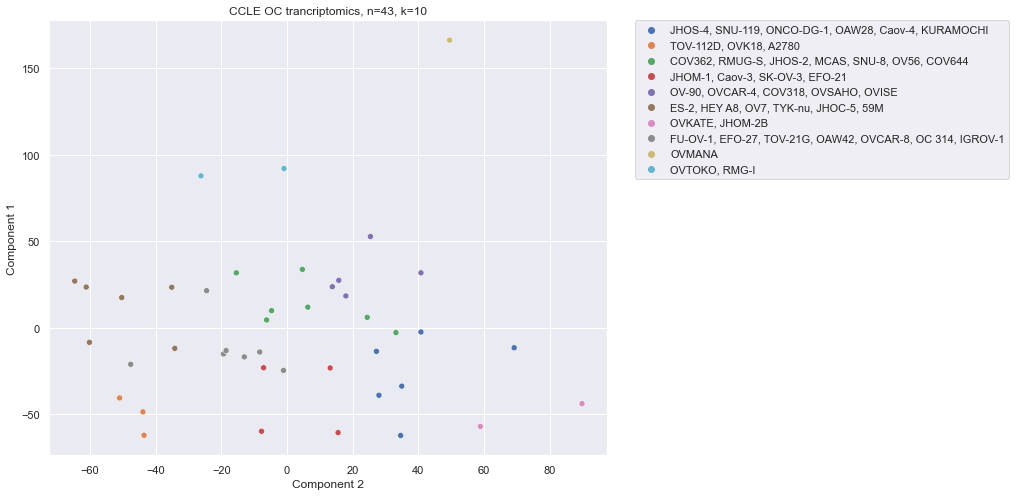

In [19]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment'], palette = palette)
plt.title('CCLE OC trancriptomics, n=43, k=10')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig('CCLE_OC_TOMICS_n=43_k=10', dpi=1200, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)
plt.show()

# Adding in the extra OVCAR3 from transcriptomics. 

In [ ]:
#this is on the 25042022 notebook